In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import sys
import localSettings as ls
import math
print(ls.main_path)
import load_data_run123
import plotter_alex
import importlib
importlib.reload(plotter_alex)
import uproot
import matplotlib.pylab as pylab
import numpy as np
import math
from sklearn.model_selection import train_test_split
import pickle
import xgboost as xgb
import nue_booster 
importlib.reload(nue_booster)
import awkward
from matplotlib import gridspec
from collections import defaultdict
import ROOT
from ROOT import TFile
from ROOT import TCanvas, TFile, TProfile, TNtuple, TH1F, TH2F
from ROOT import gROOT, gBenchmark, gRandom, gSystem
import csv

/home/alex/NuMI/PELEE/
Welcome to JupyROOT 6.24/02


In [2]:
isRun3 = False

#to use both Run1 and Run3
isCombined = True

ending = "Jan19"

In [3]:
if isCombined == False and isRun3 == False:
 
    nue_nue_allsel_vars_tot_df = pd.read_csv("nue_nue_varstot_full_catsel_nopions_leptonMom_usingSelection_allselected_"+ending+".csv")
    nue_nue_allsel_weights_tot_df = pd.read_csv("nue_nue_weightstot_full_catsel_nopions_leptonMom_usingSelection_allselected_"+ending+".csv")

    nue_nue_allsel_vars_tot = defaultdict(list)
    nue_nue_allsel_weights_tot = defaultdict(list)


    nue_nue_allsel_vars_tot = nue_nue_allsel_vars_tot_df.to_dict()
    nue_nue_allsel_weights_tot = nue_nue_allsel_weights_tot_df.to_dict()
    nue_nue_allsel_vars_tot.pop("Unnamed: 0")
    nue_nue_allsel_weights_tot.pop("Unnamed: 0")

    poplist = []

    for c in nue_nue_allsel_vars_tot.keys():
        if len(nue_nue_allsel_weights_tot[c][0]) > 2:
            nue_nue_allsel_weights_tot[c][0] = nue_nue_allsel_weights_tot[c][0][1:]
            nue_nue_allsel_weights_tot[c][0] = nue_nue_allsel_weights_tot[c][0][:-1]
            nue_nue_allsel_weights_tot[c][0] = list(map(float,nue_nue_allsel_weights_tot[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_nue_allsel_vars_tot.keys():
        if len(nue_nue_allsel_vars_tot[c][0]) > 2:
            nue_nue_allsel_vars_tot[c][0] = nue_nue_allsel_vars_tot[c][0][1:]
            nue_nue_allsel_vars_tot[c][0] = nue_nue_allsel_vars_tot[c][0][:-1]
            nue_nue_allsel_vars_tot[c][0] = list(map(float,nue_nue_allsel_vars_tot[c][0].split(",")))

    for i in poplist:
        nue_nue_allsel_vars_tot.pop(i)
        nue_nue_allsel_weights_tot.pop(i)


    ###############################################################

    nue_mc_vars_tot_df = pd.read_csv("nue_mc_varstot_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")
    nue_mc_weights_tot_df = pd.read_csv("nue_mc_weightstot_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    nue_mc_vars_tot = defaultdict(list)
    nue_mc_weights_tot = defaultdict(list)


    nue_mc_vars_tot = nue_mc_vars_tot_df.to_dict()
    nue_mc_weights_tot = nue_mc_weights_tot_df.to_dict()
    nue_mc_vars_tot.pop("Unnamed: 0")
    nue_mc_weights_tot.pop("Unnamed: 0")

    poplist = []

    for c in nue_mc_vars_tot.keys():
        if len(nue_mc_weights_tot[c][0]) > 2:
            nue_mc_weights_tot[c][0] = nue_mc_weights_tot[c][0][1:]
            nue_mc_weights_tot[c][0] = nue_mc_weights_tot[c][0][:-1]
            nue_mc_weights_tot[c][0] = list(map(float,nue_mc_weights_tot[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_mc_vars_tot.keys():
        if len(nue_mc_vars_tot[c][0]) > 2:
            nue_mc_vars_tot[c][0] = nue_mc_vars_tot[c][0][1:]
            nue_mc_vars_tot[c][0] = nue_mc_vars_tot[c][0][:-1]
            nue_mc_vars_tot[c][0] = list(map(float,nue_mc_vars_tot[c][0].split(",")))

    for i in poplist:
        nue_mc_vars_tot_run1.pop(i)
        nue_mc_weights_tot_run1.pop(i)

    ###############################################################

    nue_dirt_vars_tot_df = pd.read_csv("nue_dirt_varstot_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")
    nue_dirt_weights_tot_df = pd.read_csv("nue_dirt_weightstot_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    nue_dirt_vars_tot = defaultdict(list)
    nue_dirt_weights_tot = defaultdict(list)


    nue_dirt_vars_tot = nue_dirt_vars_tot_df.to_dict()
    nue_dirt_weights_tot= nue_dirt_weights_tot_df.to_dict()
    nue_dirt_vars_tot.pop("Unnamed: 0")
    nue_dirt_weights_tot.pop("Unnamed: 0")

    #print(nue_dirt_vars_tot[c][0])

    poplist = []

    for c in nue_dirt_vars_tot.keys():
        if len(nue_dirt_weights_tot[c][0]) > 2:
            nue_dirt_weights_tot[c][0] = nue_dirt_weights_tot[c][0][1:]
            nue_dirt_weights_tot[c][0] = nue_dirt_weights_tot[c][0][:-1]
            nue_dirt_weights_tot[c][0] = list(map(float,nue_dirt_weights_tot[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_dirt_vars_tot.keys():
        if len(nue_dirt_vars_tot[c][0]) > 2:
            nue_dirt_vars_tot[c][0] = nue_dirt_vars_tot[c][0][1:]
            nue_dirt_vars_tot[c][0] = nue_dirt_vars_tot[c][0][:-1]
            nue_dirt_vars_tot[c][0] = list(map(float,nue_dirt_vars_tot[c][0].split(",")))

    for i in poplist:
        nue_dirt_vars_tot.pop(i)
        nue_dirt_weights_tot.pop(i)

    #print(nue_dirt_vars_tot_run1)

    ###############################################################

    #nue_ext_vars_tot_df = pd.read_csv("nue_ext_varstot_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")
    #nue_ext_weights_tot_df = pd.read_csv("nue_ext_weightstot_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")
    nue_ext_vars_tot_df = pd.read_csv("nue_ext_varstot_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")
    nue_ext_weights_tot_df = pd.read_csv("nue_ext_weightstot_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")


    nue_ext_vars_tot = defaultdict(list)
    nue_ext_weights_tot = defaultdict(list)


    nue_ext_vars_tot = nue_ext_vars_tot_df.to_dict()
    nue_ext_weights_tot = nue_ext_weights_tot_df.to_dict()
    nue_ext_vars_tot.pop("Unnamed: 0")
    nue_ext_weights_tot.pop("Unnamed: 0")


    ###############################################################

    #nue_data_vars_tot_df = pd.read_csv("nue_data_varstot_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")
    #nue_data_weights_tot_df = pd.read_csv("nue_data_weightstot_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")
    nue_data_vars_tot_df = pd.read_csv("nue_data_varstot_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")
    nue_data_weights_tot_df = pd.read_csv("nue_data_weightstot_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")


    nue_data_vars_tot = defaultdict(list)
    nue_data_weights_tot = defaultdict(list)


    nue_data_vars_tot = nue_data_vars_tot_df.to_dict()
    nue_data_weights_tot = nue_data_weights_tot_df.to_dict()
    nue_data_vars_tot.pop("Unnamed: 0")
    nue_data_weights_tot.pop("Unnamed: 0")
    

    ###############################################################
    ###############################################################
    
    nue_nue_sigsel_vars_tot_df = pd.read_csv("nue_nue_varstot_full_catsel_nopions_leptonMom_usingSelection_selectedsig_"+ending+".csv")
    nue_nue_sigsel_weights_tot_df = pd.read_csv("nue_nue_weightstot_full_catsel_nopions_leptonMom_usingSelection_selectedsig_"+ending+".csv")

    nue_nue_sigsel_vars_tot = defaultdict(list)
    nue_nue_sigsel_weights_tot = defaultdict(list)


    nue_nue_sigsel_vars_tot = nue_nue_sigsel_vars_tot_df.to_dict()
    nue_nue_sigsel_weights_tot = nue_nue_sigsel_weights_tot_df.to_dict()
    nue_nue_sigsel_vars_tot.pop("Unnamed: 0")
    nue_nue_sigsel_weights_tot.pop("Unnamed: 0")

    poplist = []

    for c in nue_nue_sigsel_vars_tot.keys():
        if len(nue_nue_sigsel_weights_tot[c][0]) > 2:
            nue_nue_sigsel_weights_tot[c][0] = nue_nue_sigsel_weights_tot[c][0][1:]
            nue_nue_sigsel_weights_tot[c][0] = nue_nue_sigsel_weights_tot[c][0][:-1]
            nue_nue_sigsel_weights_tot[c][0] = list(map(float,nue_nue_sigsel_weights_tot[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_nue_sigsel_vars_tot.keys():
        if len(nue_nue_sigsel_vars_tot[c][0]) > 2:
            nue_nue_sigsel_vars_tot[c][0] = nue_nue_sigsel_vars_tot[c][0][1:]
            nue_nue_sigsel_vars_tot[c][0] = nue_nue_sigsel_vars_tot[c][0][:-1]
            nue_nue_sigsel_vars_tot[c][0] = list(map(float,nue_nue_sigsel_vars_tot[c][0].split(",")))

    for i in poplist:
        nue_nue_sigsel_vars_tot.pop(i)
        nue_nue_sigsel_weights_tot.pop(i)
     
    
    
    numu_mc_allsel_vars_tot_df = pd.read_csv("numu_mc_varstot_full_catsel_nopions_leptonMom_usingSelection_allselected_"+ending+".csv")
    numu_mc_allsel_weights_tot_df = pd.read_csv("numu_mc_weightstot_full_catsel_nopions_leptonMom_usingSelection_allselected_"+ending+".csv")

    numu_mc_allsel_vars_tot = defaultdict(list)
    numu_mc_allsel_weights_tot = defaultdict(list)


    numu_mc_allsel_vars_tot = numu_mc_allsel_vars_tot_df.to_dict()
    numu_mc_allsel_weights_tot = numu_mc_allsel_weights_tot_df.to_dict()
    numu_mc_allsel_vars_tot.pop("Unnamed: 0")
    numu_mc_allsel_weights_tot.pop("Unnamed: 0")

    poplist = []

    for c in numu_mc_allsel_vars_tot.keys():
        if len(numu_mc_allsel_weights_tot[c][0]) > 2:
            numu_mc_allsel_weights_tot[c][0] = numu_mc_allsel_weights_tot[c][0][1:]
            numu_mc_allsel_weights_tot[c][0] = numu_mc_allsel_weights_tot[c][0][:-1]
            numu_mc_allsel_weights_tot[c][0] = list(map(float,numu_mc_allsel_weights_tot[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_mc_allsel_vars_tot.keys():
        if len(numu_mc_allsel_vars_tot[c][0]) > 2:
            numu_mc_allsel_vars_tot[c][0] = numu_mc_allsel_vars_tot[c][0][1:]
            numu_mc_allsel_vars_tot[c][0] = numu_mc_allsel_vars_tot[c][0][:-1]
            numu_mc_allsel_vars_tot[c][0] = list(map(float,numu_mc_allsel_vars_tot[c][0].split(",")))

    for i in poplist:
        numu_mc_allsel_vars_tot.pop(i)
        numu_mc_allsel_weights_tot.pop(i)
    
    ###############################################################
    
    numu_mc_sigsel_vars_tot_df = pd.read_csv("numu_mc_varstot_full_catsel_nopions_leptonMom_usingSelection_selectedsig_"+ending+".csv")
    numu_mc_sigsel_weights_tot_df = pd.read_csv("numu_mc_weightstot_full_catsel_nopions_leptonMom_usingSelection_selectedsig_"+ending+".csv")

    numu_mc_sigsel_vars_tot = defaultdict(list)
    numu_mc_sigsel_weights_tot = defaultdict(list)


    numu_mc_sigsel_vars_tot = numu_mc_sigsel_vars_tot_df.to_dict()
    numu_mc_sigsel_weights_tot = numu_mc_sigsel_weights_tot_df.to_dict()
    numu_mc_sigsel_vars_tot.pop("Unnamed: 0")
    numu_mc_sigsel_weights_tot.pop("Unnamed: 0")

    poplist = []

    for c in numu_mc_sigsel_vars_tot.keys():
        if len(numu_mc_sigsel_weights_tot[c][0]) > 2:
            numu_mc_sigsel_weights_tot[c][0] = numu_mc_sigsel_weights_tot[c][0][1:]
            numu_mc_sigsel_weights_tot[c][0] = numu_mc_sigsel_weights_tot[c][0][:-1]
            numu_mc_sigsel_weights_tot[c][0] = list(map(float,numu_mc_sigsel_weights_tot[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_mc_sigsel_vars_tot.keys():
        if len(numu_mc_sigsel_vars_tot[c][0]) > 2:
            numu_mc_sigsel_vars_tot[c][0] = numu_mc_sigsel_vars_tot[c][0][1:]
            numu_mc_sigsel_vars_tot[c][0] = numu_mc_sigsel_vars_tot[c][0][:-1]
            numu_mc_sigsel_vars_tot[c][0] = list(map(float,numu_mc_sigsel_vars_tot[c][0].split(",")))

    for i in poplist:
        numu_mc_sigsel_vars_tot.pop(i)
        numu_mc_sigsel_weights_tot.pop(i)
    
    ###########################################################
    
    numu_nue_vars_tot_df = pd.read_csv("numu_nue_varstot_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")
    numu_nue_weights_tot_df = pd.read_csv("numu_nue_weightstot_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    numu_nue_vars_tot = defaultdict(list)
    numu_nue_weights_tot = defaultdict(list)


    numu_nue_vars_tot = numu_nue_vars_tot_df.to_dict()
    numu_nue_weights_tot = numu_nue_weights_tot_df.to_dict()
    numu_nue_vars_tot.pop("Unnamed: 0")
    numu_nue_weights_tot.pop("Unnamed: 0")

    poplist = []

    for c in numu_nue_vars_tot.keys():
        if len(numu_nue_weights_tot[c][0]) > 2:
            numu_nue_weights_tot[c][0] = numu_nue_weights_tot[c][0][1:]
            numu_nue_weights_tot[c][0] = numu_nue_weights_tot[c][0][:-1]
            numu_nue_weights_tot[c][0] = list(map(float,numu_nue_weights_tot[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_nue_vars_tot.keys():
        if len(numu_nue_vars_tot[c][0]) > 2:
            numu_nue_vars_tot[c][0] = numu_nue_vars_tot[c][0][1:]
            numu_nue_vars_tot[c][0] = numu_nue_vars_tot[c][0][:-1]
            numu_nue_vars_tot[c][0] = list(map(float,numu_nue_vars_tot[c][0].split(",")))

    for i in poplist:
        numu_nue_vars_tot.pop(i)
        numu_nue_weights_tot.pop(i) 
        

    ###############################################################
    numu_dirt_vars_tot_df = pd.read_csv("numu_dirt_varstot_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")
    numu_dirt_weights_tot_df = pd.read_csv("numu_dirt_weightstot_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    numu_dirt_vars_tot = defaultdict(list)
    numu_dirt_weights_tot = defaultdict(list)


    numu_dirt_vars_tot = numu_dirt_vars_tot_df.to_dict()
    numu_dirt_weights_tot = numu_dirt_weights_tot_df.to_dict()
    numu_dirt_vars_tot.pop("Unnamed: 0")
    numu_dirt_weights_tot.pop("Unnamed: 0")

    poplist = []

    for c in numu_dirt_vars_tot.keys():
        if len(numu_dirt_weights_tot[c][0]) > 2:
            numu_dirt_weights_tot[c][0] = numu_dirt_weights_tot[c][0][1:]
            numu_dirt_weights_tot[c][0] = numu_dirt_weights_tot[c][0][:-1]
            numu_dirt_weights_tot[c][0] = list(map(float,numu_dirt_weights_tot[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_dirt_vars_tot.keys():
        if len(numu_dirt_vars_tot[c][0]) > 2:
            numu_dirt_vars_tot[c][0] = numu_dirt_vars_tot[c][0][1:]
            numu_dirt_vars_tot[c][0] = numu_dirt_vars_tot[c][0][:-1]
            numu_dirt_vars_tot[c][0] = list(map(float,numu_dirt_vars_tot[c][0].split(",")))

    for i in poplist:
        numu_dirt_vars_tot.pop(i)
        numu_dirt_weights_tot.pop(i) 

    ###############################################################

    #numu_ext_vars_tot_df = pd.read_csv("numu_ext_varstot_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")
    #numu_ext_weights_tot_df = pd.read_csv("numu_ext_weightstot_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")
    numu_ext_vars_tot_df = pd.read_csv("numu_ext_varstot_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")
    numu_ext_weights_tot_df = pd.read_csv("numu_ext_weightstot_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    numu_ext_vars_tot = defaultdict(list)
    numu_ext_weights_tot = defaultdict(list)

    numu_ext_vars_tot = numu_ext_vars_tot_df.to_dict()
    numu_ext_weights_tot = numu_ext_weights_tot_df.to_dict()
    numu_ext_vars_tot.pop("Unnamed: 0")
    numu_ext_weights_tot.pop("Unnamed: 0")


    ###############################################################

    #numu_data_vars_tot_df = pd.read_csv("numu_data_varstot_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")
    #numu_data_weights_tot_df = pd.read_csv("numu_data_weightstot_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")
    numu_data_vars_tot_df = pd.read_csv("numu_data_varstot_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")
    numu_data_weights_tot_df = pd.read_csv("numu_data_weightstot_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    numu_data_vars_tot = defaultdict(list)
    numu_data_weights_tot = defaultdict(list)


    numu_data_vars_tot = numu_data_vars_tot_df.to_dict()
    numu_data_weights_tot = numu_data_weights_tot_df.to_dict()
    numu_data_vars_tot.pop("Unnamed: 0")
    numu_data_weights_tot.pop("Unnamed: 0")

    #print(numu_data_vars_tot)
      
if isCombined == True:
    
    nue_nue_allsel_vars_tot_df = pd.read_csv("nue_nue_varstot_full_catsel_nopions_leptonMom_usingSelection_allselected_"+ending+".csv")
    nue_nue_allsel_weights_tot_df = pd.read_csv("nue_nue_weightstot_full_catsel_nopions_leptonMom_usingSelection_allselected_"+ending+".csv")

    nue_nue_allsel_vars_tot = defaultdict(list)
    nue_nue_allsel_weights_tot = defaultdict(list)


    nue_nue_allsel_vars_tot_run1 = nue_nue_allsel_vars_tot_df.to_dict()
    nue_nue_allsel_weights_tot_run1 = nue_nue_allsel_weights_tot_df.to_dict()
    nue_nue_allsel_vars_tot_run1.pop("Unnamed: 0")
    nue_nue_allsel_weights_tot_run1.pop("Unnamed: 0")

    poplist = []

    for c in nue_nue_allsel_vars_tot_run1.keys():
        if len(nue_nue_allsel_weights_tot_run1[c][0]) > 2:
            nue_nue_allsel_weights_tot_run1[c][0] = nue_nue_allsel_weights_tot_run1[c][0][1:]
            nue_nue_allsel_weights_tot_run1[c][0] = nue_nue_allsel_weights_tot_run1[c][0][:-1]
            nue_nue_allsel_weights_tot_run1[c][0] = list(map(float,nue_nue_allsel_weights_tot_run1[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_nue_allsel_vars_tot_run1.keys():
        if len(nue_nue_allsel_vars_tot_run1[c][0]) > 2:
            nue_nue_allsel_vars_tot_run1[c][0] = nue_nue_allsel_vars_tot_run1[c][0][1:]
            nue_nue_allsel_vars_tot_run1[c][0] = nue_nue_allsel_vars_tot_run1[c][0][:-1]
            nue_nue_allsel_vars_tot_run1[c][0] = list(map(float,nue_nue_allsel_vars_tot_run1[c][0].split(",")))

    for i in poplist:
        nue_nue_allsel_vars_tot_run1.pop(i)
        nue_nue_allsel_weights_tot_run1.pop(i)


    ###############################################################

    nue_mc_vars_tot_df = pd.read_csv("nue_mc_varstot_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")
    nue_mc_weights_tot_df = pd.read_csv("nue_mc_weightstot_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    nue_mc_vars_tot = defaultdict(list)
    nue_mc_weights_tot = defaultdict(list)


    nue_mc_vars_tot_run1 = nue_mc_vars_tot_df.to_dict()
    nue_mc_weights_tot_run1 = nue_mc_weights_tot_df.to_dict()
    nue_mc_vars_tot_run1.pop("Unnamed: 0")
    nue_mc_weights_tot_run1.pop("Unnamed: 0")

    poplist = []

    for c in nue_mc_vars_tot_run1.keys():
        if len(nue_mc_weights_tot_run1[c][0]) > 2:
            nue_mc_weights_tot_run1[c][0] = nue_mc_weights_tot_run1[c][0][1:]
            nue_mc_weights_tot_run1[c][0] = nue_mc_weights_tot_run1[c][0][:-1]
            nue_mc_weights_tot_run1[c][0] = list(map(float,nue_mc_weights_tot_run1[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_mc_vars_tot_run1.keys():
        if len(nue_mc_vars_tot_run1[c][0]) > 2:
            nue_mc_vars_tot_run1[c][0] = nue_mc_vars_tot_run1[c][0][1:]
            nue_mc_vars_tot_run1[c][0] = nue_mc_vars_tot_run1[c][0][:-1]
            nue_mc_vars_tot_run1[c][0] = list(map(float,nue_mc_vars_tot_run1[c][0].split(",")))

    for i in poplist:
        nue_mc_vars_tot_run1.pop(i)
        nue_mc_weights_tot_run1.pop(i)

    ###############################################################

    nue_dirt_vars_tot_df = pd.read_csv("nue_dirt_varstot_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")
    nue_dirt_weights_tot_df = pd.read_csv("nue_dirt_weightstot_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    nue_dirt_vars_tot = defaultdict(list)
    nue_dirt_weights_tot = defaultdict(list)


    nue_dirt_vars_tot_run1 = nue_dirt_vars_tot_df.to_dict()
    nue_dirt_weights_tot_run1= nue_dirt_weights_tot_df.to_dict()
    nue_dirt_vars_tot_run1.pop("Unnamed: 0")
    nue_dirt_weights_tot_run1.pop("Unnamed: 0")

    #print(nue_dirt_vars_tot[c][0])

    poplist = []

    for c in nue_dirt_vars_tot_run1.keys():
        if len(nue_dirt_weights_tot_run1[c][0]) > 2:
            nue_dirt_weights_tot_run1[c][0] = nue_dirt_weights_tot_run1[c][0][1:]
            nue_dirt_weights_tot_run1[c][0] = nue_dirt_weights_tot_run1[c][0][:-1]
            nue_dirt_weights_tot_run1[c][0] = list(map(float,nue_dirt_weights_tot_run1[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_dirt_vars_tot_run1.keys():
        if len(nue_dirt_vars_tot_run1[c][0]) > 2:
            nue_dirt_vars_tot_run1[c][0] = nue_dirt_vars_tot_run1[c][0][1:]
            nue_dirt_vars_tot_run1[c][0] = nue_dirt_vars_tot_run1[c][0][:-1]
            nue_dirt_vars_tot_run1[c][0] = list(map(float,nue_dirt_vars_tot_run1[c][0].split(",")))

    for i in poplist:
        nue_dirt_vars_tot_run1.pop(i)
        nue_dirt_weights_tot_run1.pop(i)

    #print(nue_dirt_vars_tot_run1)

    ###############################################################

    #nue_ext_vars_tot_df = pd.read_csv("nue_ext_varstot_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")
    #nue_ext_weights_tot_df = pd.read_csv("nue_ext_weightstot_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")
    nue_ext_vars_tot_df = pd.read_csv("nue_ext_varstot_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")
    nue_ext_weights_tot_df = pd.read_csv("nue_ext_weightstot_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")


    nue_ext_vars_tot = defaultdict(list)
    nue_ext_weights_tot = defaultdict(list)


    nue_ext_vars_tot_run1 = nue_ext_vars_tot_df.to_dict()
    nue_ext_weights_tot_run1 = nue_ext_weights_tot_df.to_dict()
    nue_ext_vars_tot_run1.pop("Unnamed: 0")
    nue_ext_weights_tot_run1.pop("Unnamed: 0")


    ###############################################################

    #nue_data_vars_tot_df = pd.read_csv("nue_data_varstot_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")
    #nue_data_weights_tot_df = pd.read_csv("nue_data_weightstot_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")
    nue_data_vars_tot_df = pd.read_csv("nue_data_varstot_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")
    nue_data_weights_tot_df = pd.read_csv("nue_data_weightstot_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")


    nue_data_vars_tot = defaultdict(list)
    nue_data_weights_tot = defaultdict(list)


    nue_data_vars_tot_run1 = nue_data_vars_tot_df.to_dict()
    nue_data_weights_tot_run1 = nue_data_weights_tot_df.to_dict()
    nue_data_vars_tot_run1.pop("Unnamed: 0")
    nue_data_weights_tot_run1.pop("Unnamed: 0")
    

    ###############################################################
    ###############################################################
    
    nue_nue_sigsel_vars_tot_df = pd.read_csv("nue_nue_varstot_full_catsel_nopions_leptonMom_usingSelection_selectedsig_"+ending+".csv")
    nue_nue_sigsel_weights_tot_df = pd.read_csv("nue_nue_weightstot_full_catsel_nopions_leptonMom_usingSelection_selectedsig_"+ending+".csv")

    nue_nue_sigsel_vars_tot = defaultdict(list)
    nue_nue_sigsel_weights_tot = defaultdict(list)


    nue_nue_sigsel_vars_tot_run1 = nue_nue_sigsel_vars_tot_df.to_dict()
    nue_nue_sigsel_weights_tot_run1 = nue_nue_sigsel_weights_tot_df.to_dict()
    nue_nue_sigsel_vars_tot_run1.pop("Unnamed: 0")
    nue_nue_sigsel_weights_tot_run1.pop("Unnamed: 0")

    poplist = []

    for c in nue_nue_sigsel_vars_tot_run1.keys():
        if len(nue_nue_sigsel_weights_tot_run1[c][0]) > 2:
            nue_nue_sigsel_weights_tot_run1[c][0] = nue_nue_sigsel_weights_tot_run1[c][0][1:]
            nue_nue_sigsel_weights_tot_run1[c][0] = nue_nue_sigsel_weights_tot_run1[c][0][:-1]
            nue_nue_sigsel_weights_tot_run1[c][0] = list(map(float,nue_nue_sigsel_weights_tot_run1[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_nue_sigsel_vars_tot_run1.keys():
        if len(nue_nue_sigsel_vars_tot_run1[c][0]) > 2:
            nue_nue_sigsel_vars_tot_run1[c][0] = nue_nue_sigsel_vars_tot_run1[c][0][1:]
            nue_nue_sigsel_vars_tot_run1[c][0] = nue_nue_sigsel_vars_tot_run1[c][0][:-1]
            nue_nue_sigsel_vars_tot_run1[c][0] = list(map(float,nue_nue_sigsel_vars_tot_run1[c][0].split(",")))

    for i in poplist:
        nue_nue_sigsel_vars_tot_run1.pop(i)
        nue_nue_sigsel_weights_tot_run1.pop(i)
     
    
    
    numu_mc_allsel_vars_tot_df = pd.read_csv("numu_mc_varstot_full_catsel_nopions_leptonMom_usingSelection_allselected_"+ending+".csv")
    numu_mc_allsel_weights_tot_df = pd.read_csv("numu_mc_weightstot_full_catsel_nopions_leptonMom_usingSelection_allselected_"+ending+".csv")

    numu_mc_allsel_vars_tot = defaultdict(list)
    numu_mc_allsel_weights_tot = defaultdict(list)


    numu_mc_allsel_vars_tot_run1 = numu_mc_allsel_vars_tot_df.to_dict()
    numu_mc_allsel_weights_tot_run1 = numu_mc_allsel_weights_tot_df.to_dict()
    numu_mc_allsel_vars_tot_run1.pop("Unnamed: 0")
    numu_mc_allsel_weights_tot_run1.pop("Unnamed: 0")

    poplist = []

    for c in numu_mc_allsel_vars_tot_run1.keys():
        if len(numu_mc_allsel_weights_tot_run1[c][0]) > 2:
            numu_mc_allsel_weights_tot_run1[c][0] = numu_mc_allsel_weights_tot_run1[c][0][1:]
            numu_mc_allsel_weights_tot_run1[c][0] = numu_mc_allsel_weights_tot_run1[c][0][:-1]
            numu_mc_allsel_weights_tot_run1[c][0] = list(map(float,numu_mc_allsel_weights_tot_run1[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_mc_allsel_vars_tot_run1.keys():
        if len(numu_mc_allsel_vars_tot_run1[c][0]) > 2:
            numu_mc_allsel_vars_tot_run1[c][0] = numu_mc_allsel_vars_tot_run1[c][0][1:]
            numu_mc_allsel_vars_tot_run1[c][0] = numu_mc_allsel_vars_tot_run1[c][0][:-1]
            numu_mc_allsel_vars_tot_run1[c][0] = list(map(float,numu_mc_allsel_vars_tot_run1[c][0].split(",")))

    for i in poplist:
        numu_mc_allsel_vars_tot_run1.pop(i)
        numu_mc_allsel_weights_tot_run1.pop(i)
    
    ###############################################################
    
    numu_mc_sigsel_vars_tot_df = pd.read_csv("numu_mc_varstot_full_catsel_nopions_leptonMom_usingSelection_selectedsig_"+ending+".csv")
    numu_mc_sigsel_weights_tot_df = pd.read_csv("numu_mc_weightstot_full_catsel_nopions_leptonMom_usingSelection_selectedsig_"+ending+".csv")

    numu_mc_sigsel_vars_tot = defaultdict(list)
    numu_mc_sigsel_weights_tot = defaultdict(list)


    numu_mc_sigsel_vars_tot_run1 = numu_mc_sigsel_vars_tot_df.to_dict()
    numu_mc_sigsel_weights_tot_run1 = numu_mc_sigsel_weights_tot_df.to_dict()
    numu_mc_sigsel_vars_tot_run1.pop("Unnamed: 0")
    numu_mc_sigsel_weights_tot_run1.pop("Unnamed: 0")

    poplist = []

    for c in numu_mc_sigsel_vars_tot_run1.keys():
        if len(numu_mc_sigsel_weights_tot_run1[c][0]) > 2:
            numu_mc_sigsel_weights_tot_run1[c][0] = numu_mc_sigsel_weights_tot_run1[c][0][1:]
            numu_mc_sigsel_weights_tot_run1[c][0] = numu_mc_sigsel_weights_tot_run1[c][0][:-1]
            numu_mc_sigsel_weights_tot_run1[c][0] = list(map(float,numu_mc_sigsel_weights_tot_run1[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_mc_sigsel_vars_tot_run1.keys():
        if len(numu_mc_sigsel_vars_tot_run1[c][0]) > 2:
            numu_mc_sigsel_vars_tot_run1[c][0] = numu_mc_sigsel_vars_tot_run1[c][0][1:]
            numu_mc_sigsel_vars_tot_run1[c][0] = numu_mc_sigsel_vars_tot_run1[c][0][:-1]
            numu_mc_sigsel_vars_tot_run1[c][0] = list(map(float,numu_mc_sigsel_vars_tot_run1[c][0].split(",")))

    for i in poplist:
        numu_mc_sigsel_vars_tot_run1.pop(i)
        numu_mc_sigsel_weights_tot_run1.pop(i)
    
    ###########################################################
    
    numu_nue_vars_tot_df = pd.read_csv("numu_nue_varstot_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")
    numu_nue_weights_tot_df = pd.read_csv("numu_nue_weightstot_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    numu_nue_vars_tot = defaultdict(list)
    numu_nue_weights_tot = defaultdict(list)


    numu_nue_vars_tot_run1 = numu_nue_vars_tot_df.to_dict()
    numu_nue_weights_tot_run1 = numu_nue_weights_tot_df.to_dict()
    numu_nue_vars_tot_run1.pop("Unnamed: 0")
    numu_nue_weights_tot_run1.pop("Unnamed: 0")

    poplist = []

    for c in numu_nue_vars_tot_run1.keys():
        if len(numu_nue_weights_tot_run1[c][0]) > 2:
            numu_nue_weights_tot_run1[c][0] = numu_nue_weights_tot_run1[c][0][1:]
            numu_nue_weights_tot_run1[c][0] = numu_nue_weights_tot_run1[c][0][:-1]
            numu_nue_weights_tot_run1[c][0] = list(map(float,numu_nue_weights_tot_run1[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_nue_vars_tot_run1.keys():
        if len(numu_nue_vars_tot_run1[c][0]) > 2:
            numu_nue_vars_tot_run1[c][0] = numu_nue_vars_tot_run1[c][0][1:]
            numu_nue_vars_tot_run1[c][0] = numu_nue_vars_tot_run1[c][0][:-1]
            numu_nue_vars_tot_run1[c][0] = list(map(float,numu_nue_vars_tot_run1[c][0].split(",")))

    for i in poplist:
        numu_nue_vars_tot_run1.pop(i)
        numu_nue_weights_tot_run1.pop(i) 
        

    ###############################################################
    numu_dirt_vars_tot_df = pd.read_csv("numu_dirt_varstot_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")
    numu_dirt_weights_tot_df = pd.read_csv("numu_dirt_weightstot_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    numu_dirt_vars_tot = defaultdict(list)
    numu_dirt_weights_tot = defaultdict(list)


    numu_dirt_vars_tot_run1 = numu_dirt_vars_tot_df.to_dict()
    numu_dirt_weights_tot_run1 = numu_dirt_weights_tot_df.to_dict()
    numu_dirt_vars_tot_run1.pop("Unnamed: 0")
    numu_dirt_weights_tot_run1.pop("Unnamed: 0")

    poplist = []

    for c in numu_dirt_vars_tot_run1.keys():
        if len(numu_dirt_weights_tot_run1[c][0]) > 2:
            numu_dirt_weights_tot_run1[c][0] = numu_dirt_weights_tot_run1[c][0][1:]
            numu_dirt_weights_tot_run1[c][0] = numu_dirt_weights_tot_run1[c][0][:-1]
            numu_dirt_weights_tot_run1[c][0] = list(map(float,numu_dirt_weights_tot_run1[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_dirt_vars_tot_run1.keys():
        if len(numu_dirt_vars_tot_run1[c][0]) > 2:
            numu_dirt_vars_tot_run1[c][0] = numu_dirt_vars_tot_run1[c][0][1:]
            numu_dirt_vars_tot_run1[c][0] = numu_dirt_vars_tot_run1[c][0][:-1]
            numu_dirt_vars_tot_run1[c][0] = list(map(float,numu_dirt_vars_tot_run1[c][0].split(",")))

    for i in poplist:
        numu_dirt_vars_tot_run1.pop(i)
        numu_dirt_weights_tot_run1.pop(i) 

    ###############################################################

    #numu_ext_vars_tot_df = pd.read_csv("numu_ext_varstot_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")
    #numu_ext_weights_tot_df = pd.read_csv("numu_ext_weightstot_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")
    numu_ext_vars_tot_df = pd.read_csv("numu_ext_varstot_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")
    numu_ext_weights_tot_df = pd.read_csv("numu_ext_weightstot_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    numu_ext_vars_tot = defaultdict(list)
    numu_ext_weights_tot = defaultdict(list)

    numu_ext_vars_tot_run1 = numu_ext_vars_tot_df.to_dict()
    numu_ext_weights_tot_run1 = numu_ext_weights_tot_df.to_dict()
    numu_ext_vars_tot_run1.pop("Unnamed: 0")
    numu_ext_weights_tot_run1.pop("Unnamed: 0")


    ###############################################################

    #numu_data_vars_tot_df = pd.read_csv("numu_data_varstot_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")
    #numu_data_weights_tot_df = pd.read_csv("numu_data_weightstot_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")
    numu_data_vars_tot_df = pd.read_csv("numu_data_varstot_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")
    numu_data_weights_tot_df = pd.read_csv("numu_data_weightstot_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    numu_data_vars_tot = defaultdict(list)
    numu_data_weights_tot = defaultdict(list)


    numu_data_vars_tot_run1 = numu_data_vars_tot_df.to_dict()
    numu_data_weights_tot_run1 = numu_data_weights_tot_df.to_dict()
    numu_data_vars_tot_run1.pop("Unnamed: 0")
    numu_data_weights_tot_run1.pop("Unnamed: 0")

    #print(numu_data_vars_tot)
      
    #########################################################################################
    #########################################################################################
    
    nue_nue_allsel_vars_tot_df = pd.read_csv("nue_nue_varstot_full_catsel_nopions_leptonMom_usingSelection_allselected_run3_"+ending+".csv")
    nue_nue_allsel_weights_tot_df = pd.read_csv("nue_nue_weightstot_full_catsel_nopions_leptonMom_usingSelection_allselected_run3_"+ending+".csv")

    nue_nue_allsel_vars_tot = defaultdict(list)
    nue_nue_allsel_weights_tot = defaultdict(list)


    nue_nue_allsel_vars_tot_run3 = nue_nue_allsel_vars_tot_df.to_dict()
    nue_nue_allsel_weights_tot_run3 = nue_nue_allsel_weights_tot_df.to_dict()
    nue_nue_allsel_vars_tot_run3.pop("Unnamed: 0")
    nue_nue_allsel_weights_tot_run3.pop("Unnamed: 0")

    poplist = []

    for c in nue_nue_allsel_vars_tot_run3.keys():
        if len(nue_nue_allsel_weights_tot_run3[c][0]) > 2:
            nue_nue_allsel_weights_tot_run3[c][0] = nue_nue_allsel_weights_tot_run3[c][0][1:]
            nue_nue_allsel_weights_tot_run3[c][0] = nue_nue_allsel_weights_tot_run3[c][0][:-1]
            nue_nue_allsel_weights_tot_run3[c][0] = list(map(float,nue_nue_allsel_weights_tot_run3[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_nue_allsel_vars_tot_run3.keys():
        if len(nue_nue_allsel_vars_tot_run3[c][0]) > 2:
            nue_nue_allsel_vars_tot_run3[c][0] = nue_nue_allsel_vars_tot_run3[c][0][1:]
            nue_nue_allsel_vars_tot_run3[c][0] = nue_nue_allsel_vars_tot_run3[c][0][:-1]
            nue_nue_allsel_vars_tot_run3[c][0] = list(map(float,nue_nue_allsel_vars_tot_run3[c][0].split(",")))

    for i in poplist:
        nue_nue_allsel_vars_tot_run3.pop(i)
        nue_nue_allsel_weights_tot_run3.pop(i)


    ###############################################################

    nue_mc_vars_tot_df = pd.read_csv("nue_mc_varstot_full_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")
    nue_mc_weights_tot_df = pd.read_csv("nue_mc_weightstot_full_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")

    nue_mc_vars_tot = defaultdict(list)
    nue_mc_weights_tot = defaultdict(list)


    nue_mc_vars_tot_run3 = nue_mc_vars_tot_df.to_dict()
    nue_mc_weights_tot_run3 = nue_mc_weights_tot_df.to_dict()
    nue_mc_vars_tot_run3.pop("Unnamed: 0")
    nue_mc_weights_tot_run3.pop("Unnamed: 0")

    poplist = []

    for c in nue_mc_vars_tot_run3.keys():
        if len(nue_mc_weights_tot_run3[c][0]) > 2:
            nue_mc_weights_tot_run3[c][0] = nue_mc_weights_tot_run3[c][0][1:]
            nue_mc_weights_tot_run3[c][0] = nue_mc_weights_tot_run3[c][0][:-1]
            nue_mc_weights_tot_run3[c][0] = list(map(float,nue_mc_weights_tot_run3[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_mc_vars_tot_run3.keys():
        if len(nue_mc_vars_tot_run3[c][0]) > 2:
            nue_mc_vars_tot_run3[c][0] = nue_mc_vars_tot_run3[c][0][1:]
            nue_mc_vars_tot_run3[c][0] = nue_mc_vars_tot_run3[c][0][:-1]
            nue_mc_vars_tot_run3[c][0] = list(map(float,nue_mc_vars_tot_run3[c][0].split(",")))

    for i in poplist:
        nue_mc_vars_tot_run3.pop(i)
        nue_mc_weights_tot_run3.pop(i)

    ###############################################################

    nue_dirt_vars_tot_df = pd.read_csv("nue_dirt_varstot_full_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")
    nue_dirt_weights_tot_df = pd.read_csv("nue_dirt_weightstot_full_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")

    nue_dirt_vars_tot = defaultdict(list)
    nue_dirt_weights_tot = defaultdict(list)


    nue_dirt_vars_tot_run3 = nue_dirt_vars_tot_df.to_dict()
    nue_dirt_weights_tot_run3 = nue_dirt_weights_tot_df.to_dict()
    nue_dirt_vars_tot_run3.pop("Unnamed: 0")
    nue_dirt_weights_tot_run3.pop("Unnamed: 0")

    #print(nue_dirt_vars_tot[c][0])

    poplist = []

    for c in nue_dirt_vars_tot_run3.keys():
        if len(nue_dirt_weights_tot_run3[c][0]) > 2:
            nue_dirt_weights_tot_run3[c][0] = nue_dirt_weights_tot_run3[c][0][1:]
            nue_dirt_weights_tot_run3[c][0] = nue_dirt_weights_tot_run3[c][0][:-1]
            nue_dirt_weights_tot_run3[c][0] = list(map(float,nue_dirt_weights_tot_run3[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_dirt_vars_tot_run3.keys():
        if len(nue_dirt_vars_tot_run3[c][0]) > 2:
            nue_dirt_vars_tot_run3[c][0] = nue_dirt_vars_tot_run3[c][0][1:]
            nue_dirt_vars_tot_run3[c][0] = nue_dirt_vars_tot_run3[c][0][:-1]
            nue_dirt_vars_tot_run3[c][0] = list(map(float,nue_dirt_vars_tot_run3[c][0].split(",")))

    for i in poplist:
        nue_dirt_vars_tot_run3.pop(i)
        nue_dirt_weights_tot_run3.pop(i)

    #print(nue_dirt_vars_tot)

    ###############################################################

    #nue_ext_vars_tot_df = pd.read_csv("nue_ext_varstot_full_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")
    #nue_ext_weights_tot_df = pd.read_csv("nue_ext_weightstot_full_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")
    nue_ext_vars_tot_df = pd.read_csv("nue_ext_varstot_full_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")
    nue_ext_weights_tot_df = pd.read_csv("nue_ext_weightstot_full_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")


    nue_ext_vars_tot = defaultdict(list)
    nue_ext_weights_tot = defaultdict(list)


    nue_ext_vars_tot_run3 = nue_ext_vars_tot_df.to_dict()
    nue_ext_weights_tot_run3 = nue_ext_weights_tot_df.to_dict()
    nue_ext_vars_tot_run3.pop("Unnamed: 0")
    nue_ext_weights_tot_run3.pop("Unnamed: 0")


    ###############################################################

    #nue_data_vars_tot_df = pd.read_csv("nue_data_varstot_full_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")
    #nue_data_weights_tot_df = pd.read_csv("nue_data_weightstot_full_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")
    nue_data_vars_tot_df = pd.read_csv("nue_data_varstot_full_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")
    nue_data_weights_tot_df = pd.read_csv("nue_data_weightstot_full_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")


    nue_data_vars_tot = defaultdict(list)
    nue_data_weights_tot = defaultdict(list)


    nue_data_vars_tot_run3 = nue_data_vars_tot_df.to_dict()
    nue_data_weights_tot_run3 = nue_data_weights_tot_df.to_dict()
    nue_data_vars_tot_run3.pop("Unnamed: 0")
    nue_data_weights_tot_run3.pop("Unnamed: 0")
    
    
    ###############################################################
    
    nue_nue_sigsel_vars_tot_df = pd.read_csv("nue_nue_varstot_full_catsel_nopions_leptonMom_usingSelection_selectedsig_run3_"+ending+".csv")
    nue_nue_sigsel_weights_tot_df = pd.read_csv("nue_nue_weightstot_full_catsel_nopions_leptonMom_usingSelection_selectedsig_run3_"+ending+".csv")

    nue_nue_sigsel_vars_tot = defaultdict(list)
    nue_nue_sigsel_weights_tot = defaultdict(list)


    nue_nue_sigsel_vars_tot_run3 = nue_nue_sigsel_vars_tot_df.to_dict()
    nue_nue_sigsel_weights_tot_run3 = nue_nue_sigsel_weights_tot_df.to_dict()
    nue_nue_sigsel_vars_tot_run3.pop("Unnamed: 0")
    nue_nue_sigsel_weights_tot_run3.pop("Unnamed: 0")

    poplist = []

    for c in nue_nue_sigsel_vars_tot_run3.keys():
        if len(nue_nue_sigsel_weights_tot_run3[c][0]) > 2:
            nue_nue_sigsel_weights_tot_run3[c][0] = nue_nue_sigsel_weights_tot_run3[c][0][1:]
            nue_nue_sigsel_weights_tot_run3[c][0] = nue_nue_sigsel_weights_tot_run3[c][0][:-1]
            nue_nue_sigsel_weights_tot_run3[c][0] = list(map(float,nue_nue_sigsel_weights_tot_run3[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_nue_sigsel_vars_tot_run3.keys():
        if len(nue_nue_sigsel_vars_tot_run3[c][0]) > 2:
            nue_nue_sigsel_vars_tot_run3[c][0] = nue_nue_sigsel_vars_tot_run3[c][0][1:]
            nue_nue_sigsel_vars_tot_run3[c][0] = nue_nue_sigsel_vars_tot_run3[c][0][:-1]
            nue_nue_sigsel_vars_tot_run3[c][0] = list(map(float,nue_nue_sigsel_vars_tot_run3[c][0].split(",")))

    for i in poplist:
        nue_nue_sigsel_vars_tot_run3.pop(i)
        nue_nue_sigsel_weights_tot_run3.pop(i)
    
    
    
    numu_mc_allsel_vars_tot_df = pd.read_csv("numu_mc_varstot_full_catsel_nopions_leptonMom_usingSelection_allselected_run3_"+ending+".csv")
    numu_mc_allsel_weights_tot_df = pd.read_csv("numu_mc_weightstot_full_catsel_nopions_leptonMom_usingSelection_allselected_run3_"+ending+".csv")

    numu_mc_allsel_vars_tot = defaultdict(list)
    numu_mc_allsel_weights_tot = defaultdict(list)


    numu_mc_allsel_vars_tot_run3 = numu_mc_allsel_vars_tot_df.to_dict()
    numu_mc_allsel_weights_tot_run3 = numu_mc_allsel_weights_tot_df.to_dict()
    numu_mc_allsel_vars_tot_run3.pop("Unnamed: 0")
    numu_mc_allsel_weights_tot_run3.pop("Unnamed: 0")

    poplist = []

    for c in numu_mc_allsel_vars_tot_run3.keys():
        if len(numu_mc_allsel_weights_tot_run3[c][0]) > 2:
            numu_mc_allsel_weights_tot_run3[c][0] = numu_mc_allsel_weights_tot_run3[c][0][1:]
            numu_mc_allsel_weights_tot_run3[c][0] = numu_mc_allsel_weights_tot_run3[c][0][:-1]
            numu_mc_allsel_weights_tot_run3[c][0] = list(map(float,numu_mc_allsel_weights_tot_run3[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_mc_allsel_vars_tot_run3.keys():
        if len(numu_mc_allsel_vars_tot_run3[c][0]) > 2:
            numu_mc_allsel_vars_tot_run3[c][0] = numu_mc_allsel_vars_tot_run3[c][0][1:]
            numu_mc_allsel_vars_tot_run3[c][0] = numu_mc_allsel_vars_tot_run3[c][0][:-1]
            numu_mc_allsel_vars_tot_run3[c][0] = list(map(float,numu_mc_allsel_vars_tot_run3[c][0].split(",")))

    for i in poplist:
        numu_mc_allsel_vars_tot_run3.pop(i)
        numu_mc_allsel_weights_tot_run3.pop(i)
    
    ###############################################################
    
    numu_mc_sigsel_vars_tot_df = pd.read_csv("numu_mc_varstot_full_catsel_nopions_leptonMom_usingSelection_selectedsig_run3_"+ending+".csv")
    numu_mc_sigsel_weights_tot_df = pd.read_csv("numu_mc_weightstot_full_catsel_nopions_leptonMom_usingSelection_selectedsig_run3_"+ending+".csv")

    numu_mc_sigsel_vars_tot = defaultdict(list)
    numu_mc_sigsel_weights_tot = defaultdict(list)


    numu_mc_sigsel_vars_tot_run3 = numu_mc_sigsel_vars_tot_df.to_dict()
    numu_mc_sigsel_weights_tot_run3 = numu_mc_sigsel_weights_tot_df.to_dict()
    numu_mc_sigsel_vars_tot_run3.pop("Unnamed: 0")
    numu_mc_sigsel_weights_tot_run3.pop("Unnamed: 0")

    poplist = []

    for c in numu_mc_sigsel_vars_tot_run3.keys():
        if len(numu_mc_sigsel_weights_tot_run3[c][0]) > 2:
            numu_mc_sigsel_weights_tot_run3[c][0] = numu_mc_sigsel_weights_tot_run3[c][0][1:]
            numu_mc_sigsel_weights_tot_run3[c][0] = numu_mc_sigsel_weights_tot_run3[c][0][:-1]
            numu_mc_sigsel_weights_tot_run3[c][0] = list(map(float,numu_mc_sigsel_weights_tot_run3[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_mc_sigsel_vars_tot_run3.keys():
        if len(numu_mc_sigsel_vars_tot_run3[c][0]) > 2:
            numu_mc_sigsel_vars_tot_run3[c][0] = numu_mc_sigsel_vars_tot_run3[c][0][1:]
            numu_mc_sigsel_vars_tot_run3[c][0] = numu_mc_sigsel_vars_tot_run3[c][0][:-1]
            numu_mc_sigsel_vars_tot_run3[c][0] = list(map(float,numu_mc_sigsel_vars_tot_run3[c][0].split(",")))

    for i in poplist:
        numu_mc_sigsel_vars_tot_run3.pop(i)
        numu_mc_sigsel_weights_tot_run3.pop(i)
    
    ###############################################################
    
    numu_nue_vars_tot_df = pd.read_csv("numu_nue_varstot_full_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")
    numu_nue_weights_tot_df = pd.read_csv("numu_nue_weightstot_full_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")

    numu_nue_vars_tot = defaultdict(list)
    numu_nue_weights_tot = defaultdict(list)


    numu_nue_vars_tot_run3 = numu_nue_vars_tot_df.to_dict()
    numu_nue_weights_tot_run3 = numu_nue_weights_tot_df.to_dict()
    numu_nue_vars_tot_run3.pop("Unnamed: 0")
    numu_nue_weights_tot_run3.pop("Unnamed: 0")

    poplist = []

    for c in numu_nue_vars_tot_run3.keys():
        if len(numu_nue_weights_tot_run3[c][0]) > 2:
            numu_nue_weights_tot_run3[c][0] = numu_nue_weights_tot_run3[c][0][1:]
            numu_nue_weights_tot_run3[c][0] = numu_nue_weights_tot_run3[c][0][:-1]
            numu_nue_weights_tot_run3[c][0] = list(map(float,numu_nue_weights_tot_run3[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_nue_vars_tot_run3.keys():
        if len(numu_nue_vars_tot_run3[c][0]) > 2:
            numu_nue_vars_tot_run3[c][0] = numu_nue_vars_tot_run3[c][0][1:]
            numu_nue_vars_tot_run3[c][0] = numu_nue_vars_tot_run3[c][0][:-1]
            numu_nue_vars_tot_run3[c][0] = list(map(float,numu_nue_vars_tot_run3[c][0].split(",")))

    for i in poplist:
        numu_nue_vars_tot_run3.pop(i)
        numu_nue_weights_tot_run3.pop(i) 
        


    ###############################################################

    numu_dirt_vars_tot_df = pd.read_csv("numu_dirt_varstot_full_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")
    numu_dirt_weights_tot_df = pd.read_csv("numu_dirt_weightstot_full_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")

    numu_dirt_vars_tot = defaultdict(list)
    numu_dirt_weights_tot = defaultdict(list)


    numu_dirt_vars_tot_run3 = numu_dirt_vars_tot_df.to_dict()
    numu_dirt_weights_tot_run3 = numu_dirt_weights_tot_df.to_dict()
    numu_dirt_vars_tot_run3.pop("Unnamed: 0")
    numu_dirt_weights_tot_run3.pop("Unnamed: 0")

    poplist = []

    for c in numu_dirt_vars_tot_run3.keys():
        if len(numu_dirt_weights_tot_run3[c][0]) > 2:
            numu_dirt_weights_tot_run3[c][0] = numu_dirt_weights_tot_run3[c][0][1:]
            numu_dirt_weights_tot_run3[c][0] = numu_dirt_weights_tot_run3[c][0][:-1]
            numu_dirt_weights_tot_run3[c][0] = list(map(float,numu_dirt_weights_tot_run3[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_dirt_vars_tot_run3.keys():
        if len(numu_dirt_vars_tot_run3[c][0]) > 2:
            numu_dirt_vars_tot_run3[c][0] = numu_dirt_vars_tot_run3[c][0][1:]
            numu_dirt_vars_tot_run3[c][0] = numu_dirt_vars_tot_run3[c][0][:-1]
            numu_dirt_vars_tot_run3[c][0] = list(map(float,numu_dirt_vars_tot_run3[c][0].split(",")))

    for i in poplist:
        numu_dirt_vars_tot_run3.pop(i)
        numu_dirt_weights_tot_run3.pop(i) 

    ###############################################################

    #numu_ext_vars_tot_df = pd.read_csv("numu_ext_varstot_full_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")
    #numu_ext_weights_tot_df = pd.read_csv("numu_ext_weightstot_full_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")
    numu_ext_vars_tot_df = pd.read_csv("numu_ext_varstot_full_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")
    numu_ext_weights_tot_df = pd.read_csv("numu_ext_weightstot_full_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")

    numu_ext_vars_tot = defaultdict(list)
    numu_ext_weights_tot = defaultdict(list)

    numu_ext_vars_tot_run3 = numu_ext_vars_tot_df.to_dict()
    numu_ext_weights_tot_run3 = numu_ext_weights_tot_df.to_dict()
    numu_ext_vars_tot_run3.pop("Unnamed: 0")
    numu_ext_weights_tot_run3.pop("Unnamed: 0")


    ###############################################################

    #numu_data_vars_tot_df = pd.read_csv("numu_data_varstot_full_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")
    #numu_data_weights_tot_df = pd.read_csv("numu_data_weightstot_full_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")
    numu_data_vars_tot_df = pd.read_csv("numu_data_varstot_full_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")
    numu_data_weights_tot_df = pd.read_csv("numu_data_weightstot_full_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")

    numu_data_vars_tot = defaultdict(list)
    numu_data_weights_tot = defaultdict(list)


    numu_data_vars_tot_run3 = numu_data_vars_tot_df.to_dict()
    numu_data_weights_tot_run3 = numu_data_weights_tot_df.to_dict()
    numu_data_vars_tot_run3.pop("Unnamed: 0")
    numu_data_weights_tot_run3.pop("Unnamed: 0")

    #print(numu_data_vars_tot)

    

In [4]:
if isCombined == False and isRun3 == False:
    with open('nue_nue_stat_errs_updated_full_catsel_nopions_leptonMom_usingSelection_selectedsig_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_sigsel_stat_errs = list(csv_reader)

    for a in range(len(nue_nue_sigsel_stat_errs)):
        nue_nue_sigsel_stat_errs[a] = float(nue_nue_sigsel_stat_errs[a][0])



    ################################################

    with open('nue_nue_stat_errs_updated_full_catsel_nopions_leptonMom_usingSelection_notselectedsig_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_notsigsel_stat_errs = list(csv_reader)

    for a in range(len(nue_nue_notsigsel_stat_errs)):
        nue_nue_notsigsel_stat_errs[a] = float(nue_nue_notsigsel_stat_errs[a][0])



    ################################################

    with open('nue_mc_stat_errs_updated_full_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_stat_errs = list(csv_reader)

    for a in range(len(nue_mc_stat_errs)):
        nue_mc_stat_errs[a] = float(nue_mc_stat_errs[a][0])

    ###################################################

    with open('nue_dirt_stat_errs_updated_full_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_stat_errs = list(csv_reader)

    for a in range(len(nue_dirt_stat_errs)):
        nue_dirt_stat_errs[a] = float(nue_dirt_stat_errs[a][0])

 
    ###################################################

    with open('nue_ext_stat_errs_full_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_ext_stat_errs = list(csv_reader)

    for a in range(len(nue_ext_stat_errs)):
        nue_ext_stat_errs[a] = float(nue_ext_stat_errs[a][0])

    #print("nue_ext_stat_errs = ", nue_ext_stat_errs)
    #print("")
    ################################################

    with open('numu_mc_stat_errs_updated_full_catsel_nopions_leptonMom_usingSelection_selectedsig_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_sigsel_stat_errs = list(csv_reader)

    for a in range(len(numu_mc_sigsel_stat_errs)):
        numu_mc_sigsel_stat_errs[a] = float(numu_mc_sigsel_stat_errs[a][0])


    ###################################################

    with open('numu_mc_stat_updated_errs_full_catsel_nopions_leptonMom_usingSelection_notselectedsig_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_notsigsel_stat_errs = list(csv_reader)

    for a in range(len(numu_mc_notsigsel_stat_errs)):
        numu_mc_notsigsel_stat_errs[a] = float(numu_mc_notsigsel_stat_errs[a][0])


    
    ###################################################

    #with open('numu_nue_stat_errs_full_catsel_nopions_angleDiff_usingSelection_notselectedsig_'+ending+'.csv', 'r') as read_obj:
    with open('numu_nue_stat_errs_updated_full_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:  
        csv_reader = csv.reader(read_obj)
        numu_nue_stat_errs = list(csv_reader)

    for a in range(len(numu_nue_stat_errs)):
        numu_nue_stat_errs[a] = float(numu_nue_stat_errs[a][0])


    ###################################################

    with open('numu_dirt_stat_errs_updated_full_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_stat_errs = list(csv_reader)

    for a in range(len(numu_dirt_stat_errs)):
        numu_dirt_stat_errs[a] = float(numu_dirt_stat_errs[a][0])


    ###################################################

    with open('numu_ext_stat_errs_full_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_ext_stat_errs = list(csv_reader)

    for a in range(len(numu_ext_stat_errs)):
        numu_ext_stat_errs[a] = float(numu_ext_stat_errs[a][0])

    #print("numu_ext_stat_errs = ", numu_ext_stat_errs)

if isCombined == True:
    with open('nue_nue_stat_errs_updated_full_catsel_nopions_leptonMom_usingSelection_selectedsig_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_sigsel_stat_errs_run1 = list(csv_reader)

    for a in range(len(nue_nue_sigsel_stat_errs_run1)):
        nue_nue_sigsel_stat_errs_run1[a] = float(nue_nue_sigsel_stat_errs_run1[a][0])



    ################################################

    with open('nue_nue_stat_errs_updated_full_catsel_nopions_leptonMom_usingSelection_notselectedsig_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_notsigsel_stat_errs_run1 = list(csv_reader)

    for a in range(len(nue_nue_notsigsel_stat_errs_run1)):
        nue_nue_notsigsel_stat_errs_run1[a] = float(nue_nue_notsigsel_stat_errs_run1[a][0])



    ################################################

    with open('nue_mc_stat_errs_updated_full_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_stat_errs_run1 = list(csv_reader)

    for a in range(len(nue_mc_stat_errs_run1)):
        nue_mc_stat_errs_run1[a] = float(nue_mc_stat_errs_run1[a][0])

    ###################################################

    with open('nue_dirt_stat_errs_updated_full_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_stat_errs_run1 = list(csv_reader)

    for a in range(len(nue_dirt_stat_errs_run1)):
        nue_dirt_stat_errs_run1[a] = float(nue_dirt_stat_errs_run1[a][0])

 
    ###################################################

    with open('nue_ext_stat_errs_full_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_ext_stat_errs_run1 = list(csv_reader)

    for a in range(len(nue_ext_stat_errs_run1)):
        nue_ext_stat_errs_run1[a] = float(nue_ext_stat_errs_run1[a][0])

    #print("nue_ext_stat_errs = ", nue_ext_stat_errs)
    #print("")
    ################################################

    with open('numu_mc_stat_errs_updated_full_catsel_nopions_leptonMom_usingSelection_selectedsig_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_sigsel_stat_errs_run1 = list(csv_reader)

    for a in range(len(numu_mc_sigsel_stat_errs_run1)):
        numu_mc_sigsel_stat_errs_run1[a] = float(numu_mc_sigsel_stat_errs_run1[a][0])


    ###################################################

    with open('numu_mc_stat_updated_errs_full_catsel_nopions_leptonMom_usingSelection_notselectedsig_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_notsigsel_stat_errs_run1 = list(csv_reader)

    for a in range(len(numu_mc_notsigsel_stat_errs_run1)):
        numu_mc_notsigsel_stat_errs_run1[a] = float(numu_mc_notsigsel_stat_errs_run1[a][0])


    
    ###################################################

    #with open('numu_nue_stat_errs_full_catsel_nopions_angleDiff_usingSelection_notselectedsig_'+ending+'.csv', 'r') as read_obj:
    with open('numu_nue_stat_errs_updated_full_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:  
        csv_reader = csv.reader(read_obj)
        numu_nue_stat_errs_run1 = list(csv_reader)

    for a in range(len(numu_nue_stat_errs_run1)):
        numu_nue_stat_errs_run1[a] = float(numu_nue_stat_errs_run1[a][0])


    ###################################################

    with open('numu_dirt_stat_errs_updated_full_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_stat_errs_run1 = list(csv_reader)

    for a in range(len(numu_dirt_stat_errs_run1)):
        numu_dirt_stat_errs_run1[a] = float(numu_dirt_stat_errs_run1[a][0])


    ###################################################

    with open('numu_ext_stat_errs_full_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_ext_stat_errs_run1 = list(csv_reader)

    for a in range(len(numu_ext_stat_errs_run1)):
        numu_ext_stat_errs_run1[a] = float(numu_ext_stat_errs_run1[a][0])

    #print("numu_ext_stat_errs = ", numu_ext_stat_errs)
##############################################################################################
    with open('nue_nue_stat_errs_updated_full_catsel_nopions_leptonMom_usingSelection_selectedsig_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_sigsel_stat_errs_run3 = list(csv_reader)

    for a in range(len(nue_nue_sigsel_stat_errs_run3)):
        nue_nue_sigsel_stat_errs_run3[a] = float(nue_nue_sigsel_stat_errs_run3[a][0])

 

    ################################################

    with open('nue_nue_stat_errs_updated_full_catsel_nopions_leptonMom_usingSelection_notselectedsig_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_notsigsel_stat_errs_run3 = list(csv_reader)

    for a in range(len(nue_nue_notsigsel_stat_errs_run3)):
        nue_nue_notsigsel_stat_errs_run3[a] = float(nue_nue_notsigsel_stat_errs_run3[a][0])

    ################################################

    with open('nue_mc_stat_errs_updated_full_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_stat_errs_run3 = list(csv_reader)

    for a in range(len(nue_mc_stat_errs_run3)):
        nue_mc_stat_errs_run3[a] = float(nue_mc_stat_errs_run3[a][0])


    ###################################################

    with open('nue_dirt_stat_errs_updated_full_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_stat_errs_run3 = list(csv_reader)

    for a in range(len(nue_dirt_stat_errs_run3)):
        nue_dirt_stat_errs_run3[a] = float(nue_dirt_stat_errs_run3[a][0])

    print("")
    ###################################################

    with open('nue_ext_stat_errs_full_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_ext_stat_errs_run3 = list(csv_reader)

    for a in range(len(nue_ext_stat_errs_run3)):
        nue_ext_stat_errs_run3[a] = float(nue_ext_stat_errs_run3[a][0])

    #print("nue_ext_stat_errs = ", nue_ext_stat_errs)
    print("")
    ################################################

    with open('numu_mc_stat_errs_updated_full_catsel_nopions_leptonMom_usingSelection_selectedsig_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_sigsel_stat_errs_run3 = list(csv_reader)

    for a in range(len(numu_mc_sigsel_stat_errs_run3)):
        numu_mc_sigsel_stat_errs_run3[a] = float(numu_mc_sigsel_stat_errs_run3[a][0])


    ###################################################

    with open('numu_mc_stat_updated_errs_full_catsel_nopions_leptonMom_usingSelection_notselectedsig_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_notsigsel_stat_errs_run3 = list(csv_reader)

    for a in range(len(numu_mc_notsigsel_stat_errs_run3)):
        numu_mc_notsigsel_stat_errs_run3[a] = float(numu_mc_notsigsel_stat_errs_run3[a][0])

 
    
    ###################################################

    with open('numu_nue_stat_errs_updated_full_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_stat_errs_run3 = list(csv_reader)

    for a in range(len(numu_nue_stat_errs_run3)):
        numu_nue_stat_errs_run3[a] = float(numu_nue_stat_errs_run3[a][0])


    ###################################################

    with open('numu_dirt_stat_errs_updated_full_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_stat_errs_run3 = list(csv_reader)

    for a in range(len(numu_dirt_stat_errs_run3)):
        numu_dirt_stat_errs_run3[a] = float(numu_dirt_stat_errs_run3[a][0])


    ###################################################

    with open('numu_ext_stat_errs_full_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_ext_stat_errs_run3 = list(csv_reader)

    for a in range(len(numu_ext_stat_errs_run3)):
        numu_ext_stat_errs_run3[a] = float(numu_ext_stat_errs_run3[a][0])

    #print("numu_ext_stat_errs = ", numu_ext_stat_errs)

In [5]:
def get_cov_matrix(final_ns, final_ncvs, Nuniverse):
  
    for a in range(len(final_ns)):
        for b in range(len(final_ns[0])):
            final_ns[a][b] = float(final_ns[a][b])
            
    for a in range(len(final_ncvs)):
        final_ncvs[a] = float(final_ncvs[a][0])
        
    cov = np.empty([len(final_ns[0]), len(final_ns[0])])
    cov.fill(0)

    for n in final_ns:
        for i in range(len(final_ns[0])):
            for j in range(len(final_ns[0])):
                cov[i][j] += (n[i] - final_ncvs[i]) * (n[j] - final_ncvs[j])
    
    cov /= Nuniverse
    
    return cov


def get_geo_cov_matrix(final_ns, final_ncvs):
    
    for a in range(len(final_ns)):
        for b in range(len(final_ns[0])):
            final_ns[a][b] = float(final_ns[a][b])
            
    for a in range(len(final_ncvs)):
        final_ncvs[a] = float(final_ncvs[a][0])
    
    for x in range(len(final_ns)):
        final_ns[x] = np.array_split(final_ns[x], 2)
    
    variationNumber=0

    for n_tot_pair in final_ns:
        tempCov = np.zeros([len(n_tot_pair[0]), len(n_tot_pair[1])])
        for n in n_tot_pair:
            for i in range(len(n_tot_pair[0])):
                for j in range(len(n_tot_pair[1])):
                    tempCov[i][j] += (n[i] - final_ncvs[i]) * (n[j] - final_ncvs[j])

        tempCov /= 2

        if variationNumber == 0:
            cov = tempCov
            variationNumber = variationNumber+1
        else:
            cov += tempCov
            variationNumber = variationNumber+1
    
    return cov

In [6]:
if isCombined == False and isRun3 == False:
    #############################
    #### nue_nue ################
    #############################
    with open('nue_nue_syserss_final_ns_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_ppfx = list(csv_reader)   

    with open('nue_nue_syserss_final_ncvs_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_ppfx = list(csv_reader)


    with open('nue_nue_syserss_final_ns_genie_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_genie = list(csv_reader)

    with open('nue_nue_syserss_final_ncvs_genie_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_genie = list(csv_reader)


    with open('nue_nue_syserss_final_ns_reint_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_reint = list(csv_reader)
        #print(nue_nue_final_ns_reint)

    with open('nue_nue_syserss_final_ncvs_reint_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_reint = list(csv_reader)  
        #print(nue_nue_final_ncvs_reint)


    with open('nue_nue_syserss_final_ns_geo_full_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_geo = list(csv_reader)

    with open('nue_nue_syserss_final_ncvs_geo_full_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_geo = list(csv_reader)    



    cov_nue_nue_ppfx = get_cov_matrix(nue_nue_final_ns_ppfx, nue_nue_final_ncvs_ppfx, 500)
    cov_nue_nue_genie = get_cov_matrix(nue_nue_final_ns_genie, nue_nue_final_ncvs_genie, 500)
    cov_nue_nue_reint = get_cov_matrix(nue_nue_final_ns_reint, nue_nue_final_ncvs_reint, 500)
    cov_nue_nue_geo = get_geo_cov_matrix(nue_nue_final_ns_geo, nue_nue_final_ncvs_geo)

    ###########################################################################################

    #############################
    #### nue_mc ################
    #############################
    with open('nue_mc_syserss_final_ns_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ns_ppfx = list(csv_reader)   

    with open('nue_mc_syserss_final_ncvs_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ncvs_ppfx = list(csv_reader)


    with open('nue_mc_syserss_final_ns_genie_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ns_genie = list(csv_reader)

    with open('nue_mc_syserss_final_ncvs_genie_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ncvs_genie = list(csv_reader)


    with open('nue_mc_syserss_final_ns_reint_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ns_reint = list(csv_reader)
        #print(nue_nue_final_ns_reint)

    with open('nue_mc_syserss_final_ncvs_reint_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ncvs_reint = list(csv_reader)  
        #print(nue_nue_final_ncvs_reint)


    with open('nue_mc_syserss_final_ns_geo_full_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ns_geo = list(csv_reader)

    with open('nue_mc_syserss_final_ncvs_geo_full_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ncvs_geo = list(csv_reader)    



    cov_nue_mc_ppfx = get_cov_matrix(nue_mc_final_ns_ppfx, nue_mc_final_ncvs_ppfx, 500)
    cov_nue_mc_genie = get_cov_matrix(nue_mc_final_ns_genie, nue_mc_final_ncvs_genie, 500)
    cov_nue_mc_reint = get_cov_matrix(nue_mc_final_ns_reint, nue_mc_final_ncvs_reint, 500)
    cov_nue_mc_geo = get_geo_cov_matrix(nue_mc_final_ns_geo, nue_mc_final_ncvs_geo)

    ###########################################################################################

    #############################
    #### nue_dirt ################
    #############################
    with open('nue_dirt_syserss_final_ns_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ns_ppfx = list(csv_reader)   

    with open('nue_dirt_syserss_final_ncvs_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ncvs_ppfx = list(csv_reader)


    with open('nue_dirt_syserss_final_ns_genie_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ns_genie = list(csv_reader)

    with open('nue_dirt_syserss_final_ncvs_genie_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ncvs_genie = list(csv_reader)


    with open('nue_dirt_syserss_final_ns_reint_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ns_reint = list(csv_reader)
        #print(nue_nue_final_ns_reint)

    with open('nue_dirt_syserss_final_ncvs_reint_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ncvs_reint = list(csv_reader)  
        #print(nue_nue_final_ncvs_reint)


    with open('nue_dirt_syserss_final_ns_geo_full_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ns_geo = list(csv_reader)

    with open('nue_dirt_syserss_final_ncvs_geo_full_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ncvs_geo = list(csv_reader)    



    cov_nue_dirt_ppfx = get_cov_matrix(nue_dirt_final_ns_ppfx, nue_dirt_final_ncvs_ppfx, 500)
    cov_nue_dirt_genie = get_cov_matrix(nue_dirt_final_ns_genie, nue_dirt_final_ncvs_genie, 500)
    cov_nue_dirt_reint = get_cov_matrix(nue_dirt_final_ns_reint, nue_dirt_final_ncvs_reint, 500)
    cov_nue_dirt_geo = get_geo_cov_matrix(nue_dirt_final_ns_geo, nue_dirt_final_ncvs_geo)

    ###########################################################################################

    #############################
    #### numu_mc ################
    #############################
    with open('numu_mc_syserss_final_ns_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_ppfx = list(csv_reader)   

    with open('numu_mc_syserss_final_ncvs_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_ppfx = list(csv_reader)


    with open('numu_mc_syserss_final_ns_genie_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_genie = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_genie_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_genie = list(csv_reader)


    with open('numu_mc_syserss_final_ns_reint_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_reint = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_reint_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_reint = list(csv_reader)   


    with open('numu_mc_syserss_final_ns_geo_full_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_geo = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_geo_full_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_geo = list(csv_reader)    



    cov_numu_mc_ppfx = get_cov_matrix(numu_mc_final_ns_ppfx, numu_mc_final_ncvs_ppfx, 500)
    cov_numu_mc_genie = get_cov_matrix(numu_mc_final_ns_genie, numu_mc_final_ncvs_genie, 500)
    cov_numu_mc_reint = get_cov_matrix(numu_mc_final_ns_reint, numu_mc_final_ncvs_reint, 500)
    cov_numu_mc_geo = get_geo_cov_matrix(numu_mc_final_ns_geo, numu_mc_final_ncvs_geo)
    ###########################################################################################

    #############################
    #### numu_nue ################
    #############################
    with open('numu_nue_syserss_final_ns_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ns_ppfx = list(csv_reader)   

    with open('numu_nue_syserss_final_ncvs_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ncvs_ppfx = list(csv_reader)


    with open('numu_nue_syserss_final_ns_genie_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ns_genie = list(csv_reader)

    with open('numu_nue_syserss_final_ncvs_genie_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ncvs_genie = list(csv_reader)


    with open('numu_nue_syserss_final_ns_reint_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ns_reint = list(csv_reader)
        #print(nue_nue_final_ns_reint)

    with open('numu_nue_syserss_final_ncvs_reint_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ncvs_reint = list(csv_reader)  
        #print(nue_nue_final_ncvs_reint)


    with open('numu_nue_syserss_final_ns_geo_full_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ns_geo = list(csv_reader)

    with open('numu_nue_syserss_final_ncvs_geo_full_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ncvs_geo = list(csv_reader)    



    cov_numu_nue_ppfx = get_cov_matrix(numu_nue_final_ns_ppfx, numu_nue_final_ncvs_ppfx, 500)
    cov_numu_nue_genie = get_cov_matrix(numu_nue_final_ns_genie, numu_nue_final_ncvs_genie, 500)
    cov_numu_nue_reint = get_cov_matrix(numu_nue_final_ns_reint, numu_nue_final_ncvs_reint, 500)
    cov_numu_nue_geo = get_geo_cov_matrix(numu_nue_final_ns_geo, numu_nue_final_ncvs_geo)


    ###########################################################################################

    #############################
    #### numu_dirt ################
    #############################
    with open('numu_dirt_syserss_final_ns_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ns_ppfx = list(csv_reader)   

    with open('numu_dirt_syserss_final_ncvs_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ncvs_ppfx = list(csv_reader)


    with open('numu_dirt_syserss_final_ns_genie_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ns_genie = list(csv_reader)

    with open('numu_dirt_syserss_final_ncvs_genie_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ncvs_genie = list(csv_reader)


    with open('numu_dirt_syserss_final_ns_reint_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ns_reint = list(csv_reader)
        #print(nue_nue_final_ns_reint)

    with open('numu_dirt_syserss_final_ncvs_reint_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ncvs_reint = list(csv_reader)  
        #print(nue_nue_final_ncvs_reint)


    with open('numu_dirt_syserss_final_ns_geo_full_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ns_geo = list(csv_reader)

    with open('numu_dirt_syserss_final_ncvs_geo_full_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ncvs_geo = list(csv_reader)    



    cov_numu_dirt_ppfx = get_cov_matrix(numu_dirt_final_ns_ppfx, numu_dirt_final_ncvs_ppfx, 500)
    cov_numu_dirt_genie = get_cov_matrix(numu_dirt_final_ns_genie, numu_dirt_final_ncvs_genie, 500)
    cov_numu_dirt_reint = get_cov_matrix(numu_dirt_final_ns_reint, numu_dirt_final_ncvs_reint, 500)
    cov_numu_dirt_geo = get_geo_cov_matrix(numu_dirt_final_ns_geo, numu_dirt_final_ncvs_geo)
    

if isCombined == True:
    #############################
    #### nue_nue ################
    #############################
    with open('nue_nue_syserss_final_ns_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_ppfx = list(csv_reader)   

    with open('nue_nue_syserss_final_ncvs_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_ppfx = list(csv_reader)


    with open('nue_nue_syserss_final_ns_genie_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_genie = list(csv_reader)

    with open('nue_nue_syserss_final_ncvs_genie_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_genie = list(csv_reader)


    with open('nue_nue_syserss_final_ns_reint_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_reint = list(csv_reader)
        #print(nue_nue_final_ns_reint)

    with open('nue_nue_syserss_final_ncvs_reint_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_reint = list(csv_reader)  
        #print(nue_nue_final_ncvs_reint)


    with open('nue_nue_syserss_final_ns_geo_full_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_geo = list(csv_reader)

    with open('nue_nue_syserss_final_ncvs_geo_full_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_geo = list(csv_reader)    



    cov_nue_nue_ppfx_run1 = get_cov_matrix(nue_nue_final_ns_ppfx, nue_nue_final_ncvs_ppfx, 500)
    cov_nue_nue_genie_run1 = get_cov_matrix(nue_nue_final_ns_genie, nue_nue_final_ncvs_genie, 500)
    cov_nue_nue_reint_run1 = get_cov_matrix(nue_nue_final_ns_reint, nue_nue_final_ncvs_reint, 500)
    cov_nue_nue_geo_run1 = get_geo_cov_matrix(nue_nue_final_ns_geo, nue_nue_final_ncvs_geo)

    ###########################################################################################

    #############################
    #### nue_mc ################
    #############################
    with open('nue_mc_syserss_final_ns_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ns_ppfx = list(csv_reader)   

    with open('nue_mc_syserss_final_ncvs_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ncvs_ppfx = list(csv_reader)


    with open('nue_mc_syserss_final_ns_genie_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ns_genie = list(csv_reader)

    with open('nue_mc_syserss_final_ncvs_genie_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ncvs_genie = list(csv_reader)


    with open('nue_mc_syserss_final_ns_reint_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ns_reint = list(csv_reader)
        #print(nue_nue_final_ns_reint)

    with open('nue_mc_syserss_final_ncvs_reint_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ncvs_reint = list(csv_reader)  
        #print(nue_nue_final_ncvs_reint)


    with open('nue_mc_syserss_final_ns_geo_full_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ns_geo = list(csv_reader)

    with open('nue_mc_syserss_final_ncvs_geo_full_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ncvs_geo = list(csv_reader)    



    cov_nue_mc_ppfx_run1 = get_cov_matrix(nue_mc_final_ns_ppfx, nue_mc_final_ncvs_ppfx, 500)
    cov_nue_mc_genie_run1 = get_cov_matrix(nue_mc_final_ns_genie, nue_mc_final_ncvs_genie, 500)
    cov_nue_mc_reint_run1 = get_cov_matrix(nue_mc_final_ns_reint, nue_mc_final_ncvs_reint, 500)
    cov_nue_mc_geo_run1 = get_geo_cov_matrix(nue_mc_final_ns_geo, nue_mc_final_ncvs_geo)

    ###########################################################################################

    #############################
    #### nue_dirt ################
    #############################
    with open('nue_dirt_syserss_final_ns_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ns_ppfx = list(csv_reader)   

    with open('nue_dirt_syserss_final_ncvs_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ncvs_ppfx = list(csv_reader)


    with open('nue_dirt_syserss_final_ns_genie_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ns_genie = list(csv_reader)

    with open('nue_dirt_syserss_final_ncvs_genie_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ncvs_genie = list(csv_reader)


    with open('nue_dirt_syserss_final_ns_reint_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ns_reint = list(csv_reader)
        #print(nue_nue_final_ns_reint)

    with open('nue_dirt_syserss_final_ncvs_reint_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ncvs_reint = list(csv_reader)  
        #print(nue_nue_final_ncvs_reint)


    with open('nue_dirt_syserss_final_ns_geo_full_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ns_geo = list(csv_reader)

    with open('nue_dirt_syserss_final_ncvs_geo_full_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ncvs_geo = list(csv_reader)    



    cov_nue_dirt_ppfx_run1 = get_cov_matrix(nue_dirt_final_ns_ppfx, nue_dirt_final_ncvs_ppfx, 500)
    cov_nue_dirt_genie_run1 = get_cov_matrix(nue_dirt_final_ns_genie, nue_dirt_final_ncvs_genie, 500)
    cov_nue_dirt_reint_run1 = get_cov_matrix(nue_dirt_final_ns_reint, nue_dirt_final_ncvs_reint, 500)
    cov_nue_dirt_geo_run1 = get_geo_cov_matrix(nue_dirt_final_ns_geo, nue_dirt_final_ncvs_geo)

    ###########################################################################################

    #############################
    #### numu_mc ################
    #############################
    with open('numu_mc_syserss_final_ns_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_ppfx = list(csv_reader)   

    with open('numu_mc_syserss_final_ncvs_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_ppfx = list(csv_reader)


    with open('numu_mc_syserss_final_ns_genie_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_genie = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_genie_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_genie = list(csv_reader)


    with open('numu_mc_syserss_final_ns_reint_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_reint = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_reint_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_reint = list(csv_reader)   


    with open('numu_mc_syserss_final_ns_geo_full_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_geo = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_geo_full_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_geo = list(csv_reader)    



    cov_numu_mc_ppfx_run1 = get_cov_matrix(numu_mc_final_ns_ppfx, numu_mc_final_ncvs_ppfx, 500)
    cov_numu_mc_genie_run1 = get_cov_matrix(numu_mc_final_ns_genie, numu_mc_final_ncvs_genie, 500)
    cov_numu_mc_reint_run1 = get_cov_matrix(numu_mc_final_ns_reint, numu_mc_final_ncvs_reint, 500)
    cov_numu_mc_geo_run1 = get_geo_cov_matrix(numu_mc_final_ns_geo, numu_mc_final_ncvs_geo)
    ###########################################################################################

    #############################
    #### numu_nue ################
    #############################
    with open('numu_nue_syserss_final_ns_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ns_ppfx = list(csv_reader)   

    with open('numu_nue_syserss_final_ncvs_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ncvs_ppfx = list(csv_reader)


    with open('numu_nue_syserss_final_ns_genie_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ns_genie = list(csv_reader)

    with open('numu_nue_syserss_final_ncvs_genie_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ncvs_genie = list(csv_reader)


    with open('numu_nue_syserss_final_ns_reint_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ns_reint = list(csv_reader)
        #print(nue_nue_final_ns_reint)

    with open('numu_nue_syserss_final_ncvs_reint_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ncvs_reint = list(csv_reader)  
        #print(nue_nue_final_ncvs_reint)


    with open('numu_nue_syserss_final_ns_geo_full_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ns_geo = list(csv_reader)

    with open('numu_nue_syserss_final_ncvs_geo_full_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ncvs_geo = list(csv_reader)    



    cov_numu_nue_ppfx_run1 = get_cov_matrix(numu_nue_final_ns_ppfx, numu_nue_final_ncvs_ppfx, 500)
    cov_numu_nue_genie_run1 = get_cov_matrix(numu_nue_final_ns_genie, numu_nue_final_ncvs_genie, 500)
    cov_numu_nue_reint_run1 = get_cov_matrix(numu_nue_final_ns_reint, numu_nue_final_ncvs_reint, 500)
    cov_numu_nue_geo_run1 = get_geo_cov_matrix(numu_nue_final_ns_geo, numu_nue_final_ncvs_geo)


    ###########################################################################################

    #############################
    #### numu_dirt ################
    #############################
    with open('numu_dirt_syserss_final_ns_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ns_ppfx = list(csv_reader)   

    with open('numu_dirt_syserss_final_ncvs_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ncvs_ppfx = list(csv_reader)


    with open('numu_dirt_syserss_final_ns_genie_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ns_genie = list(csv_reader)

    with open('numu_dirt_syserss_final_ncvs_genie_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ncvs_genie = list(csv_reader)


    with open('numu_dirt_syserss_final_ns_reint_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ns_reint = list(csv_reader)
        #print(nue_nue_final_ns_reint)

    with open('numu_dirt_syserss_final_ncvs_reint_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ncvs_reint = list(csv_reader)  
        #print(nue_nue_final_ncvs_reint)


    with open('numu_dirt_syserss_final_ns_geo_full_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ns_geo = list(csv_reader)

    with open('numu_dirt_syserss_final_ncvs_geo_full_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ncvs_geo = list(csv_reader)    



    cov_numu_dirt_ppfx_run1 = get_cov_matrix(numu_dirt_final_ns_ppfx, numu_dirt_final_ncvs_ppfx, 500)
    cov_numu_dirt_genie_run1 = get_cov_matrix(numu_dirt_final_ns_genie, numu_dirt_final_ncvs_genie, 500)
    cov_numu_dirt_reint_run1 = get_cov_matrix(numu_dirt_final_ns_reint, numu_dirt_final_ncvs_reint, 500)
    cov_numu_dirt_geo_run1 = get_geo_cov_matrix(numu_dirt_final_ns_geo, numu_dirt_final_ncvs_geo)
    
    #################################################################################
    ##################################################################################

    #############################
    #### nue_nue ################
    #############################
    with open('nue_nue_syserss_final_ns_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_ppfx = list(csv_reader)   

    with open('nue_nue_syserss_final_ncvs_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_ppfx = list(csv_reader)


    with open('nue_nue_syserss_final_ns_genie_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_genie = list(csv_reader)

    with open('nue_nue_syserss_final_ncvs_genie_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_genie = list(csv_reader)


    with open('nue_nue_syserss_final_ns_reint_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_reint = list(csv_reader)
        #print(nue_nue_final_ns_reint)

    with open('nue_nue_syserss_final_ncvs_reint_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_reint = list(csv_reader)  
        #print(nue_nue_final_ncvs_reint)


    with open('nue_nue_syserss_final_ns_geo_full_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_geo = list(csv_reader)

    with open('nue_nue_syserss_final_ncvs_geo_full_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_geo = list(csv_reader)    



    cov_nue_nue_ppfx_run3 = get_cov_matrix(nue_nue_final_ns_ppfx, nue_nue_final_ncvs_ppfx, 500)
    cov_nue_nue_genie_run3 = get_cov_matrix(nue_nue_final_ns_genie, nue_nue_final_ncvs_genie, 500)
    cov_nue_nue_reint_run3 = get_cov_matrix(nue_nue_final_ns_reint, nue_nue_final_ncvs_reint, 500)
    cov_nue_nue_geo_run3 = get_geo_cov_matrix(nue_nue_final_ns_geo, nue_nue_final_ncvs_geo)

    ###########################################################################################

    #############################
    #### nue_mc ################
    #############################
    with open('nue_mc_syserss_final_ns_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ns_ppfx = list(csv_reader)   

    with open('nue_mc_syserss_final_ncvs_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ncvs_ppfx = list(csv_reader)


    with open('nue_mc_syserss_final_ns_genie_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ns_genie = list(csv_reader)

    with open('nue_mc_syserss_final_ncvs_genie_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ncvs_genie = list(csv_reader)


    with open('nue_mc_syserss_final_ns_reint_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ns_reint = list(csv_reader)
        #print(nue_nue_final_ns_reint)

    with open('nue_mc_syserss_final_ncvs_reint_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ncvs_reint = list(csv_reader)  
        #print(nue_nue_final_ncvs_reint)


    with open('nue_mc_syserss_final_ns_geo_full_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ns_geo = list(csv_reader)

    with open('nue_mc_syserss_final_ncvs_geo_full_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ncvs_geo = list(csv_reader)    



    cov_nue_mc_ppfx_run3 = get_cov_matrix(nue_mc_final_ns_ppfx, nue_mc_final_ncvs_ppfx, 500)
    cov_nue_mc_genie_run3 = get_cov_matrix(nue_mc_final_ns_genie, nue_mc_final_ncvs_genie, 500)
    cov_nue_mc_reint_run3 = get_cov_matrix(nue_mc_final_ns_reint, nue_mc_final_ncvs_reint, 500)
    cov_nue_mc_geo_run3 = get_geo_cov_matrix(nue_mc_final_ns_geo, nue_mc_final_ncvs_geo)

    ###########################################################################################

    #############################
    #### nue_dirt ################
    #############################
    with open('nue_dirt_syserss_final_ns_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ns_ppfx = list(csv_reader)   

    with open('nue_dirt_syserss_final_ncvs_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ncvs_ppfx = list(csv_reader)


    with open('nue_dirt_syserss_final_ns_genie_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ns_genie = list(csv_reader)

    with open('nue_dirt_syserss_final_ncvs_genie_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ncvs_genie = list(csv_reader)


    with open('nue_dirt_syserss_final_ns_reint_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ns_reint = list(csv_reader)
        #print(nue_nue_final_ns_reint)

    with open('nue_dirt_syserss_final_ncvs_reint_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ncvs_reint = list(csv_reader)  
        #print(nue_nue_final_ncvs_reint)


    with open('nue_dirt_syserss_final_ns_geo_full_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ns_geo = list(csv_reader)

    with open('nue_dirt_syserss_final_ncvs_geo_full_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ncvs_geo = list(csv_reader)    



    cov_nue_dirt_ppfx_run3 = get_cov_matrix(nue_dirt_final_ns_ppfx, nue_dirt_final_ncvs_ppfx, 500)
    cov_nue_dirt_genie_run3 = get_cov_matrix(nue_dirt_final_ns_genie, nue_dirt_final_ncvs_genie, 500)
    cov_nue_dirt_reint_run3 = get_cov_matrix(nue_dirt_final_ns_reint, nue_dirt_final_ncvs_reint, 500)
    cov_nue_dirt_geo_run3 = get_geo_cov_matrix(nue_dirt_final_ns_geo, nue_dirt_final_ncvs_geo)

    ###########################################################################################

    #############################
    #### numu_mc ################
    #############################
    with open('numu_mc_syserss_final_ns_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_ppfx = list(csv_reader)   

    with open('numu_mc_syserss_final_ncvs_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_ppfx = list(csv_reader)


    with open('numu_mc_syserss_final_ns_genie_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_genie = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_genie_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_genie = list(csv_reader)


    with open('numu_mc_syserss_final_ns_reint_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_reint = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_reint_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_reint = list(csv_reader)   


    with open('numu_mc_syserss_final_ns_geo_full_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_geo = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_geo_full_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_geo = list(csv_reader)    



    cov_numu_mc_ppfx_run3 = get_cov_matrix(numu_mc_final_ns_ppfx, numu_mc_final_ncvs_ppfx, 500)
    cov_numu_mc_genie_run3 = get_cov_matrix(numu_mc_final_ns_genie, numu_mc_final_ncvs_genie, 500)
    cov_numu_mc_reint_run3 = get_cov_matrix(numu_mc_final_ns_reint, numu_mc_final_ncvs_reint, 500)
    cov_numu_mc_geo_run3 = get_geo_cov_matrix(numu_mc_final_ns_geo, numu_mc_final_ncvs_geo)

    ###########################################################################################

    #############################
    #### numu_nue ################
    #############################
    with open('numu_nue_syserss_final_ns_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ns_ppfx = list(csv_reader)   

    with open('numu_nue_syserss_final_ncvs_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ncvs_ppfx = list(csv_reader)


    with open('numu_nue_syserss_final_ns_genie_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ns_genie = list(csv_reader)

    with open('numu_nue_syserss_final_ncvs_genie_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ncvs_genie = list(csv_reader)


    with open('numu_nue_syserss_final_ns_reint_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ns_reint = list(csv_reader)
        #print(nue_nue_final_ns_reint)

    with open('numu_nue_syserss_final_ncvs_reint_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ncvs_reint = list(csv_reader)  
        #print(nue_nue_final_ncvs_reint)


    with open('numu_nue_syserss_final_ns_geo_full_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ns_geo = list(csv_reader)

    with open('numu_nue_syserss_final_ncvs_geo_full_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ncvs_geo = list(csv_reader)    



    cov_numu_nue_ppfx_run3 = get_cov_matrix(numu_nue_final_ns_ppfx, numu_nue_final_ncvs_ppfx, 500)
    cov_numu_nue_genie_run3 = get_cov_matrix(numu_nue_final_ns_genie, numu_nue_final_ncvs_genie, 500)
    cov_numu_nue_reint_run3 = get_cov_matrix(numu_nue_final_ns_reint, numu_nue_final_ncvs_reint, 500)
    cov_numu_nue_geo_run3 = get_geo_cov_matrix(numu_nue_final_ns_geo, numu_nue_final_ncvs_geo)

    ###########################################################################################

    #############################
    #### numu_dirt ################
    #############################
    with open('numu_dirt_syserss_final_ns_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ns_ppfx = list(csv_reader)   

    with open('numu_dirt_syserss_final_ncvs_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ncvs_ppfx = list(csv_reader)


    with open('numu_dirt_syserss_final_ns_genie_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ns_genie = list(csv_reader)

    with open('numu_dirt_syserss_final_ncvs_genie_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ncvs_genie = list(csv_reader)


    with open('numu_dirt_syserss_final_ns_reint_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ns_reint = list(csv_reader)
        #print(nue_nue_final_ns_reint)

    with open('numu_dirt_syserss_final_ncvs_reint_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ncvs_reint = list(csv_reader)  
        #print(nue_nue_final_ncvs_reint)


    with open('numu_dirt_syserss_final_ns_geo_full_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ns_geo = list(csv_reader)

    with open('numu_dirt_syserss_final_ncvs_geo_full_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ncvs_geo = list(csv_reader)    



    cov_numu_dirt_ppfx_run3 = get_cov_matrix(numu_dirt_final_ns_ppfx, numu_dirt_final_ncvs_ppfx, 500)
    cov_numu_dirt_genie_run3 = get_cov_matrix(numu_dirt_final_ns_genie, numu_dirt_final_ncvs_genie, 500)
    cov_numu_dirt_reint_run3 = get_cov_matrix(numu_dirt_final_ns_reint, numu_dirt_final_ncvs_reint, 500)
    cov_numu_dirt_geo_run3 = get_geo_cov_matrix(numu_dirt_final_ns_geo, numu_dirt_final_ncvs_geo)

In [7]:
if isCombined == False and isRun3 == False:
    ############
    ### ppfx ###
    ############

    #################################################

    nue_nue_df_ppfx = pd.read_csv("nue_nue_syserss_df_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    nue_nue_df_ppfx = nue_nue_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    nue_nue_df_ppfx_vars = pd.read_csv("nue_nue_syserss_df_ppfx_vars_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    nue_nue_df_ppfx_vars = nue_nue_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    nue_nue_df_ppfx_splines = pd.read_csv("nue_nue_syserss_df_ppfx_splines_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    nue_nue_df_ppfx_splines = nue_nue_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)

    #################################################
    ####from earlier typo
    nue_mc_df_ppfx = pd.read_csv("nue_mc_syserss_df_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    nue_mc_df_ppfx = nue_mc_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    nue_mc_df_ppfx_vars = pd.read_csv("nue_mc_syserss_df_ppfx_vars_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    nue_mc_df_ppfx_vars = nue_mc_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    nue_mc_df_ppfx_splines = pd.read_csv("nue_mc_syserss_df_ppfx_splines_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")
    #nue_mc_df_ppfx_splines = pd.read_csv("nue_dirt_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_ppfx_splines = nue_mc_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)

    #################################################

    nue_dirt_df_ppfx = pd.read_csv("nue_dirt_syserss_df_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    nue_dirt_df_ppfx = nue_dirt_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    nue_dirt_df_ppfx_vars = pd.read_csv("nue_dirt_syserss_df_ppfx_vars_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    nue_dirt_df_ppfx_vars = nue_dirt_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    nue_dirt_df_ppfx_splines = pd.read_csv("nue_dirt_syserss_df_ppfx_splines_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    nue_dirt_df_ppfx_splines = nue_dirt_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)

    #################################################

    numu_mc_df_ppfx = pd.read_csv("numu_mc_syserss_df_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    numu_mc_df_ppfx = numu_mc_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_ppfx_vars = pd.read_csv("numu_mc_syserss_df_ppfx_vars_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    numu_mc_df_ppfx_vars = numu_mc_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_ppfx_splines = pd.read_csv("numu_mc_syserss_df_ppfx_splines_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    numu_mc_df_ppfx_splines = numu_mc_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)
    
    #################################################

    numu_nue_df_ppfx = pd.read_csv("numu_nue_syserss_df_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    numu_nue_df_ppfx = numu_nue_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_nue_df_ppfx_vars = pd.read_csv("numu_nue_syserss_df_ppfx_vars_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    numu_nue_df_ppfx_vars = numu_nue_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_nue_df_ppfx_splines = pd.read_csv("numu_nue_syserss_df_ppfx_splines_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    numu_nue_df_ppfx_splines = numu_nue_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)

    #################################################

    numu_dirt_df_ppfx = pd.read_csv("numu_dirt_syserss_df_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    numu_dirt_df_ppfx = numu_dirt_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_dirt_df_ppfx_vars = pd.read_csv("numu_dirt_syserss_df_ppfx_vars_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    numu_dirt_df_ppfx_vars = numu_dirt_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_dirt_df_ppfx_splines = pd.read_csv("numu_dirt_syserss_df_ppfx_splines_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    numu_dirt_df_ppfx_splines = numu_dirt_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)



    ############
    ### genie ###
    ############

    #################################################

    nue_nue_df_genie = pd.read_csv("nue_nue_syserss_df_genie_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    nue_nue_df_genie = nue_nue_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_genie_vars = pd.read_csv("nue_nue_syserss_df_genie_vars_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    nue_nue_df_genie_vars = nue_nue_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_genie_splines = pd.read_csv("nue_nue_syserss_df_genie_splines_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    nue_nue_df_genie_splines = nue_nue_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_mc_df_genie = pd.read_csv("nue_mc_syserss_df_genie_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    nue_mc_df_genie = nue_mc_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_mc_df_genie_vars = pd.read_csv("nue_mc_syserss_df_genie_vars_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")
    #nue_mc_df_genie_vars = pd.read_csv("nue_dirt_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_genie_vars = nue_mc_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_mc_df_genie_splines = pd.read_csv("nue_mc_syserss_df_genie_splines_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")
    #nue_mc_df_genie_splines = pd.read_csv("nue_dirt_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_genie_splines = nue_mc_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_dirt_df_genie = pd.read_csv("nue_dirt_syserss_df_genie_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    nue_dirt_df_genie = nue_dirt_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_dirt_df_genie_vars = pd.read_csv("nue_dirt_syserss_df_genie_vars_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    nue_dirt_df_genie_vars = nue_dirt_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_dirt_df_genie_splines = pd.read_csv("nue_dirt_syserss_df_genie_splines_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    nue_dirt_df_genie_splines = nue_dirt_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines) 

    #################################################

    numu_mc_df_genie = pd.read_csv("numu_mc_syserss_df_genie_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    numu_mc_df_genie = numu_mc_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_genie_vars = pd.read_csv("numu_mc_syserss_df_genie_vars_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    numu_mc_df_genie_vars = numu_mc_df_genie_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_genie_splines = pd.read_csv("numu_mc_syserss_df_genie_splines_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    numu_mc_df_genie_splines = numu_mc_df_genie_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)

    #################################################

    numu_nue_df_genie = pd.read_csv("numu_nue_syserss_df_genie_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    numu_nue_df_genie = numu_nue_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    numu_nue_df_genie_vars = pd.read_csv("numu_nue_syserss_df_genie_vars_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    numu_nue_df_genie_vars = numu_nue_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    numu_nue_df_genie_splines = pd.read_csv("numu_nue_syserss_df_genie_splines_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    numu_nue_df_genie_splines = numu_nue_df_genie_splines.set_index('entry')

    #################################################

    numu_dirt_df_genie = pd.read_csv("numu_dirt_syserss_df_genie_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    numu_dirt_df_genie = numu_dirt_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    numu_dirt_df_genie_vars = pd.read_csv("numu_dirt_syserss_df_genie_vars_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    numu_dirt_df_genie_vars = numu_dirt_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    numu_dirt_df_genie_splines = pd.read_csv("numu_dirt_syserss_df_genie_splines_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    numu_dirt_df_genie_splines = numu_dirt_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines) 


    ############
    ### reint ###
    ############

    #################################################

    nue_nue_df_reint = pd.read_csv("nue_nue_syserss_df_reint_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    nue_nue_df_reint = nue_nue_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_reint_vars = pd.read_csv("nue_nue_syserss_df_reint_vars_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    nue_nue_df_reint_vars = nue_nue_df_reint_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_reint_splines = pd.read_csv("nue_nue_syserss_df_reint_splines_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    nue_nue_df_reint_splines = nue_nue_df_reint_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_mc_df_reint = pd.read_csv("nue_mc_syserss_df_reint_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    nue_mc_df_reint = nue_mc_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_mc_df_reint_vars = pd.read_csv("nue_mc_syserss_df_reint_vars_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")
    #nue_mc_df_reint_vars = pd.read_csv("nue_dirt_syserss_df_reint_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_reint_vars = nue_mc_df_reint_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_mc_df_reint_splines = pd.read_csv("nue_mc_syserss_df_reint_splines_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")
    #nue_mc_df_reint_splines = pd.read_csv("nue_dirt_syserss_df_reint_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_reint_splines = nue_mc_df_reint_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_dirt_df_reint = pd.read_csv("nue_dirt_syserss_df_reint_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    nue_dirt_df_reint = nue_dirt_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_dirt_df_reint_vars = pd.read_csv("nue_dirt_syserss_df_reint_vars_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    nue_dirt_df_reint_vars = nue_dirt_df_reint_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_dirt_df_reint_splines = pd.read_csv("nue_dirt_syserss_df_reint_splines_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    nue_dirt_df_reint_splines = nue_dirt_df_reint_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_mc_df_reint = pd.read_csv("numu_mc_syserss_df_reint_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    numu_mc_df_reint = numu_mc_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_reint_vars = pd.read_csv("numu_mc_syserss_df_reint_vars_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    numu_mc_df_reint_vars = numu_mc_df_reint_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_reint_splines = pd.read_csv("numu_mc_syserss_df_reint_splines_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    numu_mc_df_reint_splines = numu_mc_df_reint_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)
    
    #################################################

    numu_nue_df_reint = pd.read_csv("numu_nue_syserss_df_reint_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    numu_nue_df_reint = numu_nue_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    numu_nue_df_reint_vars = pd.read_csv("numu_nue_syserss_df_reint_vars_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    numu_nue_df_reint_vars = numu_nue_df_reint_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    numu_nue_df_reint_splines = pd.read_csv("numu_nue_syserss_df_reint_splines_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    numu_nue_df_reint_splines = numu_nue_df_reint_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_dirt_df_reint = pd.read_csv("numu_dirt_syserss_df_reint_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    numu_dirt_df_reint = numu_dirt_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    numu_dirt_df_reint_vars = pd.read_csv("numu_dirt_syserss_df_reint_vars_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    numu_dirt_df_reint_vars = numu_dirt_df_reint_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    numu_dirt_df_reint_splines = pd.read_csv("numu_dirt_syserss_df_reint_splines_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    numu_dirt_df_reint_splines = numu_dirt_df_reint_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    ############
    ### geo ###
    ############

    #################################################

    nue_nue_df_geo = pd.read_csv("nue_nue_syserss_df_geo_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    nue_nue_df_geo = nue_nue_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_geo_vars = pd.read_csv("nue_nue_syserss_df_geo_vars_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    nue_nue_df_geo_vars = nue_nue_df_geo_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_geo_splines = pd.read_csv("nue_nue_syserss_df_geo_splines_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    nue_nue_df_geo_splines = nue_nue_df_geo_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_mc_df_geo = pd.read_csv("nue_mc_syserss_df_geo_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    nue_mc_df_geo = nue_mc_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_mc_df_geo_vars = pd.read_csv("nue_mc_syserss_df_geo_vars_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")
    #nue_mc_df_geo_vars = pd.read_csv("nue_dirt_syserss_df_geo_vars_full_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_geo_vars = nue_mc_df_geo_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_mc_df_geo_splines = pd.read_csv("nue_mc_syserss_df_geo_splines_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")
    #nue_mc_df_geo_splines = pd.read_csv("nue_dirt_syserss_df_geo_splines_full_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_geo_splines = nue_mc_df_geo_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_dirt_df_geo = pd.read_csv("nue_dirt_syserss_df_geo_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    nue_dirt_df_geo = nue_dirt_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_dirt_df_geo_vars = pd.read_csv("nue_dirt_syserss_df_geo_vars_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    nue_dirt_df_geo_vars = nue_dirt_df_geo_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_dirt_df_geo_splines = pd.read_csv("nue_dirt_syserss_df_geo_splines_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    nue_dirt_df_geo_splines = nue_dirt_df_geo_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_mc_df_geo = pd.read_csv("numu_mc_syserss_df_geo_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    numu_mc_df_geo = numu_mc_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_geo_vars = pd.read_csv("numu_mc_syserss_df_geo_vars_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    numu_mc_df_geo_vars = numu_mc_df_geo_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_geo_splines = pd.read_csv("numu_mc_syserss_df_geo_splines_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    numu_mc_df_geo_splines = numu_mc_df_geo_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)
    
    #################################################

    numu_nue_df_geo = pd.read_csv("numu_nue_syserss_df_geo_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    numu_nue_df_geo = numu_nue_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    numu_nue_df_geo_vars = pd.read_csv("numu_nue_syserss_df_geo_vars_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    numu_nue_df_geo_vars = numu_nue_df_geo_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    numu_nue_df_geo_splines = pd.read_csv("numu_nue_syserss_df_geo_splines_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    numu_nue_df_geo_splines = numu_nue_df_geo_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_dirt_df_geo = pd.read_csv("numu_dirt_syserss_df_geo_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    numu_dirt_df_geo = numu_dirt_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    numu_dirt_df_geo_vars = pd.read_csv("numu_dirt_syserss_df_geo_vars_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    numu_dirt_df_geo_vars = numu_dirt_df_geo_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    numu_dirt_df_geo_splines = pd.read_csv("numu_dirt_syserss_df_geo_splines_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    numu_dirt_df_geo_splines = numu_dirt_df_geo_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

if isCombined == True:
    ############
    ### ppfx ###
    ############

    #################################################

    nue_nue_df_ppfx = pd.read_csv("nue_nue_syserss_df_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    nue_nue_df_ppfx_run1 = nue_nue_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    nue_nue_df_ppfx_vars = pd.read_csv("nue_nue_syserss_df_ppfx_vars_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    nue_nue_df_ppfx_vars_run1 = nue_nue_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    nue_nue_df_ppfx_splines = pd.read_csv("nue_nue_syserss_df_ppfx_splines_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    nue_nue_df_ppfx_splines_run1 = nue_nue_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)

    #################################################
    ####from earlier typo
    nue_mc_df_ppfx = pd.read_csv("nue_mc_syserss_df_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    nue_mc_df_ppfx_run1 = nue_mc_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    nue_mc_df_ppfx_vars = pd.read_csv("nue_mc_syserss_df_ppfx_vars_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    nue_mc_df_ppfx_vars_run1 = nue_mc_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    nue_mc_df_ppfx_splines = pd.read_csv("nue_mc_syserss_df_ppfx_splines_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")
    #nue_mc_df_ppfx_splines = pd.read_csv("nue_dirt_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_ppfx_splines_run1 = nue_mc_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)

    #################################################

    nue_dirt_df_ppfx = pd.read_csv("nue_dirt_syserss_df_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    nue_dirt_df_ppfx_run1 = nue_dirt_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    nue_dirt_df_ppfx_vars = pd.read_csv("nue_dirt_syserss_df_ppfx_vars_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    nue_dirt_df_ppfx_vars_run1 = nue_dirt_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    nue_dirt_df_ppfx_splines = pd.read_csv("nue_dirt_syserss_df_ppfx_splines_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    nue_dirt_df_ppfx_splines_run1 = nue_dirt_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)

    #################################################

    numu_mc_df_ppfx = pd.read_csv("numu_mc_syserss_df_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    numu_mc_df_ppfx_run1 = numu_mc_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_ppfx_vars = pd.read_csv("numu_mc_syserss_df_ppfx_vars_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    numu_mc_df_ppfx_vars_run1 = numu_mc_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_ppfx_splines = pd.read_csv("numu_mc_syserss_df_ppfx_splines_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    numu_mc_df_ppfx_splines_run1 = numu_mc_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)
    
    #################################################

    numu_nue_df_ppfx = pd.read_csv("numu_nue_syserss_df_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    numu_nue_df_ppfx_run1 = numu_nue_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_nue_df_ppfx_vars = pd.read_csv("numu_nue_syserss_df_ppfx_vars_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    numu_nue_df_ppfx_vars_run1 = numu_nue_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_nue_df_ppfx_splines = pd.read_csv("numu_nue_syserss_df_ppfx_splines_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    numu_nue_df_ppfx_splines_run1 = numu_nue_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)

    #################################################

    numu_dirt_df_ppfx = pd.read_csv("numu_dirt_syserss_df_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    numu_dirt_df_ppfx_run1 = numu_dirt_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_dirt_df_ppfx_vars = pd.read_csv("numu_dirt_syserss_df_ppfx_vars_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    numu_dirt_df_ppfx_vars_run1 = numu_dirt_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_dirt_df_ppfx_splines = pd.read_csv("numu_dirt_syserss_df_ppfx_splines_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    numu_dirt_df_ppfx_splines_run1 = numu_dirt_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)



    ############
    ### genie ###
    ############

    #################################################

    nue_nue_df_genie = pd.read_csv("nue_nue_syserss_df_genie_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    nue_nue_df_genie_run1 = nue_nue_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_genie_vars = pd.read_csv("nue_nue_syserss_df_genie_vars_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    nue_nue_df_genie_vars_run1 = nue_nue_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_genie_splines = pd.read_csv("nue_nue_syserss_df_genie_splines_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    nue_nue_df_genie_splines_run1 = nue_nue_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_mc_df_genie = pd.read_csv("nue_mc_syserss_df_genie_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    nue_mc_df_genie_run1 = nue_mc_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_mc_df_genie_vars = pd.read_csv("nue_mc_syserss_df_genie_vars_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")
    #nue_mc_df_genie_vars = pd.read_csv("nue_dirt_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_genie_vars_run1 = nue_mc_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_mc_df_genie_splines = pd.read_csv("nue_mc_syserss_df_genie_splines_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")
    #nue_mc_df_genie_splines = pd.read_csv("nue_dirt_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_genie_splines_run1 = nue_mc_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_dirt_df_genie = pd.read_csv("nue_dirt_syserss_df_genie_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    nue_dirt_df_genie_run1 = nue_dirt_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_dirt_df_genie_vars = pd.read_csv("nue_dirt_syserss_df_genie_vars_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    nue_dirt_df_genie_vars_run1 = nue_dirt_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_dirt_df_genie_splines = pd.read_csv("nue_dirt_syserss_df_genie_splines_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    nue_dirt_df_genie_splines_run1 = nue_dirt_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines) 

    #################################################

    numu_mc_df_genie = pd.read_csv("numu_mc_syserss_df_genie_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    numu_mc_df_genie_run1 = numu_mc_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_genie_vars = pd.read_csv("numu_mc_syserss_df_genie_vars_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    numu_mc_df_genie_vars_run1 = numu_mc_df_genie_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_genie_splines = pd.read_csv("numu_mc_syserss_df_genie_splines_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    numu_mc_df_genie_splines_run1 = numu_mc_df_genie_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)

    #################################################

    numu_nue_df_genie = pd.read_csv("numu_nue_syserss_df_genie_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    numu_nue_df_genie_run1 = numu_nue_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    numu_nue_df_genie_vars = pd.read_csv("numu_nue_syserss_df_genie_vars_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    numu_nue_df_genie_vars_run1 = numu_nue_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    numu_nue_df_genie_splines = pd.read_csv("numu_nue_syserss_df_genie_splines_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    numu_nue_df_genie_splines_run1 = numu_nue_df_genie_splines.set_index('entry')

    #################################################

    numu_dirt_df_genie = pd.read_csv("numu_dirt_syserss_df_genie_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    numu_dirt_df_genie_run1 = numu_dirt_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    numu_dirt_df_genie_vars = pd.read_csv("numu_dirt_syserss_df_genie_vars_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    numu_dirt_df_genie_vars_run1 = numu_dirt_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    numu_dirt_df_genie_splines = pd.read_csv("numu_dirt_syserss_df_genie_splines_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    numu_dirt_df_genie_splines_run1 = numu_dirt_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines) 


    ############
    ### reint ###
    ############

    #################################################

    nue_nue_df_reint = pd.read_csv("nue_nue_syserss_df_reint_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    nue_nue_df_reint_run1 = nue_nue_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_reint_vars = pd.read_csv("nue_nue_syserss_df_reint_vars_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    nue_nue_df_reint_vars_run1 = nue_nue_df_reint_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_reint_splines = pd.read_csv("nue_nue_syserss_df_reint_splines_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    nue_nue_df_reint_splines_run1 = nue_nue_df_reint_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_mc_df_reint = pd.read_csv("nue_mc_syserss_df_reint_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    nue_mc_df_reint_run1 = nue_mc_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_mc_df_reint_vars = pd.read_csv("nue_mc_syserss_df_reint_vars_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")
    #nue_mc_df_reint_vars = pd.read_csv("nue_dirt_syserss_df_reint_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_reint_vars_run1 = nue_mc_df_reint_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_mc_df_reint_splines = pd.read_csv("nue_mc_syserss_df_reint_splines_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")
    #nue_mc_df_reint_splines = pd.read_csv("nue_dirt_syserss_df_reint_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_reint_splines_run1 = nue_mc_df_reint_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_dirt_df_reint = pd.read_csv("nue_dirt_syserss_df_reint_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    nue_dirt_df_reint_run1 = nue_dirt_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_dirt_df_reint_vars = pd.read_csv("nue_dirt_syserss_df_reint_vars_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    nue_dirt_df_reint_vars_run1 = nue_dirt_df_reint_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_dirt_df_reint_splines = pd.read_csv("nue_dirt_syserss_df_reint_splines_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    nue_dirt_df_reint_splines_run1 = nue_dirt_df_reint_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_mc_df_reint = pd.read_csv("numu_mc_syserss_df_reint_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    numu_mc_df_reint_run1 = numu_mc_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_reint_vars = pd.read_csv("numu_mc_syserss_df_reint_vars_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    numu_mc_df_reint_vars_run1 = numu_mc_df_reint_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_reint_splines = pd.read_csv("numu_mc_syserss_df_reint_splines_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    numu_mc_df_reint_splines_run1 = numu_mc_df_reint_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)
    
    #################################################

    numu_nue_df_reint = pd.read_csv("numu_nue_syserss_df_reint_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    numu_nue_df_reint_run1 = numu_nue_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    numu_nue_df_reint_vars = pd.read_csv("numu_nue_syserss_df_reint_vars_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    numu_nue_df_reint_vars_run1 = numu_nue_df_reint_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    numu_nue_df_reint_splines = pd.read_csv("numu_nue_syserss_df_reint_splines_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    numu_nue_df_reint_splines_run1 = numu_nue_df_reint_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_dirt_df_reint = pd.read_csv("numu_dirt_syserss_df_reint_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    numu_dirt_df_reint_run1 = numu_dirt_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    numu_dirt_df_reint_vars = pd.read_csv("numu_dirt_syserss_df_reint_vars_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    numu_dirt_df_reint_vars_run1 = numu_dirt_df_reint_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    numu_dirt_df_reint_splines = pd.read_csv("numu_dirt_syserss_df_reint_splines_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    numu_dirt_df_reint_splines_run1 = numu_dirt_df_reint_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    ############
    ### geo ###
    ############

    #################################################

    nue_nue_df_geo = pd.read_csv("nue_nue_syserss_df_geo_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    nue_nue_df_geo_run1 = nue_nue_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_geo_vars = pd.read_csv("nue_nue_syserss_df_geo_vars_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    nue_nue_df_geo_vars_run1 = nue_nue_df_geo_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_geo_splines = pd.read_csv("nue_nue_syserss_df_geo_splines_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    nue_nue_df_geo_splines_run1 = nue_nue_df_geo_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_mc_df_geo = pd.read_csv("nue_mc_syserss_df_geo_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    nue_mc_df_geo_run1 = nue_mc_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_mc_df_geo_vars = pd.read_csv("nue_mc_syserss_df_geo_vars_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")
    #nue_mc_df_geo_vars = pd.read_csv("nue_dirt_syserss_df_geo_vars_full_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_geo_vars_run1 = nue_mc_df_geo_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_mc_df_geo_splines = pd.read_csv("nue_mc_syserss_df_geo_splines_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")
    #nue_mc_df_geo_splines = pd.read_csv("nue_dirt_syserss_df_geo_splines_full_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_geo_splines_run1 = nue_mc_df_geo_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_dirt_df_geo = pd.read_csv("nue_dirt_syserss_df_geo_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    nue_dirt_df_geo_run1 = nue_dirt_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_dirt_df_geo_vars = pd.read_csv("nue_dirt_syserss_df_geo_vars_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    nue_dirt_df_geo_vars_run1 = nue_dirt_df_geo_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_dirt_df_geo_splines = pd.read_csv("nue_dirt_syserss_df_geo_splines_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    nue_dirt_df_geo_splines_run1 = nue_dirt_df_geo_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_mc_df_geo = pd.read_csv("numu_mc_syserss_df_geo_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    numu_mc_df_geo_run1 = numu_mc_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_geo_vars = pd.read_csv("numu_mc_syserss_df_geo_vars_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    numu_mc_df_geo_vars_run1 = numu_mc_df_geo_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_geo_splines = pd.read_csv("numu_mc_syserss_df_geo_splines_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    numu_mc_df_geo_splines_run1 = numu_mc_df_geo_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)
    
    #################################################

    numu_nue_df_geo = pd.read_csv("numu_nue_syserss_df_geo_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    numu_nue_df_geo_run1 = numu_nue_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    numu_nue_df_geo_vars = pd.read_csv("numu_nue_syserss_df_geo_vars_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    numu_nue_df_geo_vars_run1 = numu_nue_df_geo_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    numu_nue_df_geo_splines = pd.read_csv("numu_nue_syserss_df_geo_splines_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    numu_nue_df_geo_splines_run1 = numu_nue_df_geo_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_dirt_df_geo = pd.read_csv("numu_dirt_syserss_df_geo_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    numu_dirt_df_geo_run1 = numu_dirt_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    numu_dirt_df_geo_vars = pd.read_csv("numu_dirt_syserss_df_geo_vars_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    numu_dirt_df_geo_vars_run1 = numu_dirt_df_geo_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    numu_dirt_df_geo_splines = pd.read_csv("numu_dirt_syserss_df_geo_splines_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv")

    numu_dirt_df_geo_splines_run1 = numu_dirt_df_geo_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

###############################################################################
    ############
    ### ppfx ###
    ############

    #################################################

    nue_nue_df_ppfx = pd.read_csv("nue_nue_syserss_df_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")

    nue_nue_df_ppfx_run3 = nue_nue_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    nue_nue_df_ppfx_vars = pd.read_csv("nue_nue_syserss_df_ppfx_vars_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")

    nue_nue_df_ppfx_vars_run3 = nue_nue_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    nue_nue_df_ppfx_splines = pd.read_csv("nue_nue_syserss_df_ppfx_splines_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")

    nue_nue_df_ppfx_splines_run3 = nue_nue_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)

    #################################################
    ####from earlier typo
    nue_mc_df_ppfx = pd.read_csv("nue_mc_syserss_df_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")

    nue_mc_df_ppfx_run3 = nue_mc_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    nue_mc_df_ppfx_vars = pd.read_csv("nue_mc_syserss_df_ppfx_vars_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")

    nue_mc_df_ppfx_vars_run3 = nue_mc_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    nue_mc_df_ppfx_splines = pd.read_csv("nue_mc_syserss_df_ppfx_splines_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")
    #nue_mc_df_ppfx_splines = pd.read_csv("nue_dirt_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_ppfx_splines_run3 = nue_mc_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)

    #################################################

    nue_dirt_df_ppfx = pd.read_csv("nue_dirt_syserss_df_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")

    nue_dirt_df_ppfx_run3 = nue_dirt_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    nue_dirt_df_ppfx_vars = pd.read_csv("nue_dirt_syserss_df_ppfx_vars_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")

    nue_dirt_df_ppfx_vars_run3 = nue_dirt_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    nue_dirt_df_ppfx_splines = pd.read_csv("nue_dirt_syserss_df_ppfx_splines_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")

    nue_dirt_df_ppfx_splines_run3 = nue_dirt_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)

    #################################################

    numu_mc_df_ppfx = pd.read_csv("numu_mc_syserss_df_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")

    numu_mc_df_ppfx_run3 = numu_mc_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_ppfx_vars = pd.read_csv("numu_mc_syserss_df_ppfx_vars_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")

    numu_mc_df_ppfx_vars_run3 = numu_mc_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_ppfx_splines = pd.read_csv("numu_mc_syserss_df_ppfx_splines_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")

    numu_mc_df_ppfx_splines_run3 = numu_mc_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)
    
    #################################################

    numu_nue_df_ppfx = pd.read_csv("numu_nue_syserss_df_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")

    numu_nue_df_ppfx_run3 = numu_nue_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_nue_df_ppfx_vars = pd.read_csv("numu_nue_syserss_df_ppfx_vars_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")

    numu_nue_df_ppfx_vars_run3 = numu_nue_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_nue_df_ppfx_splines = pd.read_csv("numu_nue_syserss_df_ppfx_splines_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")

    numu_nue_df_ppfx_splines_run3 = numu_nue_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)

    #################################################

    numu_dirt_df_ppfx = pd.read_csv("numu_dirt_syserss_df_ppfx_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")

    numu_dirt_df_ppfx_run3 = numu_dirt_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_dirt_df_ppfx_vars = pd.read_csv("numu_dirt_syserss_df_ppfx_vars_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")

    numu_dirt_df_ppfx_vars_run3 = numu_dirt_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_dirt_df_ppfx_splines = pd.read_csv("numu_dirt_syserss_df_ppfx_splines_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")

    numu_dirt_df_ppfx_splines_run3 = numu_dirt_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)



    ############
    ### genie ###
    ############

    #################################################

    nue_nue_df_genie = pd.read_csv("nue_nue_syserss_df_genie_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")

    nue_nue_df_genie_run3 = nue_nue_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_genie_vars = pd.read_csv("nue_nue_syserss_df_genie_vars_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")

    nue_nue_df_genie_vars_run3 = nue_nue_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_genie_splines = pd.read_csv("nue_nue_syserss_df_genie_splines_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")

    nue_nue_df_genie_splines_run3 = nue_nue_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_mc_df_genie = pd.read_csv("nue_mc_syserss_df_genie_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")

    nue_mc_df_genie_run3 = nue_mc_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_mc_df_genie_vars = pd.read_csv("nue_mc_syserss_df_genie_vars_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")

    nue_mc_df_genie_vars_run3 = nue_mc_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_mc_df_genie_splines = pd.read_csv("nue_mc_syserss_df_genie_splines_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")
    #nue_mc_df_genie_splines = pd.read_csv("nue_dirt_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_genie_splines_run3 = nue_mc_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_dirt_df_genie = pd.read_csv("nue_dirt_syserss_df_genie_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")

    nue_dirt_df_genie_run3 = nue_dirt_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_dirt_df_genie_vars = pd.read_csv("nue_dirt_syserss_df_genie_vars_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")

    nue_dirt_df_genie_vars_run3 = nue_dirt_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_dirt_df_genie_splines = pd.read_csv("nue_dirt_syserss_df_genie_splines_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")

    nue_dirt_df_genie_splines_run3 = nue_dirt_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines) 

    #################################################

    numu_mc_df_genie = pd.read_csv("numu_mc_syserss_df_genie_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")

    numu_mc_df_genie_run3 = numu_mc_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_genie_vars = pd.read_csv("numu_mc_syserss_df_genie_vars_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")

    numu_mc_df_genie_vars_run3 = numu_mc_df_genie_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_genie_splines = pd.read_csv("numu_mc_syserss_df_genie_splines_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")

    numu_mc_df_genie_splines_run3 = numu_mc_df_genie_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)
    
    #################################################

    numu_nue_df_genie = pd.read_csv("numu_nue_syserss_df_genie_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")

    numu_nue_df_genie_run3 = numu_nue_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    numu_nue_df_genie_vars = pd.read_csv("numu_nue_syserss_df_genie_vars_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")

    numu_nue_df_genie_vars_run3 = numu_nue_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    numu_nue_df_genie_splines = pd.read_csv("numu_nue_syserss_df_genie_splines_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")

    numu_nue_df_genie_splines_run3 = numu_nue_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_dirt_df_genie = pd.read_csv("numu_dirt_syserss_df_genie_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")

    numu_dirt_df_genie_run3 = numu_dirt_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    numu_dirt_df_genie_vars = pd.read_csv("numu_dirt_syserss_df_genie_vars_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")

    numu_dirt_df_genie_vars_run3 = numu_dirt_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    numu_dirt_df_genie_splines = pd.read_csv("numu_dirt_syserss_df_genie_splines_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")

    numu_dirt_df_genie_splines_run3 = numu_dirt_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines) 


    ############
    ### reint ###
    ############

    #################################################

    nue_nue_df_reint = pd.read_csv("nue_nue_syserss_df_reint_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")

    nue_nue_df_reint_run3 = nue_nue_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_reint_vars = pd.read_csv("nue_nue_syserss_df_reint_vars_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")

    nue_nue_df_reint_vars_run3 = nue_nue_df_reint_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_reint_splines = pd.read_csv("nue_nue_syserss_df_reint_splines_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")

    nue_nue_df_reint_splines_run3 = nue_nue_df_reint_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_mc_df_reint = pd.read_csv("nue_mc_syserss_df_reint_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")

    nue_mc_df_reint_run3 = nue_mc_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_mc_df_reint_vars = pd.read_csv("nue_mc_syserss_df_reint_vars_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")
    #nue_mc_df_reint_vars = pd.read_csv("nue_dirt_syserss_df_reint_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_reint_vars_run3 = nue_mc_df_reint_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_mc_df_reint_splines = pd.read_csv("nue_mc_syserss_df_reint_splines_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")
    #nue_mc_df_reint_splines = pd.read_csv("nue_dirt_syserss_df_reint_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_reint_splines_run3 = nue_mc_df_reint_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_dirt_df_reint = pd.read_csv("nue_dirt_syserss_df_reint_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")

    nue_dirt_df_reint_run3 = nue_dirt_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_dirt_df_reint_vars = pd.read_csv("nue_dirt_syserss_df_reint_vars_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")

    nue_dirt_df_reint_vars_run3 = nue_dirt_df_reint_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_dirt_df_reint_splines = pd.read_csv("nue_dirt_syserss_df_reint_splines_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")

    nue_dirt_df_reint_splines_run3 = nue_dirt_df_reint_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_mc_df_reint = pd.read_csv("numu_mc_syserss_df_reint_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")

    numu_mc_df_reint_run3 = numu_mc_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_reint_vars = pd.read_csv("numu_mc_syserss_df_reint_vars_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")

    numu_mc_df_reint_vars_run3 = numu_mc_df_reint_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_reint_splines = pd.read_csv("numu_mc_syserss_df_reint_splines_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")

    numu_mc_df_reint_splines_run3 = numu_mc_df_reint_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)
    
    #################################################

    numu_nue_df_reint = pd.read_csv("numu_nue_syserss_df_reint_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")

    numu_nue_df_reint_run3 = numu_nue_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    numu_nue_df_reint_vars = pd.read_csv("numu_nue_syserss_df_reint_vars_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")

    numu_nue_df_reint_vars_run3 = numu_nue_df_reint_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    numu_nue_df_reint_splines = pd.read_csv("numu_nue_syserss_df_reint_splines_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")

    numu_nue_df_reint_splines_run3 = numu_nue_df_reint_splines.set_index('entry')

    #################################################

    numu_dirt_df_reint = pd.read_csv("numu_dirt_syserss_df_reint_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")

    numu_dirt_df_reint_run3 = numu_dirt_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    numu_dirt_df_reint_vars = pd.read_csv("numu_dirt_syserss_df_reint_vars_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")

    numu_dirt_df_reint_vars_run3 = numu_dirt_df_reint_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    numu_dirt_df_reint_splines = pd.read_csv("numu_dirt_syserss_df_reint_splines_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")

    numu_dirt_df_reint_splines_run3 = numu_dirt_df_reint_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    ############
    ### geo ###
    ############

    #################################################

    nue_nue_df_geo = pd.read_csv("nue_nue_syserss_df_geo_full_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")

    nue_nue_df_geo_run3 = nue_nue_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_geo_vars = pd.read_csv("nue_nue_syserss_df_geo_vars_full_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")

    nue_nue_df_geo_vars_run3 = nue_nue_df_geo_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_geo_splines = pd.read_csv("nue_nue_syserss_df_geo_splines_full_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")

    nue_nue_df_geo_splines_run3 = nue_nue_df_geo_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_mc_df_geo = pd.read_csv("nue_mc_syserss_df_geo_full_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")

    nue_mc_df_geo_run3 = nue_mc_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_mc_df_geo_vars = pd.read_csv("nue_mc_syserss_df_geo_vars_full_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")
    #nue_mc_df_geo_vars = pd.read_csv("nue_dirt_syserss_df_geo_vars_full_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_geo_vars_run3 = nue_mc_df_geo_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_mc_df_geo_splines = pd.read_csv("nue_mc_syserss_df_geo_splines_full_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")
    #nue_mc_df_geo_splines = pd.read_csv("nue_dirt_syserss_df_geo_splines_full_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_geo_splines_run3 = nue_mc_df_geo_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_dirt_df_geo = pd.read_csv("nue_dirt_syserss_df_geo_full_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")

    nue_dirt_df_geo_run3 = nue_dirt_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_dirt_df_geo_vars = pd.read_csv("nue_dirt_syserss_df_geo_vars_full_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")

    nue_dirt_df_geo_vars_run3 = nue_dirt_df_geo_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_dirt_df_geo_splines = pd.read_csv("nue_dirt_syserss_df_geo_splines_full_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")

    nue_dirt_df_geo_splines_run3 = nue_dirt_df_geo_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_mc_df_geo = pd.read_csv("numu_mc_syserss_df_geo_full_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")

    numu_mc_df_geo_run3 = numu_mc_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_geo_vars = pd.read_csv("numu_mc_syserss_df_geo_vars_full_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")

    numu_mc_df_geo_vars_run3 = numu_mc_df_geo_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_geo_splines = pd.read_csv("numu_mc_syserss_df_geo_splines_full_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")

    numu_mc_df_geo_splines_run3 = numu_mc_df_geo_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)
    
    #################################################

    numu_nue_df_geo = pd.read_csv("numu_nue_syserss_df_geo_full_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")

    numu_nue_df_geo_run3 = numu_nue_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    numu_nue_df_geo_vars = pd.read_csv("numu_nue_syserss_df_geo_vars_full_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")

    numu_nue_df_geo_vars_run3 = numu_nue_df_geo_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    numu_nue_df_geo_splines = pd.read_csv("numu_nue_syserss_df_geo_splines_full_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")

    numu_nue_df_geo_splines_run3 = numu_nue_df_geo_splines.set_index('entry')

    #################################################

    numu_dirt_df_geo = pd.read_csv("numu_dirt_syserss_df_geo_full_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")

    numu_dirt_df_geo_run3 = numu_dirt_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    numu_dirt_df_geo_vars = pd.read_csv("numu_dirt_syserss_df_geo_vars_full_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")

    numu_dirt_df_geo_vars_run3 = numu_dirt_df_geo_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    numu_dirt_df_geo_splines = pd.read_csv("numu_dirt_syserss_df_geo_splines_full_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv")

    numu_dirt_df_geo_splines_run3 = numu_dirt_df_geo_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

## Plot Nue

In [37]:
##COMMENT OUT DIRT FOR NUWRO

if isCombined == False:
    category_labels = {
        1 : r'$\nu_e$ CC0$\pi$Np', 
        2 : r'Out FV',
        3 : r'$\nu_\mu$ CC $\pi^{0}$',
        4 : r'$\nu_\mu$ CC',
        5 : r'$\nu_\mu$ NC $\pi^{0}$',
        6 : r'$\nu_\mu$ NC',
        7 : r'$\bar{\nu}_e$ CC0$\pi$Np',
        8: r'$\nu_e$ NC',
        9: r'$\nu_e$ CC other',
        10 : r'$\nu_e$ / $\overline{\nu_e}$  other', 
        11 : r'$\nu_\mu$ / $\overline{\nu_\mu}$  $\pi^{0}$', 
        12 : r'$\nu_\mu$ / $\overline{\nu_\mu}$  other',
        0: r'Unknown'
    }


    ########################################
    pup = list(nue_nue_allsel_vars_tot.values())

    i = 0
    for c in nue_nue_allsel_vars_tot.keys():
        nue_nue_allsel_vars_tot[str(c)] = pup[i][0]
        i = i + 1

    pup2 = list(nue_nue_allsel_weights_tot.values())

    i = 0
    for c in nue_nue_allsel_weights_tot.keys():
        nue_nue_allsel_weights_tot[str(c)] = pup2[i][0]
        i = i + 1
    ############################################# 
    pup = list(nue_mc_vars_tot.values())

    i = 0
    for c in nue_mc_vars_tot.keys():
        nue_mc_vars_tot[str(c)] = pup[i][0]
        i = i + 1

    pup2 = list(nue_mc_weights_tot.values())

    i = 0
    for c in nue_mc_weights_tot.keys():
        nue_mc_weights_tot[str(c)] = pup2[i][0]
        i = i + 1
    ############################################# 
    pup = list(nue_dirt_vars_tot.values())

    i = 0
    for c in nue_dirt_vars_tot.keys():
        nue_dirt_vars_tot[str(c)] = pup[i][0]
        i = i + 1

    pup2 = list(nue_dirt_weights_tot.values())

    i = 0
    for c in nue_dirt_weights_tot.keys():
        nue_dirt_weights_tot[str(c)] = pup2[i][0]
        i = i + 1
    ############################################# 

    def mergeDictionary(dict_1, dict_2):
        dict_3 = {**dict_1, **dict_2}
        for key, value in dict_3.items():
            if key in dict_1 and key in dict_2:
                    dict_3[key] = value + dict_1[key]
        return dict_3

    def combine_dicts(mydict):
        while len(mydict) > 1:
            i = 0
            dict_3 = mergeDictionary(mydict[i], mydict[i+1]) 
            mydict.pop(0)
            mydict[0] = dict_3
        return mydict

    varss = [nue_nue_allsel_vars_tot, nue_mc_vars_tot] #, nue_dirt_vars_tot]
    weightss = [nue_nue_allsel_weights_tot, nue_mc_weights_tot]#, nue_dirt_weights_tot]
    varss_tot = combine_dicts(varss)
    weightss_tot = combine_dicts(weightss)
    ############################################# 

    nue_allsel_fig = plt.figure(figsize=(8, 7))
    nue_allsel_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
    nue_allsel_ax1 = plt.subplot(nue_allsel_gs[0])
    nue_allsel_ax1.set_xlim([0, 2])
    labels = [
                "%s: %.1f" % (category_labels[int(c)], sum(weightss_tot[0][str(c)])) \
                if sum(weightss_tot[0][str(c)]) else ""
                for c in varss_tot[0].keys()
            ]

    VARIABLE, BINS, RANGE, XTIT = 'cosNu_Angle_Numi_Elec_asmuon_reco',8,(0, 2.0),"cos(Angle Diff)"

    nue_stacked = nue_allsel_ax1.hist(
                varss_tot[0].values(),
                weights=list(weightss_tot[0].values()),
                stacked=True,
                label=labels,
                bins=BINS,
                range=RANGE)



    current_total_hist = (nue_stacked[0][-1])

    n_ext, ext_bins, patches = nue_allsel_ax1.hist(
                nue_ext_vars_tot[str(0)][0],
                weights=nue_ext_weights_tot[str(0)][0],
                bottom=current_total_hist,
                label="EXT: %.1f" % (nue_ext_weights_tot[str(0)][0]) if (nue_ext_weights_tot[str(0)][0]) else "",
                hatch="//",
                color="white",
                bins=BINS,
                range=RANGE)

    nue_allsel_ax1.set_xlim([0, 2])    #TrueE, lepton mom
    current_bincenters =  np.arange(0.125, 2.125, 0.25)
    current_bin_size = 0.25



    nue_allsel_ax1.errorbar(
                current_bincenters,
                nue_data_vars_tot[str(0)].values(),
                xerr=current_bin_size/2,
                yerr=nue_data_weights_tot[str(0)].values(),
                fmt='ko',
                label="NuMI: %i" % sum(nue_data_vars_tot[str(0)].values()) if sum(nue_data_vars_tot[str(0)].values()) else "")

    n_nue_tot = (nue_stacked[0][-1])
    print(n_nue_tot)
    n_nue_tot_allsel = n_nue_tot + n_ext
    #n_nue_tot = (nue_stacked[0])
    print(n_nue_tot_allsel)


    current_total_hist = (nue_stacked[0][-1])
    #current_total_hist = (nue_stacked[0])

    #nue_allsel_ax1.set_yscale('log')
    #nue_allsel_ax1.set_ylim([0, 50])

    plt.title("Nue - cos(Reco Lepton Mom)")
    plt.xlabel("cos(Reco Lepton Angle)")
    plt.ylabel("N. Entries / 0.25")
    plt.legend()
    plt.tight_layout()

In [9]:

total_nue_selected_noExt_noDirt = n_nue_tot
print("total_nue_selected_noExt_noDirt ", total_nue_selected_noExt_noDirt)

total_nue_selected_noExt_noDirt  [13.62408033 26.10867701 17.24678415  8.4619244   4.67252894  2.10147069
  1.13824167  1.79609281]


In [10]:
if isCombined == False:
    import importlib
    import Plotter_Functions_Alex
    importlib.reload(Plotter_Functions_Alex)
    from Plotter_Functions_Alex import getWantedLists
    importlib.reload(getWantedLists)

    #print(nue_stacked)

    wanted_key = 2

    nue_wanted_list = Plotter_Functions_Alex.getWantedLists.getWantedLists(wanted_key, nue_stacked)


    print('%.50f' % math.fsum(nue_wanted_list))

    #nue_wanted_list = n_nue_tot
    #print(nue_wanted_list)
    print("")
    print(sum(current_total_hist))
    #print(sum(sum(n_nue_tot)))

    print( math.fsum(nue_wanted_list)/math.fsum(current_total_hist))

IndexError: index 8 is out of bounds for axis 0 with size 8

[ 7.19021621 20.11254894 13.1731569   6.97249228  3.1947939   1.39160499
  0.7755744   1.0279544 ]
53.83834202582153238836326636373996734619140625000000



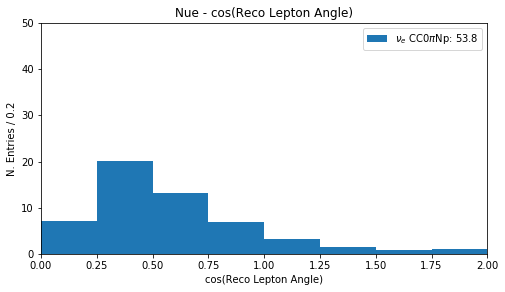

In [11]:
if isCombined == False:
    

    ########################################
    pup = list(nue_nue_sigsel_vars_tot.values())

    i = 0
    for c in nue_nue_sigsel_vars_tot.keys():
        nue_nue_sigsel_vars_tot[str(c)] = pup[i][0]
        i = i + 1

    pup2 = list(nue_nue_sigsel_weights_tot.values())

    i = 0
    for c in nue_nue_sigsel_weights_tot.keys():
        nue_nue_sigsel_weights_tot[str(c)] = pup2[i][0]
        i = i + 1

    varss = [nue_nue_sigsel_vars_tot]
    weightss = [nue_nue_sigsel_weights_tot]
    varss_tot = combine_dicts(varss)
    weightss_tot = combine_dicts(weightss)
    ############################################# 

    nue_fig = plt.figure(figsize=(8, 7))
    nue_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
    nue_ax1 = plt.subplot(nue_gs[0])
    nue_ax1.set_xlim([0, 2])
    labels = [
                "%s: %.1f" % (category_labels[int(c)], sum(weightss_tot[0][str(c)])) \
                if sum(weightss_tot[0][str(c)]) else ""
                for c in varss_tot[0].keys()
            ]

    VARIABLE, BINS, RANGE, XTIT = 'cosNu_Angle_Numi_Elec_asmuon_reco',8,(0, 2.0),"cos(Angle Diff)"

    nue_stacked = nue_ax1.hist(
                varss_tot[0].values(),
                weights=list(weightss_tot[0].values()),
                stacked=True,
                label=labels,
                bins=BINS,
                range=RANGE)



    current_total_hist = (nue_stacked[0][-1])

    nue_allsel_ax1.set_xlim([0, 2])    #TrueE, lepton mom
    current_bincenters =  np.arange(0.125, 2.125, 0.25)
    current_bin_size = 0.25


    n_nue_tot = (nue_stacked[0])
    print(n_nue_tot)
    #n_nue_tot = (nue_stacked[0])
    #print(n_nue_tot)


    #current_total_hist = (nue_stacked[0][-1])
    current_total_hist = (nue_stacked[0])
    print('%.50f' % math.fsum(nue_stacked[0]))
    print()


    nue_ax1.set_ylim([0, 50])

    plt.title("Nue - cos(Reco Lepton Angle)")
    plt.xlabel("cos(Reco Lepton Angle)")
    plt.ylabel("N. Entries / 0.2")
    plt.legend()

    #need to cut data to make it work for shorter plot

In [12]:
if isCombined == False and isRun3 == False:
    np.savetxt("nue_full_500_catsel_nopions_leptonMom_usingSelection_data_signal_MCONLY_recoCut_"+ending+".csv", 
               n_nue_tot,
               delimiter =", ", 
               fmt ='% s')

In [13]:
signal_nue_selected = current_total_hist
print("signal_nue_selected ", signal_nue_selected)

signal_nue_selected  [ 7.19021621 20.11254894 13.1731569   6.97249228  3.1947939   1.39160499
  0.7755744   1.0279544 ]


In [14]:
cv_nue_bkg_noExt_noDirt = total_nue_selected_noExt_noDirt - signal_nue_selected
print("cv_nue_bkg_noExt_noDirt ", cv_nue_bkg_noExt_noDirt)

print(isRun3)

if isCombined == True:
    np.savetxt("nue_nopions_leptonMom_usingSelection_comb_cv_nue_bkg_noExt_noDirt_"+ending+".csv", 
               cv_nue_bkg_noExt_noDirt,
               delimiter =", ", 
               fmt ='% s')
elif isCombined == False and isRun3 == False:
    np.savetxt("nue_nopions_leptonMom_usingSelection_run1_cv_nue_bkg_noExt_noDirt_"+ending+".csv", 
               cv_nue_bkg_noExt_noDirt,
               delimiter =", ", 
               fmt ='% s')
    np.savetxt("nue_nopions_leptonMom_usingSelection_run1_cv_nue_evt_rate_"+ending+".csv", 
               signal_nue_selected,
               delimiter =", ", 
               fmt ='% s')
    np.savetxt("nue_nopions_leptonMom_usingSelection_run1_cv_nue_full_evt_rate_"+ending+".csv", 
               n_nue_tot_allsel,
               delimiter =", ", 
               fmt ='% s')

cv_nue_bkg_noExt_noDirt  [6.43386412 5.99612807 4.07362726 1.48943212 1.47773504 0.70986569
 0.36266727 0.76813841]
False


## Now do Numu

dict_values([170, 318, 92, 50, 18, 15, 1, 0])
<class 'dict_values'>
[142.81473831 319.36850165 117.48229761  41.32534829  19.85854397
   9.49720892   1.63640351   0.70954891]


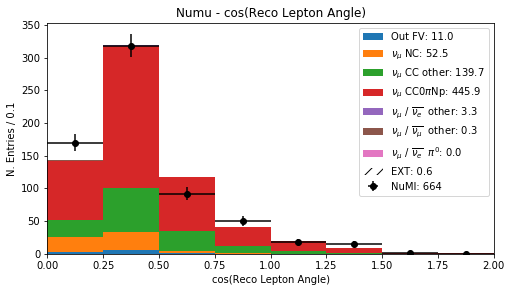

In [15]:
##COMMENT OUT DIRT FOR NUWRO

if isCombined == False:
    category_labels = {
        1 : r'$\nu_\mu$ CC0$\pi$Np', 
        2 : r'Out FV',
        3 : r'$\nu_e$ CC $\pi^{0}$',
        4 : r'$\nu_e$ CC',
        5 : r'$\nu_e$ NC $\pi^{0}$',
        6 : r'$\nu_e$ NC',
        7 : r'$\bar{\nu}_\mu$ CC0$\pi$Np',
        8: r'$\nu_\mu$ NC',
        9: r'$\nu_\mu$ CC other',
        10 : r'$\nu_\mu$ / $\overline{\nu_\mu}$  other', 
        11 : r'$\nu_\mu$ / $\overline{\nu_e}$  $\pi^{0}$', 
        12 : r'$\nu_\mu$ / $\overline{\nu_e}$  other',
        0: r'Unknown'
    }


    ############################################# 
    pup = list(numu_mc_allsel_vars_tot.values())

    i = 0
    for c in numu_mc_allsel_vars_tot.keys():
        numu_mc_allsel_vars_tot[str(c)] = pup[i][0]
        i = i + 1

    pup2 = list(numu_mc_allsel_weights_tot.values())

    i = 0
    for c in numu_mc_allsel_weights_tot.keys():
        numu_mc_allsel_weights_tot[str(c)] = pup2[i][0]
        i = i + 1
        
    ############################################# 
    pup = list(numu_nue_vars_tot.values())

    i = 0
    for c in numu_nue_vars_tot.keys():
        numu_nue_vars_tot[str(c)] = pup[i][0]
        i = i + 1

    pup2 = list(numu_nue_weights_tot.values())

    i = 0
    for c in numu_nue_weights_tot.keys():
        numu_nue_weights_tot[str(c)] = pup2[i][0]
        i = i + 1
        
    ############################################# 
    pup = list(numu_dirt_vars_tot.values())

    i = 0
    for c in numu_dirt_vars_tot.keys():
        numu_dirt_vars_tot[str(c)] = pup[i][0]
        i = i + 1

    pup2 = list(numu_dirt_weights_tot.values())

    i = 0
    for c in numu_dirt_weights_tot.keys():
        numu_dirt_weights_tot[str(c)] = pup2[i][0]
        i = i + 1
    ############################################# 

    def mergeDictionary(dict_1, dict_2):
        dict_3 = {**dict_1, **dict_2}
        for key, value in dict_3.items():
            if key in dict_1 and key in dict_2:
                    dict_3[key] = value + dict_1[key]
        return dict_3

    def combine_dicts(mydict):
        while len(mydict) > 1:
            i = 0
            dict_3 = mergeDictionary(mydict[i], mydict[i+1]) 
            mydict.pop(0)
            mydict[0] = dict_3
        return mydict

    varss = [numu_mc_allsel_vars_tot, numu_nue_vars_tot]#, numu_dirt_vars_tot]
    weightss = [numu_mc_allsel_weights_tot, numu_nue_weights_tot]#, numu_dirt_weights_tot]
    varss_tot = combine_dicts(varss)
    weightss_tot = combine_dicts(weightss)
    ############################################# 

    numu_allsel_fig = plt.figure(figsize=(8, 7))
    numu_allsel_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
    numu_allsel_ax1 = plt.subplot(numu_allsel_gs[0])
    numu_allsel_ax1.set_xlim([0, 2])
    labels = [
                "%s: %.1f" % (category_labels[int(c)], sum(weightss_tot[0][str(c)])) \
                if sum(weightss_tot[0][str(c)]) else ""
                for c in varss_tot[0].keys()
            ]

    VARIABLE, BINS, RANGE, XTIT = 'cosNu_Angle_Numi_Elec_asmuon_reco',8,(0, 2.0),"cos(Angle Diff)"

    numu_stacked = numu_allsel_ax1.hist(
                varss_tot[0].values(),
                weights=list(weightss_tot[0].values()),
                stacked=True,
                label=labels,
                bins=BINS,
                range=RANGE)



    current_total_hist = (numu_stacked[0][-1])

    n_ext, ext_bins, patches = numu_allsel_ax1.hist(
                numu_ext_vars_tot[str(0)][0],
                weights=numu_ext_weights_tot[str(0)][0],
                bottom=current_total_hist,
                label="EXT: %.1f" % (numu_ext_weights_tot[str(0)][0]) if (numu_ext_weights_tot[str(0)][0]) else "",
                hatch="//",
                color="white",
                bins=BINS,
                range=RANGE)


    nue_allsel_ax1.set_xlim([0, 2])    #TrueE, lepton mom
    current_bincenters =  np.arange(0.125, 2.125, 0.25)
    current_bin_size = 0.25

    print(numu_data_vars_tot[str(0)].values())
    print(type(numu_data_vars_tot[str(0)].values()))

    numu_allsel_ax1.errorbar(
                current_bincenters,
                numu_data_vars_tot[str(0)].values(),
                xerr=current_bin_size/2,
                yerr=numu_data_weights_tot[str(0)].values(),
                fmt='ko',
                label="NuMI: %i" % sum(numu_data_vars_tot[str(0)].values()) if sum(numu_data_vars_tot[str(0)].values()) else "")

    #print(nue_stacked[0][4])
    #print(sum(nue_stacked[0][4]))
    #n_nue_tot = nue_stacked[0][4]
    n_numu_tot = (numu_stacked[0][-1])
    print(n_numu_tot)
    n_numu_tot_allsel = n_numu_tot

    #numu_allsel_ax1.set_ylim([0, 1150])

    plt.title("Numu - cos(Reco Lepton Angle)")
    plt.xlabel("cos(Reco Lepton Angle)")
    plt.ylabel("N. Entries / 0.1")
    plt.legend()

In [16]:
#total_numu_selected_noExt = n_numu_tot
#print("total_numu_selected_noExt ", total_numu_selected_noExt)
total_numu_selected_noExt_noDirt = n_numu_tot
print("total_numu_selected_noExt_noDirt ", total_numu_selected_noExt_noDirt)


total_numu_selected_noExt_noDirt  [142.81473831 319.36850165 117.48229761  41.32534829  19.85854397
   9.49720892   1.63640351   0.70954891]


In [17]:
if isCombined == False:
    import importlib
    import Plotter_Functions_Alex
    importlib.reload(Plotter_Functions_Alex)
    from Plotter_Functions_Alex import getWantedLists
    importlib.reload(getWantedLists)


    wanted_key = 3

    numu_wanted_list = Plotter_Functions_Alex.getWantedLists.getWantedLists(wanted_key, numu_stacked)

    #numu_wanted_list = n_numu_tot

IndexError: index 8 is out of bounds for axis 0 with size 8

[ 90.20022892 217.42750265  83.05759187  29.58394003  15.85226227
   8.00821058   1.3025065    0.43626266]


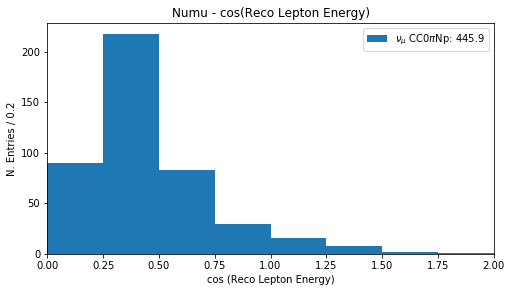

In [18]:
if isCombined == False:
    


    ############################################# 
    pup = list(numu_mc_sigsel_vars_tot.values())

    i = 0
    for c in numu_mc_sigsel_vars_tot.keys():
        numu_mc_sigsel_vars_tot[str(c)] = pup[i][0]
        i = i + 1

    pup2 = list(numu_mc_sigsel_weights_tot.values())

    i = 0
    for c in numu_mc_sigsel_weights_tot.keys():
        numu_mc_sigsel_weights_tot[str(c)] = pup2[i][0]
        i = i + 1
    ############################################# 

    varss = [numu_mc_sigsel_vars_tot]
    weightss = [numu_mc_sigsel_weights_tot]
    varss_tot = combine_dicts(varss)
    weightss_tot = combine_dicts(weightss)
    ############################################# 

    numu_fig = plt.figure(figsize=(8, 7))
    numu_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
    numu_ax1 = plt.subplot(numu_gs[0])
    numu_ax1.set_xlim([0, 2])
    labels = [
                "%s: %.1f" % (category_labels[int(c)], sum(weightss_tot[0][str(c)])) \
                if sum(weightss_tot[0][str(c)]) else ""
                for c in varss_tot[0].keys()
            ]

    VARIABLE, BINS, RANGE, XTIT = 'cosNu_Angle_Numi_Elec_asmuon_reco',8,(0, 2.0),"cos(Angle Diff)"

    numu_stacked = numu_ax1.hist(
                varss_tot[0].values(),
                weights=list(weightss_tot[0].values()),
                stacked=True,
                label=labels,
                bins=BINS,
                range=RANGE)



    current_total_hist = (numu_stacked[0])


    nue_allsel_ax1.set_xlim([0, 2])    #TrueE, lepton mom
    current_bincenters =  np.arange(0.125, 2.125, 0.25)
    current_bin_size = 0.25


    #print(nue_stacked[0][4])
    #print(sum(nue_stacked[0][4]))
    #n_nue_tot = nue_stacked[0][4]
    n_numu_tot = (numu_stacked[0])
    print(n_numu_tot)

    #numu_ax1.set_ylim([0, 950])

    plt.title("Numu - cos(Reco Lepton Energy)")
    plt.xlabel("cos (Reco Lepton Energy)")
    plt.ylabel("N. Entries / 0.2")
    plt.legend()

In [19]:
if isCombined == False and isRun3 == False:
    np.savetxt("numu_full_500_catsel_nopions_leptonMom_usingSelection_data_signal_MCONLY_recoCut_"+ending+".csv", 
               n_numu_tot,
               delimiter =", ", 
               fmt ='% s')

In [20]:
signal_numu_selected = current_total_hist
print("signal_nue_selected ", signal_numu_selected)

signal_nue_selected  [ 90.20022892 217.42750265  83.05759187  29.58394003  15.85226227
   8.00821058   1.3025065    0.43626266]


In [21]:
cv_numu_bkg_noExt_noDirt = total_numu_selected_noExt_noDirt - signal_numu_selected
print("cv_numu_bkg_noExt_noDirt ", cv_numu_bkg_noExt_noDirt)


if isCombined == False and isRun3 == False:
    np.savetxt("numu_nopions_leptonMom_usingSelection_run1_cv_numu_bkg_noExt_noDirt_"+ending+".csv", 
               cv_numu_bkg_noExt_noDirt,
               delimiter =", ", 
               fmt ='% s')
    np.savetxt("numu_nopions_leptonMom_usingSelection_run1_cv_numu_evt_rate_"+ending+".csv", 
               signal_numu_selected,
               delimiter =", ", 
               fmt ='% s')
    np.savetxt("numu_nopions_leptonMom_usingSelection_run1_cv_numu_full_evt_rate_"+ending+".csv", 
               n_numu_tot_allsel,
               delimiter =", ", 
               fmt ='% s') 

cv_numu_bkg_noExt_noDirt  [ 52.61450939 101.940999    34.42470574  11.74140826   4.00628171
   1.48899834   0.333897     0.27328625]


## Combined Plots

/home/alex/miniconda3/envs/vintageXgboostVintageUprootEnv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3245: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/home/alex/miniconda3/envs/vintageXgboostVintageUprootEnv/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


[45.7542244  72.48509044 49.59317089 27.89086325 14.67935062  7.19911374
  4.20593556  7.06885955]
[50.33126955 73.35520968 49.59317089 27.89086325 14.67935062  7.19911374
  4.20593556  7.06885955]


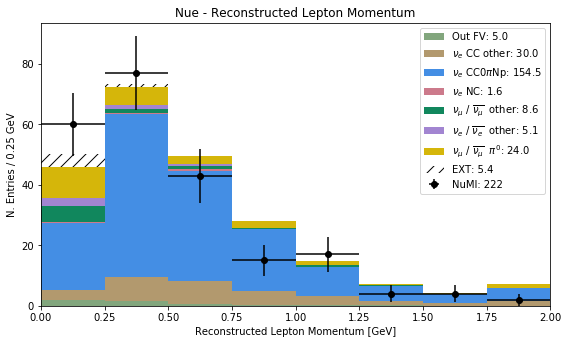

In [8]:
category_labels = {
    1 : r'$\nu_e$ CC0$\pi$Np', 
    2 : r'Out FV',
    3 : r'$\nu_\mu$ CC $\pi^{0}$',
    4 : r'$\nu_\mu$ CC',
    5 : r'$\nu_\mu$ NC $\pi^{0}$',
    6 : r'$\nu_\mu$ NC',
    7 : r'$\bar{\nu}_e$ CC0$\pi$Np',
    8: r'$\nu_e$ NC',
    9: r'$\nu_e$ CC other',
    10 : r'$\nu_e$ / $\overline{\nu_e}$  other', 
    11 : r'$\nu_\mu$ / $\overline{\nu_\mu}$  $\pi^{0}$', 
    12 : r'$\nu_\mu$ / $\overline{\nu_\mu}$  other',
    0: r'Unknown'
}

category_colors = {
    1: "#448ee4",     #dark sky blue
    2: "#82a67d",      #greyishgreen
    3: "#a2cffe",         #baby blue
    4: "#B5385D",       #dark rose
    5: "#9f2305",         #burnt red
    6: "#F46A25",             #orange
    7: "#ff474c",         #lightred
    8: "#cc7a8b",        #dusky pink
    9: "#b2996e",                 #dust
    10: "#A285D1",                 #light purple
    11: "#D5B60A",               #dark yellow
    12: "#11875D",                #dark sea green
    0: "#af884a",          #darktan
}


########################################
pup = list(nue_nue_allsel_vars_tot_run1.values())

i = 0
for c in nue_nue_allsel_vars_tot_run1.keys():
    nue_nue_allsel_vars_tot_run1[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(nue_nue_allsel_weights_tot_run1.values())

i = 0
for c in nue_nue_allsel_weights_tot_run1.keys():
    nue_nue_allsel_weights_tot_run1[str(c)] = pup2[i][0]
    i = i + 1
############################################# 
pup = list(nue_mc_vars_tot_run1.values())

i = 0
for c in nue_mc_vars_tot_run1.keys():
    nue_mc_vars_tot_run1[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(nue_mc_weights_tot_run1.values())

i = 0
for c in nue_mc_weights_tot_run1.keys():
    nue_mc_weights_tot_run1[str(c)] = pup2[i][0]
    i = i + 1
############################################# 
pup = list(nue_dirt_vars_tot_run1.values())

i = 0
for c in nue_dirt_vars_tot_run1.keys():
    nue_dirt_vars_tot_run1[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(nue_dirt_weights_tot_run1.values())

i = 0
for c in nue_dirt_weights_tot_run1.keys():
    nue_dirt_weights_tot_run1[str(c)] = pup2[i][0]
    i = i + 1
############################################# 
########################################
pup = list(nue_nue_allsel_vars_tot_run3.values())

i = 0
for c in nue_nue_allsel_vars_tot_run3.keys():
    nue_nue_allsel_vars_tot_run3[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(nue_nue_allsel_weights_tot_run3.values())

i = 0
for c in nue_nue_allsel_weights_tot_run3.keys():
    nue_nue_allsel_weights_tot_run3[str(c)] = pup2[i][0]
    i = i + 1
############################################# 
pup = list(nue_mc_vars_tot_run3.values())

i = 0
for c in nue_mc_vars_tot_run3.keys():
    nue_mc_vars_tot_run3[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(nue_mc_weights_tot_run3.values())

i = 0
for c in nue_mc_weights_tot_run3.keys():
    nue_mc_weights_tot_run3[str(c)] = pup2[i][0]
    i = i + 1
############################################# 
pup = list(nue_dirt_vars_tot_run3.values())

i = 0
for c in nue_dirt_vars_tot_run3.keys():
    nue_dirt_vars_tot_run3[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(nue_dirt_weights_tot_run3.values())

i = 0
for c in nue_dirt_weights_tot_run3.keys():
    nue_dirt_weights_tot_run3[str(c)] = pup2[i][0]
    i = i + 1
############################################# 

def mergeDictionary(dict_1, dict_2):
    dict_3 = {**dict_1, **dict_2}
    for key, value in dict_3.items():
        if key in dict_1 and key in dict_2:
                dict_3[key] = value + dict_1[key]
    return dict_3

def combine_dicts(mydict):
    while len(mydict) > 1:
        i = 0
        dict_3 = mergeDictionary(mydict[i], mydict[i+1]) 
        mydict.pop(0)
        mydict[0] = dict_3
    return mydict
    
varss = [nue_nue_allsel_vars_tot_run1, nue_mc_vars_tot_run1, nue_dirt_vars_tot_run1, nue_nue_allsel_vars_tot_run3, nue_mc_vars_tot_run3, nue_dirt_vars_tot_run3]
weightss = [nue_nue_allsel_weights_tot_run1, nue_mc_weights_tot_run1, nue_dirt_weights_tot_run1, nue_nue_allsel_weights_tot_run3, nue_mc_weights_tot_run3, nue_dirt_weights_tot_run3]

varss_tot = combine_dicts(varss)
weightss_tot = combine_dicts(weightss)
############################################# 

nue_allsel_fig = plt.figure(figsize=(8, 7))
nue_allsel_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
nue_allsel_ax1 = plt.subplot(nue_allsel_gs[0])
nue_allsel_ax1.set_xlim([0, 5])
labels = [
            "%s: %.1f" % (category_labels[int(c)], sum(weightss_tot[0][str(c)])) \
            if sum(weightss_tot[0][str(c)]) else ""
            for c in varss_tot[0].keys()
        ]

colors = [
            (category_colors[int(c)]) \
            if sum(weightss_tot[0][str(c)]) else ""
            for c in varss_tot[0].keys()
        ]

VARIABLE, BINS, RANGE, XTIT = 'reco_e',8,(0.0, 2.0),"Reco Energy [GeV]"

nue_stacked = nue_allsel_ax1.hist(
            varss_tot[0].values(),
            weights=list(weightss_tot[0].values()),
            stacked=True,
            label=labels,
            color = colors,
            bins=BINS,
            range=RANGE)



current_total_hist = (nue_stacked[0][-1])

i = 0
nue_ext_var = []
nue_ext_weight = []

for i in range(len(nue_ext_vars_tot_run1[str(0)])): 
    nue_ext_var.append(nue_ext_vars_tot_run1[str(0)][i])
    nue_ext_weight.append(nue_ext_weights_tot_run1[str(0)][i])
    i=i+1
    
for i in range(len(nue_ext_vars_tot_run3[str(0)])): 
    nue_ext_var.append(nue_ext_vars_tot_run3[str(0)][i])
    nue_ext_weight.append(nue_ext_weights_tot_run3[str(0)][i])
    i=i+1  

n_ext, ext_bins, patches = nue_allsel_ax1.hist(
            nue_ext_var,
            weights=nue_ext_weight,
            bottom=current_total_hist,
            label="EXT: %.1f" % sum(nue_ext_weight) if sum(nue_ext_weight) else "",
            hatch="//",
            color="white",
            bins=BINS,
            range=RANGE)

nue_allsel_ax1.set_xlim([0, 2])    #TrueE, lepton mom
current_bincenters =  np.arange(0.125, 2.125, 0.25)
current_bin_size = 0.25


i = 0
nue_data_var = []
nue_data_weight = []

while i < 8: 
    nue_data_var.append(nue_data_vars_tot_run1[str(0)][i] + nue_data_vars_tot_run3[str(0)][i])
    nue_data_weight.append(nue_data_weights_tot_run1[str(0)][i] + nue_data_weights_tot_run3[str(0)][i])
    i=i+1


nue_allsel_ax1.errorbar(
            current_bincenters,
            nue_data_var,
            xerr=current_bin_size/2,
            yerr=nue_data_weight,
            fmt='ko',
            label="NuMI: %i" % sum(nue_data_var) if (nue_data_var) else "")


n_nue_tot = (nue_stacked[0][-1])
print(n_nue_tot)
n_nue_tot_allsel = n_nue_tot + n_ext
#n_nue_tot = (nue_stacked[0])
print(n_nue_tot_allsel)


current_total_hist = (nue_stacked[0][-1])
#current_total_hist = (nue_stacked[0])

#nue_allsel_ax1.set_yscale('log')
#nue_allsel_ax1.set_ylim([0, 50])

plt.title("Nue - Reconstructed Lepton Momentum")
plt.xlabel("Reconstructed Lepton Momentum [GeV]")
plt.ylabel("N. Entries / 0.25 GeV")
plt.legend()
plt.tight_layout()

In [9]:
nue_allsel_fig.savefig("batch_nue_fig_full_500_catsel_nopions_leptonMom_comb_"+ending+".svg",bbox_inches='tight' )

In [10]:
total_nue_selected = n_nue_tot_allsel
print("total_nue_selected ", total_nue_selected)

total_nue_selected_noExt = n_nue_tot
print("total_nue_selected_noExt ", total_nue_selected_noExt)

total_nue_selected  [50.33126955 73.35520968 49.59317089 27.89086325 14.67935062  7.19911374
  4.20593556  7.06885955]
total_nue_selected_noExt  [45.7542244  72.48509044 49.59317089 27.89086325 14.67935062  7.19911374
  4.20593556  7.06885955]


[22.19439673 53.74003918 36.18860506 20.55350832  9.67411009  4.75723072
  3.04157219  4.36318348]
154.51264577866697891295189037919044494628906250000000



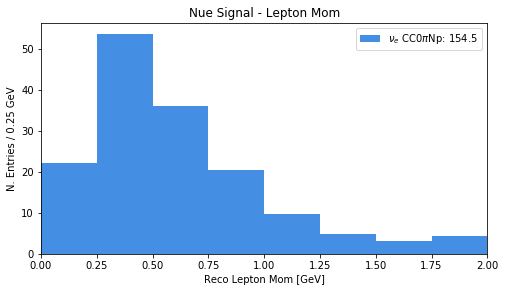

In [11]:



########################################
pup = list(nue_nue_sigsel_vars_tot_run1.values())

i = 0
for c in nue_nue_sigsel_vars_tot_run1.keys():
    nue_nue_sigsel_vars_tot_run1[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(nue_nue_sigsel_weights_tot_run1.values())

i = 0
for c in nue_nue_sigsel_weights_tot_run1.keys():
    nue_nue_sigsel_weights_tot_run1[str(c)] = pup2[i][0]
    i = i + 1
##############################################
########################################
pup = list(nue_nue_sigsel_vars_tot_run3.values())

i = 0
for c in nue_nue_sigsel_vars_tot_run3.keys():
    nue_nue_sigsel_vars_tot_run3[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(nue_nue_sigsel_weights_tot_run3.values())

i = 0
for c in nue_nue_sigsel_weights_tot_run3.keys():
    nue_nue_sigsel_weights_tot_run3[str(c)] = pup2[i][0]
    i = i + 1
##############################################
    
varss = [nue_nue_sigsel_vars_tot_run1, nue_nue_sigsel_vars_tot_run3]
weightss = [nue_nue_sigsel_weights_tot_run1, nue_nue_sigsel_weights_tot_run3]
varss_tot = combine_dicts(varss)
weightss_tot = combine_dicts(weightss)
############################################# 

nue_fig = plt.figure(figsize=(8, 7))
nue_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
nue_ax1 = plt.subplot(nue_gs[0])
nue_ax1.set_xlim([0, 5])
labels = [
            "%s: %.1f" % (category_labels[int(c)], sum(weightss_tot[0][str(c)])) \
            if sum(weightss_tot[0][str(c)]) else ""
            for c in varss_tot[0].keys()
        ]

VARIABLE, BINS, RANGE, XTIT = 'reco_e',8,(0.0, 2.0),"Reco Energy [GeV]"

nue_stacked = nue_ax1.hist(
            varss_tot[0].values(),
            weights=list(weightss_tot[0].values()),
            stacked=True,
            label=labels,
            color = "#448ee4",
            bins=BINS,
            range=RANGE)



current_total_hist = (nue_stacked[0][-1])

nue_ax1.set_xlim([0, 2])    #TrueE, lepton mom
current_bincenters =  np.arange(0.125, 2.125, 0.25)
current_bin_size = 0.25

n_nue_tot = (nue_stacked[0])
print(n_nue_tot)


current_total_hist = (nue_stacked[0])
print('%.50f' % math.fsum(nue_stacked[0]))
print()


#nue_ax1.set_ylim([0, 50])

plt.title("Nue Signal - Lepton Mom")
plt.xlabel("Reco Lepton Mom [GeV]")
plt.ylabel("N. Entries / 0.25 GeV")
plt.legend()

In [12]:
signal_nue_selected = current_total_hist
print("signal_nue_selected ", signal_nue_selected)

signal_nue_selected  [22.19439673 53.74003918 36.18860506 20.55350832  9.67411009  4.75723072
  3.04157219  4.36318348]


In [13]:
cv_nue_bkg_noExt = total_nue_selected_noExt - signal_nue_selected
print("cv_nue_bkg_noExt ", cv_nue_bkg_noExt)

cv_nue_bkg_incExt = total_nue_selected - signal_nue_selected
print("cv_nue_bkg_incExt ", cv_nue_bkg_incExt)

if isCombined == True:
    np.savetxt("nue_nopions_leptonMom_usingSelection_comb_cv_nue_bkg_noExt_"+ending+".csv", 
               cv_nue_bkg_noExt,
               delimiter =", ", 
               fmt ='% s')
    np.savetxt("nue_nopions_leptonMom_usingSelection_comb_cv_nue_bkg_incExt_"+ending+".csv", 
               cv_nue_bkg_incExt,
               delimiter =", ", 
               fmt ='% s')
elif isCombined == False and isRun3 == False:
    np.savetxt("nue_nopions_leptonMom_usingSelection_run1_cv_nue_bkg_noExt_"+ending+".csv", 
               cv_nue_bkg_noExt,
               delimiter =", ", 
               fmt ='% s')

cv_nue_bkg_noExt  [23.55982767 18.74505125 13.40456583  7.33735493  5.00524053  2.44188302
  1.16436337  2.70567606]
cv_nue_bkg_incExt  [28.13687282 19.6151705  13.40456583  7.33735493  5.00524053  2.44188302
  1.16436337  2.70567606]


In [14]:
#Data values
#data_values = list(nue_data_var[str(0)].values())
data_values = np.array(nue_data_var)
print(data_values)

#Off beam bkg
off_beam_bkg_0 = nue_ext_weights_tot_run1[str(0)][0] + nue_ext_weights_tot_run3[str(0)][0]
#print(off_beam_bkg_0)
off_beam_bkg = [0]*8
off_beam_bkg[0] = off_beam_bkg_0
off_beam_bkg = np.array(off_beam_bkg)
print(off_beam_bkg)


#Other bkg
wanted_signal_values = n_nue_tot
other_bkg = current_total_hist - wanted_signal_values
print(other_bkg)


#Data_signal - UNFOLDING INPUT
data_signal = data_values - off_beam_bkg - other_bkg


[60 77 43 15 17  4  4  2]
[0.87011925 0.         0.         0.         0.         0.
 0.         0.        ]
[0. 0. 0. 0. 0. 0. 0. 0.]


In [15]:
print(n_nue_tot)
print("")
print(n_nue_tot_allsel)

if isCombined == True:
    #np.savetxt("nue_full_500_catsel_nopions_leptonMom_usingSelection_data_signal.csv", 
    #           data_signal,
    #           delimiter =", ", 
    #           fmt ='% s')
    #---------------------------------------------------------------------------
    np.savetxt("nue_full_500_catsel_nopions_leptonMom_usingSelection_data_signal_MCONLY_recoCut_comb_"+ending+".csv", 
               n_nue_tot,
               delimiter =", ", 
               fmt ='% s')
    np.savetxt("nue_full_500_catsel_nopions_leptonMom_usingSelection_full_evt_count_MCONLY_recoCut_comb_"+ending+".csv", 
               n_nue_tot_allsel,
               delimiter =", ", 
               fmt ='% s')
    
    #---------------------------------------------------------------------------
    #np.savetxt("nue_full_500_catsel_nopions_leptonMom_usingSelection_data_signal_MCONLY_ALL.csv", 
    #           current_total_hist,
    #           delimiter =", ", 
    #           fmt ='% s')

[22.19439673 53.74003918 36.18860506 20.55350832  9.67411009  4.75723072
  3.04157219  4.36318348]

[50.33126955 73.35520968 49.59317089 27.89086325 14.67935062  7.19911374
  4.20593556  7.06885955]


In [16]:
def plot_signal_and_pur(var1, var2, bins, xaxis, title, savetitle, savetitleplot): 
    
    
    # plot selected signal events 
    fig, ax1 = plt.subplots(figsize=(4, 5))
    
    # compute efficiency
    eff = [ a/b for a, b in zip(var1, var2) ]
    eff_err = []
    for i in range(len(eff)):
        print(var2[i])
        print(eff[i]*(1-eff[i]))
        if eff[i]*(1-eff[i]) > 0:
            eff_err.append(math.sqrt( (eff[i]*(1-eff[i]))/var2[i] ) ) 
            print("In bin", i, ", ", title ," = ", eff[i], " with error = ", eff_err[i])
        else:
            eff_err.append(math.sqrt( (0.000001)/var2[i] ) ) 
            print("In bin", i, ", ", title ," = ", eff[i], " with error = ", eff_err[i])
        
    eff_tot = sum(var1)/sum(var2)
    print("Total ", title)
    print(eff_tot)
        
    # compute bin centers 
    #bc = 0.5*(sel[1][1:]+sel[1][:-1])
    bc =  np.arange(0.25, 2.25, 0.25)
    x_err = []
    for i in range(len(var1)): 
        x_err.append(0.25)


    # plot efficiency
    ax1.errorbar(bc, eff, xerr=x_err, yerr=eff_err, fmt='o', color='orangered', ecolor='orangered', markersize=3) 
    ax1.set_ylim(0, 1)

    ax1.set_ylabel(title, fontsize=15)
    ax1.set_title(title)
    ax1.set_xlabel(xaxis)
    
    np.savetxt(savetitle,
           eff,
           delimiter =", ", 
           fmt ='% s')
    
    print("Plot title: ", savetitleplot)
    fig.savefig(savetitleplot,bbox_inches='tight' )

    plt.show()

50.33126954801272
0.246515029349279
In bin 0 ,  Purity  =  0.4409663600078652  with error =  0.06998464412379136
73.35520968474214
0.19589716031303608
In bin 1 ,  Purity  =  0.732600171296076  with error =  0.05167715411771215
49.59317089291064
0.19723357221176932
In bin 2 ,  Purity  =  0.7297094420963811  with error =  0.06306370495532942
27.890863251155004
0.19386596804152928
In bin 3 ,  Purity  =  0.7369262162751744  with error =  0.08337192148757633
14.679350621088195
0.22470994339029884
In bin 4 ,  Purity  =  0.6590284773545328  with error =  0.12372507428323938
7.199113744090797
0.22414084216607855
In bin 5 ,  Purity  =  0.6608078288949933  with error =  0.17644972344403462
4.205935555363965
0.20019878318267703
In bin 6 ,  Purity  =  0.723161862371963  with error =  0.2181721993760355
7.0688595450593885
0.2362547619591451
In bin 7 ,  Purity  =  0.6172400871752273  with error =  0.18281659220201338
Total  Purity
0.6593980794367503
Plot title:  batch_pur_nue_fig_full_500_catsel_nop

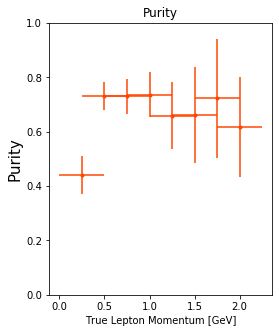

In [17]:
#NEED TO BE IN TRUTH BINS FOR THIS

variable = 'targetP_asmuon'  ##Just to note it
xaxis = "True Lepton Momentum [GeV]"
savetitle = "batch_pur_nue_fig_full_500_catsel_nopions_leptonMom_matrix_truepur_"+ending+".csv"
savetitleplot = "batch_pur_nue_fig_full_500_catsel_nopions_leptonMom_matrix_truepur_"+ending+".svg"

bins = np.arange(0, 2.25, 0.25)

var1 = signal_nue_selected
var2 = total_nue_selected

plot_signal_and_pur(var1, var2, bins, xaxis, "Purity", savetitle, savetitleplot)

Numu Combined Plots

{'0': {0: 170, 1: 318, 2: 92, 3: 50, 4: 18, 5: 15, 6: 1, 7: 0}}
[ 477.22411915 1094.18383585  398.08409114  148.35468392   55.43477536
   25.15411992    9.05871063    3.11752471]
[ 512.48670044 1133.43149066  403.7835538   149.22480317   55.74368585
   25.15411992    9.05871063    3.11752471]


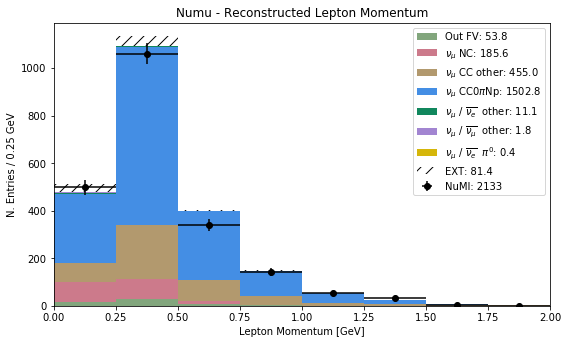

In [18]:
category_labels = {
    1 : r'$\nu_\mu$ CC0$\pi$Np', 
    2 : r'Out FV',
    3 : r'$\nu_e$ CC $\pi^{0}$',
    4 : r'$\nu_e$ CC',
    5 : r'$\nu_e$ NC $\pi^{0}$',
    6 : r'$\nu_e$ NC',
    7 : r'$\bar{\nu}_\mu$ CC0$\pi$Np',
    8: r'$\nu_\mu$ NC',
    9: r'$\nu_\mu$ CC other',
    10 : r'$\nu_\mu$ / $\overline{\nu_\mu}$  other', 
    11 : r'$\nu_\mu$ / $\overline{\nu_e}$  $\pi^{0}$', 
    12 : r'$\nu_\mu$ / $\overline{\nu_e}$  other',
    0: r'Unknown'
}

category_colors = {
    1: "#448ee4",     #dark sky blue
    2: "#82a67d",      #greyishgreen
    3: "#a2cffe",         #baby blue
    4: "#B5385D",       #dark rose
    5: "#9f2305",         #burnt red
    6: "#F46A25",             #orange
    7: "#ff474c",         #lightred
    8: "#cc7a8b",        #dusky pink
    9: "#b2996e",                 #dust
    10: "#A285D1",                 #light purple
    11: "#D5B60A",               #dark yellow
    12: "#11875D",                #dark sea green
    0: "#af884a",          #darktan
}


############################################# 
pup = list(numu_mc_allsel_vars_tot_run1.values())

i = 0
for c in numu_mc_allsel_vars_tot_run1.keys():
    numu_mc_allsel_vars_tot_run1[str(c)] = pup[i][0]
    i = i + 1
    
    
pup2 = list(numu_mc_allsel_weights_tot_run1.values())

i = 0
for c in numu_mc_allsel_weights_tot_run1.keys():
    numu_mc_allsel_weights_tot_run1[str(c)] = pup2[i][0]
    i = i + 1
############################################# 
pup = list(numu_nue_vars_tot_run1.values())

i = 0
for c in numu_nue_vars_tot_run1.keys():
    numu_nue_vars_tot_run1[str(c)] = pup[i][0]
    i = i + 1
    
    
pup2 = list(numu_nue_weights_tot_run1.values())

i = 0
for c in numu_nue_weights_tot_run1.keys():
    numu_nue_weights_tot_run1[str(c)] = pup2[i][0]
    i = i + 1
############################################# 
pup = list(numu_dirt_vars_tot_run1.values())

i = 0
for c in numu_dirt_vars_tot_run1.keys():
    numu_dirt_vars_tot_run1[str(c)] = pup[i][0]
    i = i + 1
    
    
pup2 = list(numu_dirt_weights_tot_run1.values())

i = 0
for c in numu_dirt_weights_tot_run1.keys():
    numu_dirt_weights_tot_run1[str(c)] = pup2[i][0]
    i = i + 1
############################################# 
############################################# 
pup = list(numu_mc_allsel_vars_tot_run3.values())

i = 0
for c in numu_mc_allsel_vars_tot_run3.keys():
    numu_mc_allsel_vars_tot_run3[str(c)] = pup[i][0]
    i = i + 1
    
    
pup2 = list(numu_mc_allsel_weights_tot_run3.values())

i = 0
for c in numu_mc_allsel_weights_tot_run3.keys():
    numu_mc_allsel_weights_tot_run3[str(c)] = pup2[i][0]
    i = i + 1
############################################# 
pup = list(numu_nue_vars_tot_run3.values())

i = 0
for c in numu_nue_vars_tot_run3.keys():
    numu_nue_vars_tot_run3[str(c)] = pup[i][0]
    i = i + 1
    
    
pup2 = list(numu_nue_weights_tot_run3.values())

i = 0
for c in numu_nue_weights_tot_run3.keys():
    numu_nue_weights_tot_run3[str(c)] = pup2[i][0]
    i = i + 1
############################################# 
pup = list(numu_dirt_vars_tot_run3.values())

i = 0
for c in numu_dirt_vars_tot_run3.keys():
    numu_dirt_vars_tot_run3[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(numu_dirt_weights_tot_run3.values())

i = 0
for c in numu_dirt_weights_tot_run3.keys():
    numu_dirt_weights_tot_run3[str(c)] = pup2[i][0]
    i = i + 1
############################################# 

def mergeDictionary(dict_1, dict_2):
    dict_3 = {**dict_1, **dict_2}
    for key, value in dict_3.items():
        if (key in dict_1) and (key in dict_2):
            dict_3[key] = value + dict_1[key]
    return dict_3

def combine_dicts(mydict):
    while len(mydict) > 1:
        i = 0
        dict_3 = mergeDictionary(mydict[i], mydict[i+1]) 
        mydict.pop(0)
        mydict[0] = dict_3
    return mydict
    

varss = [numu_mc_allsel_vars_tot_run1, numu_nue_vars_tot_run1, numu_dirt_vars_tot_run1, numu_mc_allsel_vars_tot_run3, numu_nue_vars_tot_run3, numu_dirt_vars_tot_run3]
weightss = [numu_mc_allsel_weights_tot_run1, numu_nue_weights_tot_run1, numu_dirt_weights_tot_run1, numu_mc_allsel_weights_tot_run3, numu_nue_weights_tot_run3, numu_dirt_weights_tot_run3]
varss_tot = combine_dicts(varss)
weightss_tot = combine_dicts(weightss)
############################################# 

numu_allsel_fig = plt.figure(figsize=(8, 7))
numu_allsel_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
numu_allsel_ax1 = plt.subplot(numu_allsel_gs[0])
#numu_allsel_ax1.set_xlim([0, 5])
labels = [
            "%s: %.1f" % (category_labels[int(c)], sum(weightss_tot[0][str(c)])) \
            if sum(weightss_tot[0][str(c)]) else ""
            for c in varss_tot[0].keys()
        ]

colors = [
            (category_colors[int(c)]) \
            if sum(weightss_tot[0][str(c)]) else ""
            for c in varss_tot[0].keys()
        ]

VARIABLE, BINS, RANGE, XTIT = 'target_P',8,(0.0, 2.0),"Reco Energy [GeV]"

numu_stacked = numu_allsel_ax1.hist(
            varss_tot[0].values(),
            weights=list(weightss_tot[0].values()),
            stacked=True,
            label=labels,
            color = colors,
            bins=BINS,
            range=RANGE)



current_total_hist = (numu_stacked[0][-1])
#print(current_total_hist)

i = 0
numu_ext_var = []
numu_ext_weight = []

for i in range(len(numu_ext_vars_tot_run1[str(0)])): 
    numu_ext_var.append(numu_ext_vars_tot_run1[str(0)][i])
    numu_ext_weight.append(numu_ext_weights_tot_run1[str(0)][i])
    i=i+1
    
for i in range(len(numu_ext_vars_tot_run3[str(0)])): 
    numu_ext_var.append(numu_ext_vars_tot_run3[str(0)][i])
    numu_ext_weight.append(numu_ext_weights_tot_run3[str(0)][i])
    i=i+1    


n_ext, ext_bins, patches = numu_allsel_ax1.hist(
            numu_ext_var,
            weights=numu_ext_weight,
            bottom=current_total_hist,
            label="EXT: %.1f" % sum(numu_ext_weight) if sum(numu_ext_weight) else "",
            hatch="//",
            color="white",
            bins=BINS,
            range=RANGE)


numu_allsel_ax1.set_xlim([0, 2])    #TrueE, lepton mom
current_bincenters =  np.arange(0.125, 2.125, 0.25)
current_bin_size = 0.25

i = 0
numu_data_var = []
numu_data_weight = []

print(numu_data_vars_tot_run1)

while i < 8: #TrueE
    numu_data_var.append(numu_data_vars_tot_run1[str(0)][i] + numu_data_vars_tot_run3[str(0)][i])
    numu_data_weight.append(numu_data_weights_tot_run1[str(0)][i] + numu_data_weights_tot_run3[str(0)][i])
    i=i+1


numu_allsel_ax1.errorbar(
            current_bincenters,
            numu_data_var,
            xerr=current_bin_size/2,
            yerr=numu_data_weight,
            fmt='ko',
            label="NuMI: %i" % sum(numu_data_var) if sum(numu_data_var) else "")


n_numu_tot = (numu_stacked[0][-1])
print(n_numu_tot)
n_numu_tot_allsel = n_numu_tot + n_ext
print(n_numu_tot_allsel)

#numu_allsel_ax1.set_ylim([0, 1150])

plt.title("Numu - Reconstructed Lepton Momentum")
plt.xlabel("Lepton Momentum [GeV]")
plt.ylabel("N. Entries / 0.25 GeV")
plt.legend()
plt.tight_layout()

In [19]:
numu_allsel_fig.savefig("batch_numu_fig_full_500_catsel_nopions_leptonMom_comb_"+ending+".svg",bbox_inches='tight' )

In [20]:
total_numu_selected = n_numu_tot_allsel
print("total_numu_selected ", total_numu_selected)

total_numu_selected_noExt = n_numu_tot
print("total_numu_selected_noExt ", total_numu_selected_noExt)

total_numu_selected  [ 512.48670044 1133.43149066  403.7835538   149.22480317   55.74368585
   25.15411992    9.05871063    3.11752471]
total_numu_selected_noExt  [ 477.22411915 1094.18383585  398.08409114  148.35468392   55.43477536
   25.15411992    9.05871063    3.11752471]


[288.93520783 748.26775523 288.72548835 106.55908935  43.18713404
  18.45264539   7.53184448   1.11345134]
1502.77261600872111557691823691129684448242187500000000



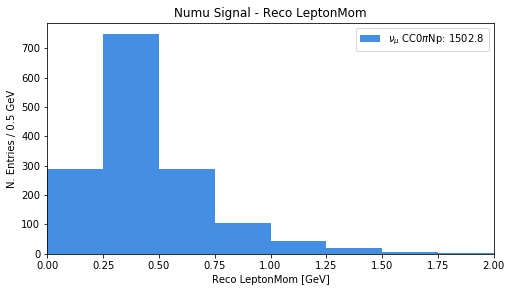

In [21]:



########################################
pup = list(numu_mc_sigsel_vars_tot_run1.values())

i = 0
for c in numu_mc_sigsel_vars_tot_run1.keys():
    numu_mc_sigsel_vars_tot_run1[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(numu_mc_sigsel_weights_tot_run1.values())

i = 0
for c in numu_mc_sigsel_weights_tot_run1.keys():
    numu_mc_sigsel_weights_tot_run1[str(c)] = pup2[i][0]
    i = i + 1
##############################################
########################################
pup = list(numu_mc_sigsel_vars_tot_run3.values())

i = 0
for c in numu_mc_sigsel_vars_tot_run3.keys():
    numu_mc_sigsel_vars_tot_run3[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(numu_mc_sigsel_weights_tot_run3.values())

i = 0
for c in numu_mc_sigsel_weights_tot_run3.keys():
    numu_mc_sigsel_weights_tot_run3[str(c)] = pup2[i][0]
    i = i + 1
##############################################
    
varss = [numu_mc_sigsel_vars_tot_run1, numu_mc_sigsel_vars_tot_run3]
weightss = [numu_mc_sigsel_weights_tot_run1, numu_mc_sigsel_weights_tot_run3]
varss_tot = combine_dicts(varss)
weightss_tot = combine_dicts(weightss)
############################################# 

numu_fig = plt.figure(figsize=(8, 7))
numu_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
numu_ax1 = plt.subplot(numu_gs[0])
numu_ax1.set_xlim([0, 2])
labels = [
            "%s: %.1f" % (category_labels[int(c)], sum(weightss_tot[0][str(c)])) \
            if sum(weightss_tot[0][str(c)]) else ""
            for c in varss_tot[0].keys()
        ]

VARIABLE, BINS, RANGE, XTIT = 'reco_e',8,(0.0, 2.0),"Reco Energy [GeV]"

numu_stacked = numu_ax1.hist(
            varss_tot[0].values(),
            weights=list(weightss_tot[0].values()),
            stacked=True,
            label=labels,
            color = "#448ee4",
            bins=BINS,
            range=RANGE)



current_total_hist = (numu_stacked[0][-1])

numu_ax1.set_xlim([0, 2])    #TrueE, lepton mom
current_bincenters =  np.arange(0.125, 2.125, 0.25)
current_bin_size = 0.25

n_numu_tot = (numu_stacked[0])
print(n_numu_tot)


current_total_hist = (numu_stacked[0])
print('%.50f' % math.fsum(numu_stacked[0]))
print()


#nue_ax1.set_ylim([0, 50])

plt.title("Numu Signal - Reco LeptonMom")
plt.xlabel("Reco LeptonMom [GeV]")
plt.ylabel("N. Entries / 0.5 GeV")
plt.legend()

In [22]:
signal_numu_selected = current_total_hist
print("signal_numu_selected ", signal_numu_selected)

signal_numu_selected  [288.93520783 748.26775523 288.72548835 106.55908935  43.18713404
  18.45264539   7.53184448   1.11345134]


In [23]:
cv_numu_bkg_noExt = total_numu_selected_noExt - signal_numu_selected
print("cv_numu_bkg_noExt ", cv_numu_bkg_noExt)

cv_numu_bkg_incExt = total_numu_selected - signal_numu_selected
print("cv_numu_bkg_incExt ", cv_numu_bkg_incExt)

if isCombined == True:
    np.savetxt("numu_nopions_leptonMom_usingSelection_comb_cv_numu_bkg_noExt_"+ending+".csv", 
               cv_numu_bkg_noExt,
               delimiter =", ", 
               fmt ='% s')
    np.savetxt("numu_nopions_leptonMom_usingSelection_comb_cv_numu_bkg_incExt_"+ending+".csv", 
               cv_numu_bkg_incExt,
               delimiter =", ", 
               fmt ='% s')
elif isCombined == False and isRun3 == False:
    np.savetxt("numu_nopions_leptonMom_usingSelection_run1_cv_numu_bkg_noExt_"+ending+".csv", 
               cv_numu_bkg_noExt,
               delimiter =", ", 
               fmt ='% s')

cv_numu_bkg_noExt  [188.28891133 345.91608062 109.35860278  41.79559457  12.24764132
   6.70147453   1.52686615   2.00407337]
cv_numu_bkg_incExt  [223.55149261 385.16373543 115.05806545  42.66571382  12.55655181
   6.70147453   1.52686615   2.00407337]


In [24]:
#Data values
#data_values = list(numu_data_vars_tot[str(0)].values())
data_values = np.array(numu_data_var)
print(data_values)

#Off beam bkg
off_beam_bkg_0 = numu_ext_weights_tot_run1[str(0)][0] + numu_ext_weights_tot_run3[str(0)][0]
#print(off_beam_bkg_0)
off_beam_bkg = [0]*8
off_beam_bkg[0] = off_beam_bkg_0
off_beam_bkg = np.array(off_beam_bkg)
print(off_beam_bkg)


#Other bkg
wanted_signal_values = n_numu_tot
other_bkg = current_total_hist - wanted_signal_values
print(other_bkg)


#Data_signal - UNFOLDING INPUT
data_signal = data_values - off_beam_bkg - other_bkg

[ 498 1060  341  141   54   33    5    1]
[0.87011925 0.         0.         0.         0.         0.
 0.         0.        ]
[0. 0. 0. 0. 0. 0. 0. 0.]


In [25]:
print(n_numu_tot)
print("")
print(n_numu_tot_allsel)

if isCombined == True:
    np.savetxt("numu_full_500_catsel_nopions_leptonMom_usingSelection_data_signal_MCONLY_recoCut_comb_"+ending+".csv", 
               n_numu_tot,
               delimiter =", ", 
               fmt ='% s')
    np.savetxt("numu_full_500_catsel_nopions_leptonMom_usingSelection_full_evt_count_MCONLY_recoCut_comb_"+ending+".csv", 
               n_numu_tot_allsel,
               delimiter =", ", 
               fmt ='% s')

[288.93520783 748.26775523 288.72548835 106.55908935  43.18713404
  18.45264539   7.53184448   1.11345134]

[ 512.48670044 1133.43149066  403.7835538   149.22480317   55.74368585
   25.15411992    9.05871063    3.11752471]


In [26]:
def plot_signal_and_pur(var1, var2, bins, xaxis, title, savetitle, savetitleplot): 
    
    
    # plot selected signal events 
    fig, ax1 = plt.subplots(figsize=(4, 5))
    
    # compute efficiency
    eff = [ a/b for a, b in zip(var1, var2) ]
    eff_err = []
    for i in range(len(eff)):
        print(var2[i])
        print(eff[i]*(1-eff[i]))
        if eff[i]*(1-eff[i]) > 0:
            eff_err.append(math.sqrt( (eff[i]*(1-eff[i]))/var2[i] ) ) 
            print("In bin", i, ", ", title ," = ", eff[i], " with error = ", eff_err[i])
        else:
            eff_err.append(math.sqrt( (0.000001)/var2[i] ) ) 
            print("In bin", i, ", ", title ," = ", eff[i], " with error = ", eff_err[i])
        
    eff_tot = sum(var1)/sum(var2)
    print("Total ", title)
    print(eff_tot)
        
    # compute bin centers 
    #bc = 0.5*(sel[1][1:]+sel[1][:-1])
    bc =  np.arange(0.125, 2.125, 0.25)
    x_err = []
    for i in range(len(var1)): 
        x_err.append(0.125)


    # plot efficiency
    ax1.errorbar(bc, eff, xerr=x_err, yerr=eff_err, fmt='o', color='orangered', ecolor='orangered', markersize=3) 
    ax1.set_ylim(0, 1)

    ax1.set_ylabel(title, fontsize=15)
    ax1.set_title(title)
    ax1.set_xlabel(xaxis)
    
    np.savetxt(savetitle,
           eff,
           delimiter =", ", 
           fmt ='% s')
    
    print("Plot title: ", savetitleplot)
    fig.savefig(savetitleplot,bbox_inches='tight' )

    plt.show()

[288.93520783 748.26775523 288.72548835 106.55908935  43.18713404
  18.45264539   7.53184448   1.11345134]
1502.7726160087211
[ 512.48670044 1133.43149066  403.7835538   149.22480317   55.74368585
   25.15411992    9.05871063    3.11752471]
2292.000589182201
512.486700437638
0.2459307535024656
In bin 0 ,  Purity  =  0.563790645846663  with error =  0.021906102754146235
1133.431490660356
0.22434266332514527
In bin 1 ,  Purity  =  0.6601790768947515  with error =  0.014068840251430731
403.7835538020574
0.20375343549761704
In bin 2 ,  Purity  =  0.7150501441580148  with error =  0.02246353792180292
149.2248031733101
0.20416791181948205
In bin 3 ,  Purity  =  0.7140843015742115  with error =  0.03698905500398248
55.74368584923738
0.1745152624177913
In bin 4 ,  Purity  =  0.7747448590642029  with error =  0.05595241892129101
25.15411992177777
0.19543878462905942
In bin 5 ,  Purity  =  0.7335834227228906  with error =  0.08814563546957796
9.058710626522931
0.1401423956194371
In bin 6 ,  Puri

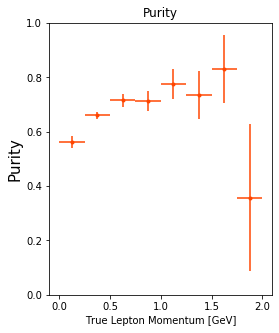

In [27]:
#NEED TO BE IN TRUTH BINS FOR THIS

variable = 'target_P'  ##Just to note it
xaxis = "True Lepton Momentum [GeV]"
savetitle = "batch_pur_numu_fig_full_500_catsel_nopions_leptonMom_matrix_truepur_"+ending+".csv"
savetitleplot = "batch_pur_numu_fig_full_500_catsel_nopions_leptonMom_matrix_truepur_"+ending+".svg"

bins = np.arange(0, 2.25, 0.25)

var1 = signal_numu_selected
print(var1)
print(sum(var1))
var2 = total_numu_selected
print(var2)
print(sum(var2))


plot_signal_and_pur(var1, var2, bins, xaxis, "Purity", savetitle, savetitleplot)

## Ratio Plot

Meaningless before unfolding

## Errors

### Get ratio stat errs

In [28]:
if isCombined == False:
    nue_nue_sigsel_stat_errs = np.array(nue_nue_sigsel_stat_errs)
    nue_nue_notsigsel_stat_errs = np.array(nue_nue_notsigsel_stat_errs)
    nue_mc_stat_errs = np.array(nue_mc_stat_errs)
    nue_dirt_stat_errs = np.array(nue_dirt_stat_errs)
    nue_ext_stat_errs = np.array(nue_ext_stat_errs)

    numu_mc_sigsel_stat_errs = np.array(numu_mc_sigsel_stat_errs)
    numu_mc_notsigsel_stat_errs = np.array(numu_mc_notsigsel_stat_errs)
    numu_nue_stat_errs = np.array(numu_nue_stat_errs)
    numu_dirt_stat_errs = np.array(numu_dirt_stat_errs)
    numu_ext_stat_errs = np.array(numu_ext_stat_errs)


    #numu_detsys_errs = np.array(numu_detsys_errs)
elif isCombined == True:
    nue_nue_sigsel_stat_errs_run1 = np.array(nue_nue_sigsel_stat_errs_run1)
    nue_nue_notsigsel_stat_errs_run1 = np.array(nue_nue_notsigsel_stat_errs_run1)
    nue_mc_stat_errs_run1 = np.array(nue_mc_stat_errs_run1)
    nue_dirt_stat_errs_run1= np.array(nue_dirt_stat_errs_run1)
    nue_ext_stat_errs_run1 = np.array(nue_ext_stat_errs_run1)

    numu_mc_sigsel_stat_errs_run1 = np.array(numu_mc_sigsel_stat_errs_run1)
    numu_mc_notsigsel_stat_errs_run1 = np.array(numu_mc_notsigsel_stat_errs_run1)
    numu_nue_stat_errs_run1 = np.array(numu_nue_stat_errs_run1)
    numu_dirt_stat_errs_run1 = np.array(numu_dirt_stat_errs_run1)
    numu_ext_stat_errs_run1 = np.array(numu_ext_stat_errs_run1)


    #numu_detsys_errs = np.array(numu_detsys_errs)
    ###########################################
    nue_nue_sigsel_stat_errs_run3 = np.array(nue_nue_sigsel_stat_errs_run3)
    nue_nue_notsigsel_stat_errs_run3 = np.array(nue_nue_notsigsel_stat_errs_run3)
    nue_mc_stat_errs_run3 = np.array(nue_mc_stat_errs_run3)
    nue_dirt_stat_errs_run3 = np.array(nue_dirt_stat_errs_run3)
    nue_ext_stat_errs_run3 = np.array(nue_ext_stat_errs_run3)

    numu_mc_sigsel_stat_errs_run3 = np.array(numu_mc_sigsel_stat_errs_run3)
    numu_mc_notsigsel_stat_errs_run3 = np.array(numu_mc_notsigsel_stat_errs_run3)
    numu_nue_stat_errs_run3 = np.array(numu_nue_stat_errs_run3)
    numu_dirt_stat_errs_run3 = np.array(numu_dirt_stat_errs_run3)
    numu_ext_stat_errs_run3 = np.array(numu_ext_stat_errs_run3)


    #numu_detsys_errs = np.array(numu_detsys_errs)

### Expected Error Calculations

In [29]:
# Merge the backgrounds from nue and mc stat errors
if isCombined == False:
    errs = [nue_nue_notsigsel_stat_errs, nue_mc_stat_errs]
elif isCombined == True:
    errs = [nue_nue_notsigsel_stat_errs_run1, nue_mc_stat_errs_run1, nue_nue_notsigsel_stat_errs_run3, nue_mc_stat_errs_run3]    

#arrange the lists such that all the errors from bin 1 are in one list, bin 2 in another list, etc...
masterlist = []
templist = []
for i in range((len(errs[0]))):
    masterlist.append(templist)
    templist = []
    for j in range(len(errs)):
        templist.append(errs[j][i])
masterlist.append(templist)
    
masterlist.pop(0)

#deal with adding the errors in each bin
total_errs = []
holdlist = []
for f in masterlist:
    total_errs.append(sum(holdlist))
    #print("------------------------------")
    holdlist = []
    for g in f:
        #just add them as they differnt parts of the same total number. This then matches previous when doing total
        holdlist.append(g)
total_errs.append(sum(holdlist))

total_errs.pop(0)
print("total errs nue = ", total_errs)
print("")

nue_nue_mc_bkg_stat_errs = total_errs

#####################################################
if isCombined == False:
    errs = [numu_mc_notsigsel_stat_errs, numu_nue_stat_errs]
elif isCombined == True:
    errs = [numu_mc_notsigsel_stat_errs_run1, numu_nue_stat_errs_run1, numu_mc_notsigsel_stat_errs_run3, numu_nue_stat_errs_run3]    


#arrange the lists such that all the errors from bin 1 are in one list, bin 2 in another list, etc...
masterlist = []
templist = []
for i in range((len(errs[0]))):
    masterlist.append(templist)
    templist = []
    for j in range(len(errs)):
        templist.append(errs[j][i])
masterlist.append(templist)

masterlist.pop(0)

#deal with adding the errors in each bin
total_errs = []
holdlist = []
for f in masterlist:
    total_errs.append(sum(holdlist))
    #print("------------------------------")
    holdlist = []
    for g in f:
        #just add them as they differnt parts of the same total number. This then matches previous when doing total
        holdlist.append(g)
total_errs.append(sum(holdlist))

total_errs.pop(0)
numu_nue_mc_bkg_stat_errs = total_errs


print("total errs numu = ", numu_nue_mc_bkg_stat_errs)

total errs nue =  [4.285041457181544, 2.2295799510494962, 1.4234422350333544, 0.7432552019654357, 0.5500387558154541, 0.20502323394416855, 0.09003997784497009, 0.33467734430666674]

total errs numu =  [39.46318104441502, 72.02877585032097, 27.976695817480127, 18.072606166838924, 3.6986214759814704, 1.4160957538006962, 0.33281639191887014, 0.4749756023624124]


In [30]:
#Don't the ext values were rooted before, square them to combine!

noTune = False
MECTune = False

if isCombined == False:
    nue_exp_err    = np.sqrt(nue_nue_mc_bkg_stat_errs + nue_nue_sigsel_stat_errs + nue_dirt_stat_errs + (nue_ext_stat_errs*nue_ext_stat_errs))
    totalstat_nue = nue_nue_mc_bkg_stat_errs + nue_nue_sigsel_stat_errs + nue_dirt_stat_errs + (nue_ext_stat_errs*nue_ext_stat_errs)
    #totalstat_nue = totalstat_nue
    print("totalstat_nue ",totalstat_nue )
    print("nue_exp_err ", nue_exp_err)
    print("")
    
    nue_bkg_exp_err_squared = nue_nue_mc_bkg_stat_errs + nue_dirt_stat_errs + (nue_ext_stat_errs*nue_ext_stat_errs)
    print("nue_bkg_exp_err ", nue_bkg_exp_err_squared)
    print("")
    
    if isRun3 == False and noTune == False and isCombined == False and MECTune == False:
        np.savetxt("nue_bkg_exp_err_squared_lepton_"+ending+".csv", 
                   nue_bkg_exp_err_squared,
                   delimiter =", ", 
                   fmt ='% s')

    numu_exp_err    = np.sqrt(numu_nue_mc_bkg_stat_errs + numu_mc_sigsel_stat_errs + numu_dirt_stat_errs + (numu_ext_stat_errs*numu_ext_stat_errs))
    totalstat_numu = numu_nue_mc_bkg_stat_errs + numu_mc_sigsel_stat_errs + numu_dirt_stat_errs + (numu_ext_stat_errs*numu_ext_stat_errs)
    print("totalstat_numu ",totalstat_numu )
    print("numu_exp_err ", numu_exp_err)
    print("")
    
    numu_bkg_exp_err_squared = numu_nue_mc_bkg_stat_errs + numu_dirt_stat_errs + (numu_ext_stat_errs*numu_ext_stat_errs)
    print("numu_bkg_exp_err ", numu_bkg_exp_err_squared)
    
    if isRun3 == False and noTune == False and isCombined == False and MECTune == False:
        np.savetxt("numu_bkg_exp_err_squared_lepton_"+ending+".csv", 
                   numu_bkg_exp_err_squared,
                   delimiter =", ", 
                   fmt ='% s')
    
elif isCombined == True:
    nue_exp_err    = np.sqrt(nue_nue_mc_bkg_stat_errs + nue_nue_sigsel_stat_errs_run1 + nue_dirt_stat_errs_run1 + (nue_ext_stat_errs_run1*nue_ext_stat_errs_run1) + nue_nue_sigsel_stat_errs_run3 + nue_dirt_stat_errs_run3 + (nue_ext_stat_errs_run3*nue_ext_stat_errs_run3))
    totalstat_nue = nue_nue_mc_bkg_stat_errs + nue_nue_sigsel_stat_errs_run1 + nue_dirt_stat_errs_run1 + (nue_ext_stat_errs_run1*nue_ext_stat_errs_run1) + nue_nue_sigsel_stat_errs_run3 + nue_dirt_stat_errs_run3 + (nue_ext_stat_errs_run3*nue_ext_stat_errs_run3)
    print("totalstat_nue ",totalstat_nue )
    print("nue_exp_err ", nue_exp_err)
    print("")
    
    nue_bkg_exp_err_squared = nue_nue_mc_bkg_stat_errs + nue_dirt_stat_errs_run1 + nue_dirt_stat_errs_run3 + (nue_ext_stat_errs_run1*nue_ext_stat_errs_run1) + (nue_ext_stat_errs_run3*nue_ext_stat_errs_run3)
    print("nue_bkg_exp_err ", nue_bkg_exp_err_squared)
    print("")
    
    nue_sig_only_err = nue_nue_sigsel_stat_errs_run1 + nue_nue_sigsel_stat_errs_run3
    
    if noTune == False and MECTune == False and isCombined == True:
        np.savetxt("nue_bkg_exp_err_squared_lepton_comb_"+ending+".csv", 
                   nue_bkg_exp_err_squared,
                   delimiter =", ", 
                   fmt ='% s')
    elif (noTune == True or MECTune == True) and isCombined == True:
        np.savetxt("nue_sig_only_err_squared_lepton_comb_"+ending+".csv", 
                   nue_sig_only_err,
                   delimiter =", ", 
                   fmt ='% s')
        np.savetxt("nue_total_noTune_err_squared_lepton_comb_"+ending+".csv", 
                   totalstat_nue,
                   delimiter =", ", 
                   fmt ='% s')   

    numu_exp_err    = np.sqrt(numu_nue_mc_bkg_stat_errs + numu_mc_sigsel_stat_errs_run1 + numu_dirt_stat_errs_run1 + (numu_ext_stat_errs_run1*numu_ext_stat_errs_run1) + numu_mc_sigsel_stat_errs_run3 + numu_dirt_stat_errs_run3 + (numu_ext_stat_errs_run3*numu_ext_stat_errs_run3))
    totalstat_numu = numu_nue_mc_bkg_stat_errs + numu_mc_sigsel_stat_errs_run1 + numu_dirt_stat_errs_run1 + (numu_ext_stat_errs_run1*numu_ext_stat_errs_run1) + numu_mc_sigsel_stat_errs_run3 + numu_dirt_stat_errs_run3 + (numu_ext_stat_errs_run3*numu_ext_stat_errs_run3)
    print("totalstat_numu ",totalstat_numu )
    print("numu_exp_err ", numu_exp_err)
    print("")

    numu_bkg_exp_err_squared = numu_nue_mc_bkg_stat_errs + numu_dirt_stat_errs_run1 + numu_dirt_stat_errs_run3 + (numu_ext_stat_errs_run1*numu_ext_stat_errs_run1) + (numu_ext_stat_errs_run3*numu_ext_stat_errs_run3)
    print("numu_bkg_exp_err ", numu_bkg_exp_err_squared)
    
    numu_sig_only_err = numu_mc_sigsel_stat_errs_run1 + numu_mc_sigsel_stat_errs_run3
    
    if noTune == False and MECTune == False and isCombined == True:
        np.savetxt("numu_bkg_exp_err_squared_lepton_comb_"+ending+".csv", 
                   numu_bkg_exp_err_squared,
                   delimiter =", ", 
                   fmt ='% s')
    elif (noTune == True or MECTune == True) and isCombined == True:
        np.savetxt("numu_sig_only_err_squared_lepton_comb_"+ending+".csv", 
                   numu_sig_only_err,
                   delimiter =", ", 
                   fmt ='% s')
        np.savetxt("numu_total_noTune_err_squared_lepton_comb_"+ending+".csv", 
                   totalstat_numu,
                   delimiter =", ", 
                   fmt ='% s')   
   

totalstat_nue  [9.50452406 4.77173538 2.76608518 1.65933837 0.81568016 0.30806878
 0.18227682 0.4178163 ]
nue_exp_err  [3.08294081 2.18443022 1.66315519 1.28815308 0.90315013 0.55503944
 0.4269389  0.64638712]

nue_bkg_exp_err  [8.86804497 3.17666948 1.42344224 0.7432552  0.55003876 0.20502323
 0.09003998 0.33467734]

totalstat_numu  [190.26945262 444.73873312 198.26259324  84.43442199  18.63019252
  10.90408799  15.59922098   0.74493619]
numu_exp_err  [13.79381936 21.08882958 14.08057503  9.18882049  4.31627067  3.30213385
  3.94958491  0.86309686]

numu_bkg_exp_err  [ 76.24695033 112.01272668  33.72979711  18.96662017   4.00753197
   1.41609575   0.33281639   0.4749756 ]


In [31]:
###########################################################
#Making cov matricies - the real errors
###########################################################

nue_cov           = np.zeros([len(nue_exp_err), len(nue_exp_err)])
nue_cov_mc_stat   = np.zeros([len(nue_exp_err), len(nue_exp_err)])
nue_cov_mc_detsys = np.zeros([len(nue_exp_err), len(nue_exp_err)])
nue_cov_data_stat = np.zeros([len(nue_exp_err), len(nue_exp_err)])

numu_cov           = np.zeros([len(numu_exp_err), len(numu_exp_err)])
numu_cov_mc_stat   = np.zeros([len(numu_exp_err), len(numu_exp_err)])
numu_cov_mc_detsys = np.zeros([len(numu_exp_err), len(numu_exp_err)])
numu_cov_data_stat = np.zeros([len(numu_exp_err), len(numu_exp_err)])


print(nue_cov)

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


In [32]:
if isCombined == False:
    nue_cov_mc_stat[np.diag_indices_from(nue_cov_mc_stat)]     = (nue_nue_mc_bkg_stat_errs + nue_nue_sigsel_stat_errs + nue_dirt_stat_errs + (nue_ext_stat_errs*nue_ext_stat_errs))
    #nue_cov_mc_detsys[np.diag_indices_from(self.nue_cov_mc_detsys)] = (nue_sys_mc + nue_sys_nue + nue_sys_dirt)**2
    print("nue_cov_mc_stat = ", np.diag(nue_cov_mc_stat))

    numu_cov_mc_stat[np.diag_indices_from(numu_cov_mc_stat)]     = (numu_nue_mc_bkg_stat_errs + numu_mc_sigsel_stat_errs + numu_dirt_stat_errs + (numu_ext_stat_errs*numu_ext_stat_errs))
    #nue_cov_mc_detsys[np.diag_indices_from(self.nue_cov_mc_detsys)] = (nue_sys_mc + nue_sys_nue + nue_sys_dirt)**2
    print("numu_cov_mc_stat = ", np.diag(numu_cov_mc_stat))
elif isCombined == True:
    nue_cov_mc_stat[np.diag_indices_from(nue_cov_mc_stat)]     = (nue_nue_mc_bkg_stat_errs + nue_nue_sigsel_stat_errs_run1 + nue_dirt_stat_errs_run1 + (nue_ext_stat_errs_run1*nue_ext_stat_errs_run1) + nue_nue_sigsel_stat_errs_run3 + nue_dirt_stat_errs_run3 + (nue_ext_stat_errs_run3*nue_ext_stat_errs_run3))
    #nue_cov_mc_detsys[np.diag_indices_from(self.nue_cov_mc_detsys)] = (nue_sys_mc + nue_sys_nue + nue_sys_dirt)**2
    print("nue_cov_mc_stat = ", np.diag(nue_cov_mc_stat))

    numu_cov_mc_stat[np.diag_indices_from(numu_cov_mc_stat)]     = (numu_nue_mc_bkg_stat_errs + numu_mc_sigsel_stat_errs_run1 + numu_dirt_stat_errs_run1 + (numu_ext_stat_errs_run1*numu_ext_stat_errs_run1) + numu_mc_sigsel_stat_errs_run3 + numu_dirt_stat_errs_run3 + (numu_ext_stat_errs_run3*numu_ext_stat_errs_run3))
    #nue_cov_mc_detsys[np.diag_indices_from(self.nue_cov_mc_detsys)] = (nue_sys_mc + nue_sys_nue + nue_sys_dirt)**2
    print("numu_cov_mc_stat = ", np.diag(numu_cov_mc_stat))


nue_cov_mc_stat =  [9.50452406 4.77173538 2.76608518 1.65933837 0.81568016 0.30806878
 0.18227682 0.4178163 ]
numu_cov_mc_stat =  [190.26945262 444.73873312 198.26259324  84.43442199  18.63019252
  10.90408799  15.59922098   0.74493619]


In [33]:
#9.9% uncertainty added for nue
#23.8% uncertainty added for numu

#################################

#12.2% fractional value being added
#i.e. add 12.2%^2 * n total value ^2 (converting fractional to add to non fractional)

#frac_detsys_value_toreg = 0.01*(n_nue_tot*n_nue_tot)
#print(frac_detsys_value_toreg)
#nue_detsys_exp_err = np.full([len(numu_exp_err), len(numu_exp_err)], frac_detsys_value_toreg)

###################################

nue_detsys_errs = (0.099*0.099)*(n_nue_tot_allsel*n_nue_tot_allsel)
nue_cov_mc_detsys[np.diag_indices_from(nue_cov_mc_detsys)]   = (nue_detsys_errs)
print("nue_cov_mc_detsys = ", np.diag(nue_cov_mc_detsys))


nue_detsys_exp_err = np.sqrt(np.diag(nue_cov_mc_detsys))
nue_detsys_frac_err = nue_detsys_exp_err/(n_nue_tot_allsel)
print("totalstat_nue_detsys ", nue_detsys_errs )
print("nue_detsys_exp_err ", nue_detsys_exp_err)
print("nue_detsys_frac_err ", nue_detsys_frac_err)
print("")

#####################################################

numu_detsys_errs = (0.238*0.238)*(n_numu_tot_allsel*n_numu_tot_allsel)
numu_cov_mc_detsys[np.diag_indices_from(numu_cov_mc_detsys)]   = (numu_detsys_errs)
#nue_cov_mc_detsys[np.diag_indices_from(self.nue_cov_mc_detsys)] = (nue_sys_mc + nue_sys_nue + nue_sys_dirt)**2
print("numu_cov_mc_detsys = ", np.diag(numu_cov_mc_detsys))

numu_detsys_exp_err = np.sqrt(np.diag(numu_cov_mc_detsys))
numu_detsys_frac_err = numu_detsys_exp_err/n_numu_tot_allsel
print("totalstat_numu_detsys ", numu_detsys_errs )
print("numu_detsys_exp_err ", numu_detsys_exp_err)
print("numu_detsys_frac_err ", numu_detsys_frac_err)
print("")

#######################################################


nue_cov_mc_detsys =  [24.82825284 52.73905151 24.10538895  7.62420038  2.11195216  0.50795877
  0.17337865  0.48974397]
totalstat_nue_detsys  [24.82825284 52.73905151 24.10538895  7.62420038  2.11195216  0.50795877
  0.17337865  0.48974397]
nue_detsys_exp_err  [4.98279569 7.26216576 4.90972392 2.76119546 1.45325571 0.71271226
 0.41638762 0.69981709]
nue_detsys_frac_err  [0.099 0.099 0.099 0.099 0.099 0.099 0.099 0.099]

numu_cov_mc_detsys =  [1.48771285e+04 7.27686744e+04 9.23530337e+03 1.26135096e+03
 1.76013216e+02 3.58403439e+01 4.64822013e+00 5.50520789e-01]
totalstat_numu_detsys  [1.48771285e+04 7.27686744e+04 9.23530337e+03 1.26135096e+03
 1.76013216e+02 3.58403439e+01 4.64822013e+00 5.50520789e-01]
numu_detsys_exp_err  [121.9718347  269.75669478  96.1004858   35.51550316  13.26699723
   5.98668054   2.15597313   0.74197088]
numu_detsys_frac_err  [0.238 0.238 0.238 0.238 0.238 0.238 0.238 0.238]



### Now need the systematic errors

In [34]:
if isCombined == False:
    nue_cov = (cov_nue_nue_ppfx + cov_nue_nue_genie + cov_nue_nue_reint)
    nue_cov += (cov_nue_nue_geo)
    nue_cov += (cov_nue_mc_ppfx + cov_nue_mc_genie + cov_nue_mc_reint)
    nue_cov += (cov_nue_mc_geo)
    nue_cov += (cov_nue_dirt_ppfx + cov_nue_dirt_genie + cov_nue_dirt_reint)
    nue_cov += (cov_nue_dirt_geo)

    numu_cov = (cov_numu_mc_ppfx + cov_numu_mc_genie + cov_numu_mc_reint)
    numu_cov += (cov_numu_mc_geo)
    numu_cov += (cov_numu_nue_ppfx + cov_numu_nue_genie + cov_numu_nue_reint)
    numu_cov += (cov_numu_nue_geo)
    numu_cov += (cov_numu_dirt_ppfx + cov_numu_dirt_genie + cov_numu_dirt_reint)
    numu_cov += (cov_numu_dirt_geo)
elif isCombined == True:
    nue_cov = (cov_nue_nue_ppfx_run1 + cov_nue_nue_genie_run1 + cov_nue_nue_reint_run1 + cov_nue_nue_ppfx_run3 + cov_nue_nue_genie_run3 + cov_nue_nue_reint_run3)
    nue_cov += (cov_nue_nue_geo_run1 + cov_nue_nue_geo_run3 )
    nue_cov += (cov_nue_mc_ppfx_run1 + cov_nue_mc_genie_run1 + cov_nue_mc_reint_run1 + cov_nue_mc_ppfx_run3 + cov_nue_mc_genie_run3 + cov_nue_mc_reint_run3)
    nue_cov += (cov_nue_mc_geo_run1 + cov_nue_mc_geo_run3)
    nue_cov += (cov_nue_dirt_ppfx_run1 + cov_nue_dirt_genie_run1 + cov_nue_dirt_reint_run1 + cov_nue_dirt_ppfx_run3 + cov_nue_dirt_genie_run3 + cov_nue_dirt_reint_run3)
    nue_cov += (cov_nue_dirt_geo_run1 + cov_nue_dirt_geo_run3)

    numu_cov = (cov_numu_mc_ppfx_run1 + cov_numu_mc_genie_run1 + cov_numu_mc_reint_run1 + cov_numu_mc_ppfx_run3 + cov_numu_mc_genie_run3 + cov_numu_mc_reint_run3)
    numu_cov += (cov_numu_mc_geo_run1 +cov_numu_mc_geo_run3)
    numu_cov += (cov_numu_nue_ppfx_run1 + cov_nue_dirt_genie_run1 + cov_nue_dirt_reint_run1 + cov_nue_nue_ppfx_run3 + cov_numu_nue_genie_run3 + cov_numu_nue_reint_run3)
    numu_cov += (cov_numu_nue_geo_run1 + cov_nue_dirt_geo_run3)
    numu_cov += (cov_numu_dirt_ppfx_run1 + cov_numu_dirt_genie_run1 + cov_numu_dirt_reint_run1 + cov_numu_dirt_ppfx_run3 + cov_numu_dirt_genie_run3 + cov_numu_dirt_reint_run3)
    numu_cov += (cov_numu_dirt_geo_run1 + cov_numu_dirt_geo_run3)

In [35]:
if isCombined == False and isRun3 == False:
    nue_cov_genie_only = cov_nue_nue_genie + cov_nue_mc_genie + cov_nue_dirt_genie
    
    np.savetxt("nue_cov_genie_only_lepton_"+ending+".csv", 
           nue_cov_genie_only,
           delimiter =", ", 
           fmt ='% s')  

    numu_cov_genie_only = cov_numu_mc_genie + cov_numu_nue_genie + cov_numu_dirt_genie
    
    np.savetxt("numu_cov_genie_only_lepton_"+ending+".csv", 
           numu_cov_genie_only,
           delimiter =", ", 
           fmt ='% s') 

In [36]:
#only for combined
addNuWro = True

if (addNuWro == True):
    ending = "Jan19"
    
    nue_cov_nuwro = pd.read_csv("nuWro_extra_unisim_uncertainties_lepton_nueonly_"+ending+".csv", header=None)
    nue_cov_nuwro = nue_cov_nuwro.values
    
    numu_cov_nuwro = pd.read_csv("nuWro_extra_unisim_uncertainties_lepton_numuonly_"+ending+".csv", header=None)
    numu_cov_nuwro = numu_cov_nuwro.values
    
    ending = "Jan19_AddnuWro"

In [37]:
if (addNuWro == False):
    total_nue_cov = nue_cov + nue_cov_mc_stat + nue_cov_mc_detsys
elif (addNuWro == True):
    total_nue_cov = nue_cov + nue_cov_mc_stat + nue_cov_mc_detsys +  nue_cov_nuwro



#total_nue_cov_frac = np.nan_to_num(total_nue_cov / (n_nue_tot_allsel**2))
####################################
bins = np.arange(0, 2.25, 0.25)
print(bins)

total_nue_frac_cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]

for i in range(len(bins)-1): 

    for j in range(len(bins)-1): 

        c = total_nue_cov[i][j]
        
        if n_nue_tot_allsel[i]*n_nue_tot_allsel[j] != 0:
            total_nue_frac_cov[i][j] = c/(n_nue_tot_allsel[i]*n_nue_tot_allsel[j])
            
print(total_nue_frac_cov)
print(len(total_nue_frac_cov))

#print(total_nue_cov)
print(np.diag(total_nue_cov))
print("")
#print(total_nue_cov_frac)
print(np.diag(total_nue_frac_cov))

##########################################

#print(bins)
total_nue_cor = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
for i in range(len(total_nue_cov)): 
        for j in range(len(total_nue_cov[i])): 

            if np.sqrt(total_nue_cov[i][i])*np.sqrt(total_nue_cov[j][j]) != 0: 
                total_nue_cor[i][j] = total_nue_cov[i][j] / (np.sqrt(total_nue_cov[i][i])*np.sqrt(total_nue_cov[j][j]))
                
print("")
print(total_nue_cor)

[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]
[[0.029999843368435884, 0.012249391908676736, 0.00033654385925433237, 0.008097418064632012, -0.0004081002359648177, 0.005898339854440119, 0.012736929420490546, -0.014476808591882188], [0.012249391908676736, 0.03116217026717703, 0.02093122590516508, 0.022690256723054632, 0.0180322859585947, 0.016545458749405446, 0.018291210862794317, 0.015241419860073296], [0.00033654385925433237, 0.02093122590516508, 0.05937670754502996, 0.03744954767650519, 0.043288866991772985, 0.025908602383312225, 0.016206605847306578, 0.06737867017220477], [0.008097418064632012, 0.022690256723054632, 0.03744954767650519, 0.04876902419086354, 0.03224350897029655, 0.02350088289542426, 0.022001168204919246, 0.04142915053464546], [-0.0004081002359648177, 0.0180322859585947, 0.043288866991772985, 0.03224350897029655, 0.0562910744854296, 0.024559950823389427, 0.012945851365746157, 0.06502336661130806], [0.005898339854440119, 0.016545458749405446, 0.025908602383312225, 0.023

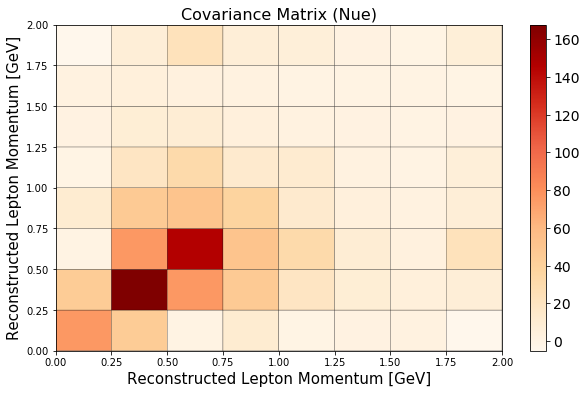

In [38]:
fig = plt.figure(figsize=(10, 6))

plt.pcolor(bins, bins, total_nue_cov, cmap='OrRd', edgecolors='k')

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)
#if pot: 
#    cbar.set_label(label="$\\nu^{2}$ / "+pot+"$^{2}$", fontsize=15)

plt.xlim(bins[0], bins[-1])
plt.ylim(bins[0], bins[-1])


plt.xlabel("Reconstructed Lepton Momentum [GeV]", fontsize=15)
plt.ylabel("Reconstructed Lepton Momentum [GeV]", fontsize=15)

plt.title('Covariance Matrix (Nue)', fontsize=16)


plt.savefig("Nue_Full_Reco_Cov_LeptonMom_"+ending+".svg", bbox_inches='tight')

plt.show()

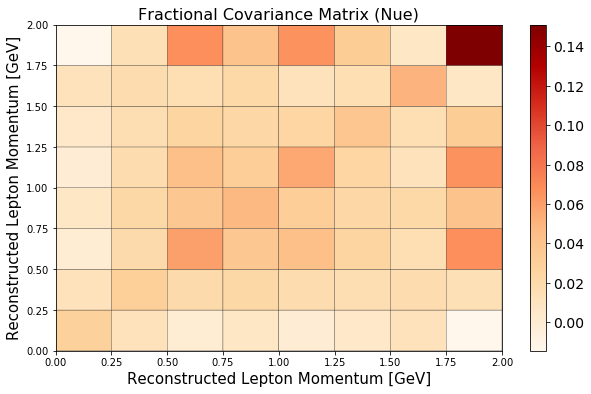

In [39]:
fig = plt.figure(figsize=(10, 6))

plt.pcolor(bins, bins, total_nue_frac_cov, cmap='OrRd', edgecolors='k')

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)

plt.xlim(bins[0], bins[-1])
plt.ylim(bins[0], bins[-1])


plt.xlabel("Reconstructed Lepton Momentum [GeV]", fontsize=15)
plt.ylabel("Reconstructed Lepton Momentum [GeV]", fontsize=15)

plt.title('Fractional Covariance Matrix (Nue)', fontsize=16)

plt.savefig("Nue_Full_Reco_FracCov_LeptonMom_"+ending+".svg", bbox_inches='tight')

plt.show()

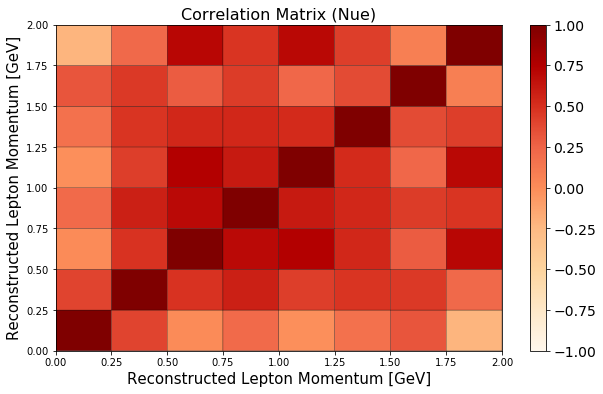

In [40]:
fig = plt.figure(figsize=(10, 6))

plt.pcolor(bins, bins, total_nue_cor, cmap='OrRd', edgecolors='k', vmin = -1, vmax=1)

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)


plt.xlim(bins[0], bins[-1])
plt.ylim(bins[0], bins[-1])

plt.xlabel("Reconstructed Lepton Momentum [GeV]", fontsize=15)
plt.ylabel("Reconstructed Lepton Momentum [GeV]", fontsize=15)

plt.title('Correlation Matrix (Nue)', fontsize=16)

plt.savefig("Nue_Full_Reco_Cor_LeptonMom_"+ending+".svg", bbox_inches='tight')

plt.show()

In [41]:
#print(total_nue_cov)
if isRun3 == False and isCombined == False:
    np.savetxt("nue_full_500_catsel_nopions_leptonMom_usingSelection_data_covmat_recoCut_"+ending+".csv", 
               total_nue_cov,
               delimiter =", ", 
               fmt ='% s')
elif isRun3 == True and isCombined == False:
    np.savetxt("nue_full_500_catsel_nopions_leptonMom_usingSelection_data_covmat_recoCut_run3_"+ending+".csv", 
               total_nue_cov,
               delimiter =", ", 
               fmt ='% s') 
elif isCombined == True:
    np.savetxt("nue_full_500_catsel_nopions_leptonMom_usingSelection_data_covmat_recoCut_comb_"+ending+".csv", 
               total_nue_cov,
               delimiter =", ", 
               fmt ='% s')     


In [42]:
if (addNuWro == False):
    total_numu_cov = numu_cov + numu_cov_mc_stat + numu_cov_mc_detsys
elif (addNuWro == True):
    total_numu_cov = numu_cov + numu_cov_mc_stat + numu_cov_mc_detsys + numu_cov_nuwro

#total_numu_cov_frac = total_numu_cov / (n_numu_tot_allsel**2)
#################################

total_numu_frac_cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]

for i in range(len(bins)-1): 

    for j in range(len(bins)-1): 

        c = total_numu_cov[i][j]
        
        if n_numu_tot_allsel[i]*n_numu_tot_allsel[j] != 0:
            total_numu_frac_cov[i][j] = c/(n_numu_tot_allsel[i]*n_numu_tot_allsel[j])
            
print(total_numu_frac_cov)


print(n_numu_tot_allsel**2)
print("")
print(np.diag(numu_cov))
print("")
print(np.diag(total_numu_cov))
print("")
print(np.diag(total_numu_frac_cov))

##########################################
bins = np.arange(0, 2.25, 0.25)
total_numu_cor = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
for i in range(len(total_numu_cov)): 
        for j in range(len(total_numu_cov[i])): 
            
            if np.sqrt(total_numu_cov[i][i])*np.sqrt(total_numu_cov[j][j]) != 0: 
                total_numu_cor[i][j] = total_numu_cov[i][j] / (np.sqrt(total_numu_cov[i][i])*np.sqrt(total_numu_cov[j][j]))
                
print("")
print(total_numu_cor)

[[0.0989294376293953, 0.01792195324323698, 0.015352855117519623, 0.04317601040235365, 0.019189698608594333, 0.010219256952646697, 0.024748901395179088, -0.03182143684741614], [0.01792195324323698, 0.07845218951839632, 0.026668079795919477, 0.02568597120954077, 0.019709452352724303, 0.021277702411977812, 0.05476828431061946, 0.026116939202698846], [0.015352855117519623, 0.026668079795919477, 0.10066898460812113, 0.032094884468383544, 0.026129381208884587, 0.03635566353997623, 0.10634405243873701, 0.044903279922757194], [0.04317601040235365, 0.02568597120954077, 0.032094884468383544, 0.11662723421926066, 0.027870520170185306, 0.024285552853145095, 0.08144569533021984, -0.01234873542867825], [0.019189698608594333, 0.019709452352724303, 0.026129381208884587, 0.027870520170185306, 0.08501384838075433, 0.02288516092984922, 0.05333706246726454, 0.01883112105067442], [0.010219256952646697, 0.021277702411977812, 0.03635566353997623, 0.024285552853145095, 0.02288516092984922, 0.1128303890908494,

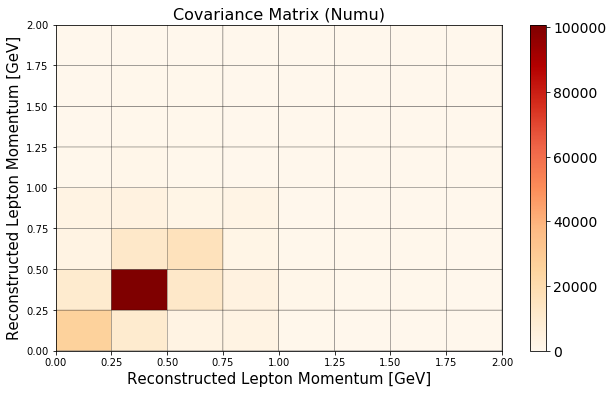

In [43]:
fig = plt.figure(figsize=(10, 6))

plt.pcolor(bins, bins, total_numu_cov, cmap='OrRd', edgecolors='k')

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)

plt.xlim(bins[0], bins[-1])
plt.ylim(bins[0], bins[-1])

plt.xlabel("Reconstructed Lepton Momentum [GeV]", fontsize=15)
plt.ylabel("Reconstructed Lepton Momentum [GeV]", fontsize=15)


plt.title('Covariance Matrix (Numu)', fontsize=16)

plt.savefig("Numu_Full_Reco_Cov_leptonMom_"+ending+".svg", bbox_inches='tight')

plt.show()

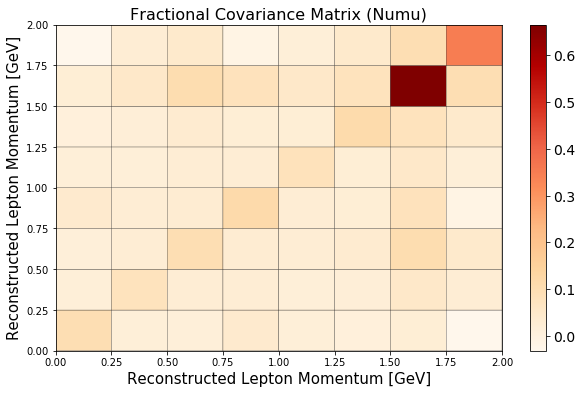

In [44]:
fig = plt.figure(figsize=(10, 6))

plt.pcolor(bins, bins, total_numu_frac_cov, cmap='OrRd', edgecolors='k')

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)

plt.xlim(bins[0], bins[-1])
plt.ylim(bins[0], bins[-1])

plt.xlabel("Reconstructed Lepton Momentum [GeV]", fontsize=15)
plt.ylabel("Reconstructed Lepton Momentum [GeV]", fontsize=15)

plt.title('Fractional Covariance Matrix (Numu)', fontsize=16)

plt.savefig("Numu_Full_Reco_FracCov_leptonMom_"+ending+".svg", bbox_inches='tight')

plt.show()

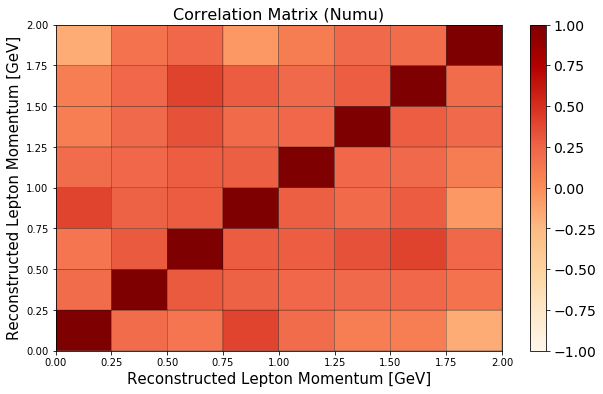

In [45]:
fig = plt.figure(figsize=(10, 6))

plt.pcolor(bins, bins, total_numu_cor, cmap='OrRd', edgecolors='k', vmin = -1, vmax = 1)

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)


plt.xlim(bins[0], bins[-1])
plt.ylim(bins[0], bins[-1])

plt.xlabel("Reconstructed Lepton Momentum [GeV]", fontsize=15)
plt.ylabel("Reconstructed Lepton Momentum [GeV]", fontsize=15)

plt.title('Correlation Matrix (Numu)', fontsize=16)

plt.savefig("Numu_Full_Reco_Cor_leptonMom_"+ending+".svg", bbox_inches='tight')

plt.show()

In [46]:
if isRun3 == False and isCombined == False:
    np.savetxt("numu_full_500_catsel_nopions_leptonMom_usingSelection_data_covmat_recoCut_"+ending+".csv", 
               total_numu_cov,
               delimiter =", ", 
               fmt ='% s')
elif isRun3 == True and isCombined == False:
    np.savetxt("numu_full_500_catsel_nopions_leptonMom_usingSelection_data_covmat_recoCut_run3_"+ending+".csv", 
               total_numu_cov,
               delimiter =", ", 
               fmt ='% s') 
elif isCombined == True:
    np.savetxt("numu_full_500_catsel_nopions_leptonMom_usingSelection_data_covmat_recoCut_comb_"+ending+".csv", 
               total_numu_cov,
               delimiter =", ", 
               fmt ='% s')     


In [47]:
print(n_nue_tot)

[22.19439673 53.74003918 36.18860506 20.55350832  9.67411009  4.75723072
  3.04157219  4.36318348]


In [48]:
nue_exp_err = np.sqrt( np.diag((nue_cov + nue_cov_mc_stat + nue_cov_mc_detsys)))
nue_exp_err_frac_sys = np.sqrt( np.diag((nue_cov)))/ n_nue_tot_allsel
#print("nue_exp_err_frac_sys ", nue_exp_err_frac_sys)
nue_exp_err_frac_stat = np.sqrt( np.diag((nue_cov_mc_stat)))/ n_nue_tot_allsel
#print("nue_exp_err_frac_stat ", nue_exp_err_frac_stat)
nue_exp_err_frac_detsys = np.sqrt( np.diag((nue_cov_mc_detsys)))/ n_nue_tot_allsel
#print("nue_exp_err_frac_detsys ", nue_exp_err_frac_detsys)

#print("")
#print("")

numu_exp_err = np.sqrt( np.diag((numu_cov + numu_cov_mc_stat + numu_cov_mc_detsys)))
numu_exp_err_frac_sys = np.sqrt( np.diag((numu_cov)))/ n_numu_tot_allsel
#print("numu_exp_err_frac_sys ", numu_exp_err_frac_sys)
numu_exp_err_frac_stat = np.sqrt( np.diag((numu_cov_mc_stat)))/ n_numu_tot_allsel
#print("numu_exp_err_frac_stat ", numu_exp_err_frac_stat)
numu_exp_err_frac_detsys = np.sqrt( np.diag((numu_cov_mc_detsys)))/ n_numu_tot_allsel
#print("numu_exp_err_frac_detsys ", numu_exp_err_frac_detsys)

print("")
print("")
print("nue_exp_err ", nue_exp_err)
print("")
nue_frac_err = np.nan_to_num(nue_exp_err / n_nue_tot_allsel)                   #includes all errors
print("nue_frac_err ",nue_frac_err)
print("#########################################################")
print("numu_exp_err ", numu_exp_err)
numu_frac_err = numu_exp_err / n_numu_tot_allsel
print("")
print("numu_frac_err ", numu_frac_err)



nue_exp_err  [ 7.83786051 12.94841742  9.36653623  5.85086666  2.67733965  1.35143357
  0.93838872  1.4850949 ]

nue_frac_err  [0.15572547 0.17651667 0.18886746 0.20977718 0.18238815 0.18772221
 0.22311058 0.21008974]
#########################################################
numu_exp_err  [142.25122384 317.26466731 125.80846626  47.8276744   16.24908109
   8.29153649   7.24884219   1.50028677]

numu_frac_err  [0.27757057 0.27991517 0.31157402 0.32050754 0.29149635 0.32962936
 0.80020684 0.48124295]


### Plots

In [49]:
nue_bin_edges = np.arange(0, 2.25, 0.25)
nue_bincenters = 0.5 * (nue_bin_edges[1:] + nue_bin_edges[:-1])
nue_bin_size = [(nue_bin_edges[i + 1] - nue_bin_edges[i]) / 2
            for i in range(len(nue_bin_edges) - 1)]

nue_frac_err = np.nan_to_num(nue_exp_err / n_nue_tot_allsel)
print(nue_frac_err)

nue_allsel_ax1.bar(nue_bincenters, nue_exp_err*2,width=[n*2 for n in nue_bin_size],facecolor='tab:green',alpha=0.2,bottom=(n_nue_tot_allsel-nue_exp_err))

[0.15572547 0.17651667 0.18886746 0.20977718 0.18238815 0.18772221
 0.22311058 0.21008974]


<BarContainer object of 8 artists>

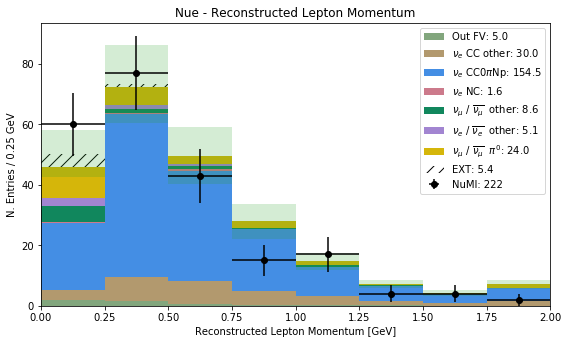

In [50]:
nue_allsel_fig

In [51]:
if isRun3 == False and isCombined == False:
    nue_allsel_fig.savefig("batch_nue_fig_full_500_catsel_nopions_leptonMom_"+ending+".pdf")
elif isRun3 == True and isCombined == False:
    nue_allsel_fig.savefig("batch_nue_fig_full_500_catsel_nopions_leptonMom_run3_"+ending+".pdf")  
elif isCombined == True:
    nue_allsel_fig.savefig("batch_nue_fig_full_500_catsel_nopions_leptonMom_comb_complete_"+ending+".svg", bbox_inches='tight')

In [52]:
numu_bin_edges = np.arange(0, 2.25, 0.25)
numu_bincenters = 0.5 * (numu_bin_edges[1:] + numu_bin_edges[:-1])
numu_bin_size = [(numu_bin_edges[i + 1] - numu_bin_edges[i]) / 2
            for i in range(len(numu_bin_edges) - 1)]

numu_frac_err = numu_exp_err / n_numu_tot_allsel
print(numu_frac_err)

numu_allsel_ax1.bar(numu_bincenters, numu_exp_err*2,width=[n*2 for n in numu_bin_size],facecolor='tab:green',alpha=0.2,bottom=(n_numu_tot_allsel-numu_exp_err))

[0.27757057 0.27991517 0.31157402 0.32050754 0.29149635 0.32962936
 0.80020684 0.48124295]


<BarContainer object of 8 artists>

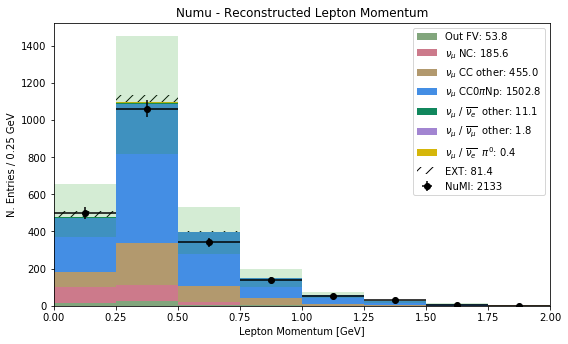

In [53]:
numu_allsel_fig

In [54]:
if isRun3 == False and isCombined == False:
    numu_allsel_fig.savefig("batch_numu_fig_full_500_catsel_nopions_leptonMom_"+ending+".pdf")
elif isRun3 == True and isCombined == False:
    numu_allsel_fig.savefig("batch_numu_fig_full_500_catsel_nopions_leptonMom_run3_"+ending+".pdf")  
elif isCombined == True:
    numu_allsel_fig.savefig("batch_numu_fig_full_500_catsel_nopions_leptonMom_comb_complete_"+ending+".svg", bbox_inches='tight')

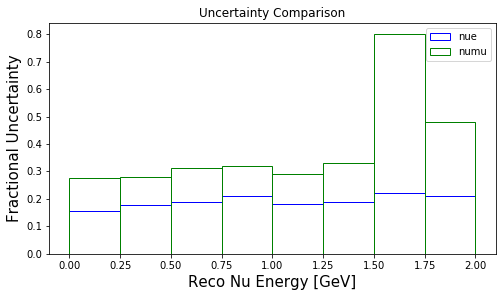

In [55]:
errors_fig = plt.figure(figsize=(8, 7))
errors_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
errors_ax1 = plt.subplot(errors_gs[0])


bins = np.arange(0, 2.25, 0.25)
count = [0.1, 0.35, 0.6, 0.95, 1.1, 1.35, 1.6, 1.95]



sel_nue = errors_ax1.hist(count, bins, edgecolor='blue', facecolor='None', weights=nue_frac_err, label='nue')
sel_numu = errors_ax1.hist(count, bins, edgecolor='green', facecolor='None', weights=numu_frac_err, label='numu')
#sel_ratio = errors_ax1.hist(count, bins, edgecolor='red', facecolor='None', weights=ratio_frac_err, label='ratio')
errors_ax1.set_ylabel('Fractional Uncertainty', fontsize=15)
errors_ax1.set_xlabel('Reco Nu Energy [GeV]', fontsize=15)
errors_ax1.set_title("Uncertainty Comparison")
leg = errors_ax1.legend()
#errors_ax1.set_xlim([0, 5])

## For Blockwise Unfolding

Data (MC) Values

In [56]:
print("n_nue_tot", n_nue_tot)

n_nue_tot [22.19439673 53.74003918 36.18860506 20.55350832  9.67411009  4.75723072
  3.04157219  4.36318348]


In [57]:
print("n_numu_tot", n_numu_tot)

n_numu_tot [288.93520783 748.26775523 288.72548835 106.55908935  43.18713404
  18.45264539   7.53184448   1.11345134]


In [58]:
nue_numu_tot = np.concatenate((n_nue_tot, n_numu_tot), axis=0)

print(nue_numu_tot)
print(len(nue_numu_tot))


[ 22.19439673  53.74003918  36.18860506  20.55350832   9.67411009
   4.75723072   3.04157219   4.36318348 288.93520783 748.26775523
 288.72548835 106.55908935  43.18713404  18.45264539   7.53184448
   1.11345134]
16


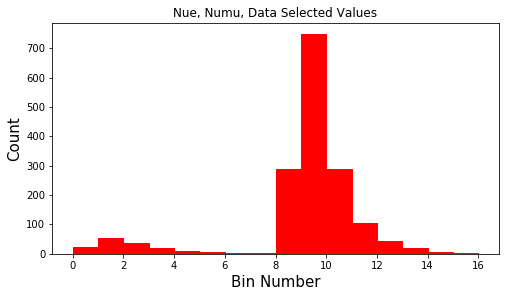

In [59]:
nue_numu_fig = plt.figure(figsize=(8, 7))
nue_numu_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
nue_numu_ax1 = plt.subplot(nue_numu_gs[0])


bins = np.arange(0, 17, 1)
count = np.arange(0.0, 16.0, 1)


sel_ratio = nue_numu_ax1.hist(count, bins, edgecolor='red', facecolor='red', weights=nue_numu_tot)
nue_numu_ax1.set_ylabel('Count', fontsize=15)
nue_numu_ax1.set_xlabel('Bin Number', fontsize=15)
nue_numu_ax1.set_title("Nue, Numu, Data Selected Values")
#leg = nue_numu_ax1.legend()
#nue_numu_ax1.set_ylim([0, 1])

nue_numu_fig.savefig("data_signal_MC_input_leptonMom_comb_"+ending+".svg", bbox_inches='tight')

In [60]:
if isRun3 == False and isCombined == False:
    np.savetxt("nue_full_500_catsel_nopions_leptonMom_usingSelection_data_signal_MCONLY_blockwise_recoCut_"+ending+".csv", 
               nue_numu_tot,
               delimiter =", ", 
               fmt ='% s')
elif isRun3 == True and isCombined == False:
    np.savetxt("nue_full_500_catsel_nopions_leptonMom_usingSelection_data_signal_MCONLY_blockwise_recoCut_run3_"+ending+".csv", 
               nue_numu_tot,
               delimiter =", ", 
               fmt ='% s')
elif isCombined == True:
    np.savetxt("nue_full_500_catsel_nopions_leptonMom_usingSelection_data_signal_MCONLY_blockwise_recoCut_comb_"+ending+".csv", 
               nue_numu_tot,
               delimiter =", ", 
               fmt ='% s')  

Systematics

In [61]:
isRun3 = False

#to use both Run1 and Run3
isCombined = True

ending = "Jan19"

In [62]:
if isCombined == False and isRun3 == False:
    nue_nue_ppfx_detvar_dict = pd.read_csv("nue_nue_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_"+ending+".csv")

    nue_nue_ppfx_detvar_dict.pop("Unnamed: 0")

    nue_nue_ppfx_detvar_dict = nue_nue_ppfx_detvar_dict.to_dict('series')

    #------------

    nue_nue_genie_detvar_dict = pd.read_csv("nue_nue_syserss_df_genie_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_"+ending+".csv")

    nue_nue_genie_detvar_dict.pop("Unnamed: 0")

    nue_nue_genie_detvar_dict = nue_nue_genie_detvar_dict.to_dict('series')

    #------------

    nue_nue_reint_detvar_dict = pd.read_csv("nue_nue_syserss_df_reint_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_"+ending+".csv")

    nue_nue_reint_detvar_dict.pop("Unnamed: 0")

    nue_nue_reint_detvar_dict = nue_nue_reint_detvar_dict.to_dict('series')

    #------------

    nue_nue_geo_detvar_dict = pd.read_csv("nue_nue_syserss_df_geo_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_"+ending+".csv")

    nue_nue_geo_detvar_dict.pop("Unnamed: 0")

    nue_nue_geo_detvar_dict = nue_nue_geo_detvar_dict.to_dict('series')

    #####################################################################################

    nue_mc_ppfx_detvar_dict = pd.read_csv("nue_mc_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_"+ending+".csv")

    nue_mc_ppfx_detvar_dict.pop("Unnamed: 0")

    nue_mc_ppfx_detvar_dict = nue_mc_ppfx_detvar_dict.to_dict('series')

    #---------------

    nue_mc_genie_detvar_dict = pd.read_csv("nue_mc_syserss_df_genie_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_"+ending+".csv")

    nue_mc_genie_detvar_dict.pop("Unnamed: 0")

    nue_mc_genie_detvar_dict = nue_mc_genie_detvar_dict.to_dict('series')

    #---------------

    nue_mc_reint_detvar_dict = pd.read_csv("nue_mc_syserss_df_reint_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_"+ending+".csv")

    nue_mc_reint_detvar_dict.pop("Unnamed: 0")

    nue_mc_reint_detvar_dict = nue_mc_reint_detvar_dict.to_dict('series')

    #---------------

    nue_mc_geo_detvar_dict = pd.read_csv("nue_mc_syserss_df_geo_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_"+ending+".csv")

    nue_mc_geo_detvar_dict.pop("Unnamed: 0")

    nue_mc_geo_detvar_dict = nue_mc_geo_detvar_dict.to_dict('series')

    #####################################################################################

    nue_dirt_ppfx_detvar_dict = pd.read_csv("nue_dirt_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_"+ending+".csv")

    nue_dirt_ppfx_detvar_dict.pop("Unnamed: 0")

    nue_dirt_ppfx_detvar_dict = nue_dirt_ppfx_detvar_dict.to_dict('series')

    #---------------

    nue_dirt_genie_detvar_dict = pd.read_csv("nue_dirt_syserss_df_genie_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_"+ending+".csv")

    nue_dirt_genie_detvar_dict.pop("Unnamed: 0")

    nue_dirt_genie_detvar_dict = nue_dirt_genie_detvar_dict.to_dict('series')

    #---------------

    nue_dirt_reint_detvar_dict = pd.read_csv("nue_dirt_syserss_df_reint_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_"+ending+".csv")

    nue_dirt_reint_detvar_dict.pop("Unnamed: 0")

    nue_dirt_reint_detvar_dict = nue_dirt_reint_detvar_dict.to_dict('series')

    #---------------

    nue_dirt_geo_detvar_dict = pd.read_csv("nue_dirt_syserss_df_geo_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_"+ending+".csv")

    nue_dirt_geo_detvar_dict.pop("Unnamed: 0")

    nue_dirt_geo_detvar_dict = nue_dirt_geo_detvar_dict.to_dict('series')

if isCombined == True:
    nue_nue_ppfx_detvar_dict = pd.read_csv("nue_nue_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_"+ending+".csv")

    nue_nue_ppfx_detvar_dict.pop("Unnamed: 0")

    nue_nue_ppfx_detvar_dict_run1 = nue_nue_ppfx_detvar_dict.to_dict('series')

    #------------

    nue_nue_genie_detvar_dict = pd.read_csv("nue_nue_syserss_df_genie_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_"+ending+".csv")

    nue_nue_genie_detvar_dict.pop("Unnamed: 0")

    nue_nue_genie_detvar_dict_run1 = nue_nue_genie_detvar_dict.to_dict('series')

    #------------

    nue_nue_reint_detvar_dict = pd.read_csv("nue_nue_syserss_df_reint_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_"+ending+".csv")

    nue_nue_reint_detvar_dict.pop("Unnamed: 0")

    nue_nue_reint_detvar_dict_run1 = nue_nue_reint_detvar_dict.to_dict('series')

    #------------

    nue_nue_geo_detvar_dict = pd.read_csv("nue_nue_syserss_df_geo_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_"+ending+".csv")

    nue_nue_geo_detvar_dict.pop("Unnamed: 0")

    nue_nue_geo_detvar_dict_run1 = nue_nue_geo_detvar_dict.to_dict('series')

    #####################################################################################

    nue_mc_ppfx_detvar_dict = pd.read_csv("nue_mc_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_"+ending+".csv")

    nue_mc_ppfx_detvar_dict.pop("Unnamed: 0")

    nue_mc_ppfx_detvar_dict_run1 = nue_mc_ppfx_detvar_dict.to_dict('series')

    #---------------

    nue_mc_genie_detvar_dict = pd.read_csv("nue_mc_syserss_df_genie_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_"+ending+".csv")

    nue_mc_genie_detvar_dict.pop("Unnamed: 0")

    nue_mc_genie_detvar_dict_run1 = nue_mc_genie_detvar_dict.to_dict('series')

    #---------------

    nue_mc_reint_detvar_dict = pd.read_csv("nue_mc_syserss_df_reint_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_"+ending+".csv")

    nue_mc_reint_detvar_dict.pop("Unnamed: 0")

    nue_mc_reint_detvar_dict_run1 = nue_mc_reint_detvar_dict.to_dict('series')

    #---------------

    nue_mc_geo_detvar_dict = pd.read_csv("nue_mc_syserss_df_geo_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_"+ending+".csv")

    nue_mc_geo_detvar_dict.pop("Unnamed: 0")

    nue_mc_geo_detvar_dict_run1 = nue_mc_geo_detvar_dict.to_dict('series')

    #####################################################################################

    nue_dirt_ppfx_detvar_dict = pd.read_csv("nue_dirt_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_"+ending+".csv")

    nue_dirt_ppfx_detvar_dict.pop("Unnamed: 0")

    nue_dirt_ppfx_detvar_dict_run1 = nue_dirt_ppfx_detvar_dict.to_dict('series')

    #---------------

    nue_dirt_genie_detvar_dict = pd.read_csv("nue_dirt_syserss_df_genie_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_"+ending+".csv")

    nue_dirt_genie_detvar_dict.pop("Unnamed: 0")

    nue_dirt_genie_detvar_dict_run1 = nue_dirt_genie_detvar_dict.to_dict('series')

    #---------------

    nue_dirt_reint_detvar_dict = pd.read_csv("nue_dirt_syserss_df_reint_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_"+ending+".csv")

    nue_dirt_reint_detvar_dict.pop("Unnamed: 0")

    nue_dirt_reint_detvar_dict_run1 = nue_dirt_reint_detvar_dict.to_dict('series')

    #---------------

    nue_dirt_geo_detvar_dict = pd.read_csv("nue_dirt_syserss_df_geo_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_"+ending+".csv")

    nue_dirt_geo_detvar_dict.pop("Unnamed: 0")

    nue_dirt_geo_detvar_dict_run1 = nue_dirt_geo_detvar_dict.to_dict('series')
    
#############################################################################################################
    nue_nue_ppfx_detvar_dict = pd.read_csv("nue_nue_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_run3_"+ending+".csv")

    nue_nue_ppfx_detvar_dict.pop("Unnamed: 0")

    nue_nue_ppfx_detvar_dict_run3 = nue_nue_ppfx_detvar_dict.to_dict('series')

    #------------

    nue_nue_genie_detvar_dict = pd.read_csv("nue_nue_syserss_df_genie_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_run3_"+ending+".csv")

    nue_nue_genie_detvar_dict.pop("Unnamed: 0")

    nue_nue_genie_detvar_dict_run3 = nue_nue_genie_detvar_dict.to_dict('series')

    #------------

    nue_nue_reint_detvar_dict = pd.read_csv("nue_nue_syserss_df_reint_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_run3_"+ending+".csv")

    nue_nue_reint_detvar_dict.pop("Unnamed: 0")

    nue_nue_reint_detvar_dict_run3 = nue_nue_reint_detvar_dict.to_dict('series')

    #------------

    nue_nue_geo_detvar_dict = pd.read_csv("nue_nue_syserss_df_geo_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_run3_"+ending+".csv")

    nue_nue_geo_detvar_dict.pop("Unnamed: 0")

    nue_nue_geo_detvar_dict_run3 = nue_nue_geo_detvar_dict.to_dict('series')

    #####################################################################################

    nue_mc_ppfx_detvar_dict = pd.read_csv("nue_mc_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_run3_"+ending+".csv")

    nue_mc_ppfx_detvar_dict.pop("Unnamed: 0")

    nue_mc_ppfx_detvar_dict_run3 = nue_mc_ppfx_detvar_dict.to_dict('series')

    #---------------

    nue_mc_genie_detvar_dict = pd.read_csv("nue_mc_syserss_df_genie_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_run3_"+ending+".csv")

    nue_mc_genie_detvar_dict.pop("Unnamed: 0")

    nue_mc_genie_detvar_dict_run3 = nue_mc_genie_detvar_dict.to_dict('series')

    #---------------

    nue_mc_reint_detvar_dict = pd.read_csv("nue_mc_syserss_df_reint_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_run3_"+ending+".csv")

    nue_mc_reint_detvar_dict.pop("Unnamed: 0")

    nue_mc_reint_detvar_dict_run3 = nue_mc_reint_detvar_dict.to_dict('series')

    #---------------

    nue_mc_geo_detvar_dict = pd.read_csv("nue_mc_syserss_df_geo_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_run3_"+ending+".csv")

    nue_mc_geo_detvar_dict.pop("Unnamed: 0")

    nue_mc_geo_detvar_dict_run3 = nue_mc_geo_detvar_dict.to_dict('series')

    #####################################################################################

    nue_dirt_ppfx_detvar_dict = pd.read_csv("nue_dirt_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_run3_"+ending+".csv")

    nue_dirt_ppfx_detvar_dict.pop("Unnamed: 0")

    nue_dirt_ppfx_detvar_dict_run3 = nue_dirt_ppfx_detvar_dict.to_dict('series')

    #---------------

    nue_dirt_genie_detvar_dict = pd.read_csv("nue_dirt_syserss_df_genie_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_run3_"+ending+".csv")

    nue_dirt_genie_detvar_dict.pop("Unnamed: 0")

    nue_dirt_genie_detvar_dict_run3 = nue_dirt_genie_detvar_dict.to_dict('series')

    #---------------

    nue_dirt_reint_detvar_dict = pd.read_csv("nue_dirt_syserss_df_reint_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_run3_"+ending+".csv")

    nue_dirt_reint_detvar_dict.pop("Unnamed: 0")

    nue_dirt_reint_detvar_dict_run3 = nue_dirt_reint_detvar_dict.to_dict('series')

    #---------------

    nue_dirt_geo_detvar_dict = pd.read_csv("nue_dirt_syserss_df_geo_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_run3_"+ending+".csv")

    nue_dirt_geo_detvar_dict.pop("Unnamed: 0")

    nue_dirt_geo_detvar_dict_run3 = nue_dirt_geo_detvar_dict.to_dict('series')

In [63]:
if isCombined == False and isRun3 == False:
    numu_mc_ppfx_detvar_dict = pd.read_csv("numu_mc_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_"+ending+".csv")

    numu_mc_ppfx_detvar_dict.pop("Unnamed: 0")

    numu_mc_ppfx_detvar_dict = numu_mc_ppfx_detvar_dict.to_dict('series')

    #---------------------

    numu_mc_genie_detvar_dict = pd.read_csv("numu_mc_syserss_df_genie_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_"+ending+".csv")

    numu_mc_genie_detvar_dict.pop("Unnamed: 0")

    numu_mc_genie_detvar_dict = numu_mc_genie_detvar_dict.to_dict('series')

    #---------------------

    numu_mc_reint_detvar_dict = pd.read_csv("numu_mc_syserss_df_reint_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_"+ending+".csv")

    numu_mc_reint_detvar_dict.pop("Unnamed: 0")

    numu_mc_reint_detvar_dict = numu_mc_reint_detvar_dict.to_dict('series')

    #---------------------

    numu_mc_geo_detvar_dict = pd.read_csv("numu_mc_syserss_df_geo_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_"+ending+".csv")

    numu_mc_geo_detvar_dict.pop("Unnamed: 0")

    numu_mc_geo_detvar_dict = numu_mc_geo_detvar_dict.to_dict('series')

    #####################################################################################

    numu_dirt_ppfx_detvar_dict = pd.read_csv("numu_dirt_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_"+ending+".csv")

    numu_dirt_ppfx_detvar_dict.pop("Unnamed: 0")

    numu_dirt_ppfx_detvar_dict = numu_dirt_ppfx_detvar_dict.to_dict('series')

    #---------------------

    numu_dirt_genie_detvar_dict = pd.read_csv("numu_dirt_syserss_df_genie_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_"+ending+".csv")

    numu_dirt_genie_detvar_dict.pop("Unnamed: 0")

    numu_dirt_genie_detvar_dict = numu_dirt_genie_detvar_dict.to_dict('series')

    #---------------------

    numu_dirt_reint_detvar_dict = pd.read_csv("numu_dirt_syserss_df_reint_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_"+ending+".csv")

    numu_dirt_reint_detvar_dict.pop("Unnamed: 0")

    numu_dirt_reint_detvar_dict = numu_dirt_reint_detvar_dict.to_dict('series')

    #---------------------

    numu_dirt_geo_detvar_dict = pd.read_csv("numu_dirt_syserss_df_geo_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_"+ending+".csv")

    numu_dirt_geo_detvar_dict.pop("Unnamed: 0")

    numu_dirt_geo_detvar_dict = numu_dirt_geo_detvar_dict.to_dict('series')
    
    #####################################################################################

    numu_nue_ppfx_detvar_dict = pd.read_csv("numu_nue_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_"+ending+".csv")

    numu_nue_ppfx_detvar_dict.pop("Unnamed: 0")

    numu_nue_ppfx_detvar_dict = numu_nue_ppfx_detvar_dict.to_dict('series')

    #---------------------

    numu_nue_genie_detvar_dict = pd.read_csv("numu_nue_syserss_df_genie_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_"+ending+".csv")

    numu_nue_genie_detvar_dict.pop("Unnamed: 0")

    numu_nue_genie_detvar_dict = numu_nue_genie_detvar_dict.to_dict('series')

    #---------------------

    numu_nue_reint_detvar_dict = pd.read_csv("numu_nue_syserss_df_reint_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_"+ending+".csv")

    numu_nue_reint_detvar_dict.pop("Unnamed: 0")

    numu_nue_reint_detvar_dict = numu_nue_reint_detvar_dict.to_dict('series')

    #---------------------

    numu_nue_geo_detvar_dict = pd.read_csv("numu_nue_syserss_df_geo_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_"+ending+".csv")

    numu_nue_geo_detvar_dict.pop("Unnamed: 0")

    numu_nue_geo_detvar_dict = numu_nue_geo_detvar_dict.to_dict('series')
    

if isCombined == True:
    numu_mc_ppfx_detvar_dict = pd.read_csv("numu_mc_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_"+ending+".csv")

    numu_mc_ppfx_detvar_dict.pop("Unnamed: 0")

    numu_mc_ppfx_detvar_dict_run1 = numu_mc_ppfx_detvar_dict.to_dict('series')

    #---------------------

    numu_mc_genie_detvar_dict = pd.read_csv("numu_mc_syserss_df_genie_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_"+ending+".csv")

    numu_mc_genie_detvar_dict.pop("Unnamed: 0")

    numu_mc_genie_detvar_dict_run1 = numu_mc_genie_detvar_dict.to_dict('series')

    #---------------------

    numu_mc_reint_detvar_dict = pd.read_csv("numu_mc_syserss_df_reint_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_"+ending+".csv")

    numu_mc_reint_detvar_dict.pop("Unnamed: 0")

    numu_mc_reint_detvar_dict_run1 = numu_mc_reint_detvar_dict.to_dict('series')

    #---------------------

    numu_mc_geo_detvar_dict = pd.read_csv("numu_mc_syserss_df_geo_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_"+ending+".csv")

    numu_mc_geo_detvar_dict.pop("Unnamed: 0")

    numu_mc_geo_detvar_dict_run1 = numu_mc_geo_detvar_dict.to_dict('series')

    #####################################################################################

    numu_dirt_ppfx_detvar_dict = pd.read_csv("numu_dirt_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_"+ending+".csv")

    numu_dirt_ppfx_detvar_dict.pop("Unnamed: 0")

    numu_dirt_ppfx_detvar_dict_run1 = numu_dirt_ppfx_detvar_dict.to_dict('series')

    #---------------------

    numu_dirt_genie_detvar_dict = pd.read_csv("numu_dirt_syserss_df_genie_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_"+ending+".csv")

    numu_dirt_genie_detvar_dict.pop("Unnamed: 0")

    numu_dirt_genie_detvar_dict_run1 = numu_dirt_genie_detvar_dict.to_dict('series')

    #---------------------

    numu_dirt_reint_detvar_dict = pd.read_csv("numu_dirt_syserss_df_reint_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_"+ending+".csv")

    numu_dirt_reint_detvar_dict.pop("Unnamed: 0")

    numu_dirt_reint_detvar_dict_run1 = numu_dirt_reint_detvar_dict.to_dict('series')

    #---------------------

    numu_dirt_geo_detvar_dict = pd.read_csv("numu_dirt_syserss_df_geo_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_"+ending+".csv")

    numu_dirt_geo_detvar_dict.pop("Unnamed: 0")

    numu_dirt_geo_detvar_dict_run1 = numu_dirt_geo_detvar_dict.to_dict('series')
    
    #####################################################################################

    numu_nue_ppfx_detvar_dict = pd.read_csv("numu_nue_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_"+ending+".csv")

    numu_nue_ppfx_detvar_dict.pop("Unnamed: 0")

    numu_nue_ppfx_detvar_dict_run1 = numu_nue_ppfx_detvar_dict.to_dict('series')

    #---------------------

    numu_nue_genie_detvar_dict = pd.read_csv("numu_nue_syserss_df_genie_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_"+ending+".csv")

    numu_nue_genie_detvar_dict.pop("Unnamed: 0")

    numu_nue_genie_detvar_dict_run1 = numu_nue_genie_detvar_dict.to_dict('series')

    #---------------------

    numu_nue_reint_detvar_dict = pd.read_csv("numu_nue_syserss_df_reint_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_"+ending+".csv")

    numu_nue_reint_detvar_dict.pop("Unnamed: 0")

    numu_nue_reint_detvar_dict_run1 = numu_nue_reint_detvar_dict.to_dict('series')

    #---------------------

    numu_nue_geo_detvar_dict = pd.read_csv("numu_nue_syserss_df_geo_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_"+ending+".csv")

    numu_nue_geo_detvar_dict.pop("Unnamed: 0")

    numu_nue_geo_detvar_dict_run1 = numu_nue_geo_detvar_dict.to_dict('series')
    
#################################################################################################################
    numu_mc_ppfx_detvar_dict = pd.read_csv("numu_mc_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_run3_"+ending+".csv")

    numu_mc_ppfx_detvar_dict.pop("Unnamed: 0")

    numu_mc_ppfx_detvar_dict_run3 = numu_mc_ppfx_detvar_dict.to_dict('series')

    #---------------------

    numu_mc_genie_detvar_dict = pd.read_csv("numu_mc_syserss_df_genie_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_run3_"+ending+".csv")

    numu_mc_genie_detvar_dict.pop("Unnamed: 0")

    numu_mc_genie_detvar_dict_run3 = numu_mc_genie_detvar_dict.to_dict('series')

    #---------------------

    numu_mc_reint_detvar_dict = pd.read_csv("numu_mc_syserss_df_reint_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_run3_"+ending+".csv")

    numu_mc_reint_detvar_dict.pop("Unnamed: 0")

    numu_mc_reint_detvar_dict_run3 = numu_mc_reint_detvar_dict.to_dict('series')

    #---------------------

    numu_mc_geo_detvar_dict = pd.read_csv("numu_mc_syserss_df_geo_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_run3_"+ending+".csv")

    numu_mc_geo_detvar_dict.pop("Unnamed: 0")

    numu_mc_geo_detvar_dict_run3 = numu_mc_geo_detvar_dict.to_dict('series')

    #####################################################################################

    numu_dirt_ppfx_detvar_dict = pd.read_csv("numu_dirt_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_run3_"+ending+".csv")

    numu_dirt_ppfx_detvar_dict.pop("Unnamed: 0")

    numu_dirt_ppfx_detvar_dict_run3 = numu_dirt_ppfx_detvar_dict.to_dict('series')

    #---------------------

    numu_dirt_genie_detvar_dict = pd.read_csv("numu_dirt_syserss_df_genie_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_run3_"+ending+".csv")

    numu_dirt_genie_detvar_dict.pop("Unnamed: 0")

    numu_dirt_genie_detvar_dict_run3 = numu_dirt_genie_detvar_dict.to_dict('series')

    #---------------------

    numu_dirt_reint_detvar_dict = pd.read_csv("numu_dirt_syserss_df_reint_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_run3_"+ending+".csv")

    numu_dirt_reint_detvar_dict.pop("Unnamed: 0")

    numu_dirt_reint_detvar_dict_run3 = numu_dirt_reint_detvar_dict.to_dict('series')

    #---------------------

    numu_dirt_geo_detvar_dict = pd.read_csv("numu_dirt_syserss_df_geo_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_run3_"+ending+".csv")

    numu_dirt_geo_detvar_dict.pop("Unnamed: 0")

    numu_dirt_geo_detvar_dict_run3 = numu_dirt_geo_detvar_dict.to_dict('series')
    
    #####################################################################################

    numu_nue_ppfx_detvar_dict = pd.read_csv("numu_nue_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_run3_"+ending+".csv")

    numu_nue_ppfx_detvar_dict.pop("Unnamed: 0")

    numu_nue_ppfx_detvar_dict_run3 = numu_nue_ppfx_detvar_dict.to_dict('series')

    #---------------------

    numu_nue_genie_detvar_dict = pd.read_csv("numu_nue_syserss_df_genie_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_run3_"+ending+".csv")

    numu_nue_genie_detvar_dict.pop("Unnamed: 0")

    numu_nue_genie_detvar_dict_run3 = numu_nue_genie_detvar_dict.to_dict('series')

    #---------------------

    numu_nue_reint_detvar_dict = pd.read_csv("numu_nue_syserss_df_reint_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_run3_"+ending+".csv")

    numu_nue_reint_detvar_dict.pop("Unnamed: 0")

    numu_nue_reint_detvar_dict_run3 = numu_nue_reint_detvar_dict.to_dict('series')

    #---------------------

    numu_nue_geo_detvar_dict = pd.read_csv("numu_nue_syserss_df_geo_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_run3_"+ending+".csv")

    numu_nue_geo_detvar_dict.pop("Unnamed: 0")

    numu_nue_geo_detvar_dict_run3 = numu_nue_geo_detvar_dict.to_dict('series')

In [64]:
if isCombined == False:
    def mergeDictionary(dict_1, dict_2):
        dict_3 = {**dict_1, **dict_2}
        for key, value in dict_3.items():
            if key in dict_1 and key in dict_2:
                    dict_3[key] = value + dict_1[key]
        return dict_3

    def combine_dicts(mydict):
        while len(mydict) > 1:
            i = 0
            dict_3 = mergeDictionary(mydict[i], mydict[i+1]) 
            mydict.pop(0)
            mydict[0] = dict_3
        return mydict

    pup = [nue_nue_genie_detvar_dict, \
          nue_mc_genie_detvar_dict,\
          nue_dirt_genie_detvar_dict, ]
    nue_genie_detvar_dict = combine_dicts(pup)[0]
    
    ###########
    #############


    pup = [numu_mc_genie_detvar_dict, \
          numu_dirt_genie_detvar_dict,  \
          numu_nue_genie_detvar_dict,]
    numu_genie_detvar_dict = combine_dicts(pup)[0]

In [65]:
if isCombined == True:
    def mergeDictionary(dict_1, dict_2):
        dict_3 = {**dict_1, **dict_2}
        for key, value in dict_3.items():
            if key in dict_1 and key in dict_2:
                    dict_3[key] = value + dict_1[key]
        return dict_3

    def combine_dicts(mydict):
        while len(mydict) > 1:
            i = 0
            dict_3 = mergeDictionary(mydict[i], mydict[i+1]) 
            mydict.pop(0)
            mydict[0] = dict_3
        return mydict

    
    pup = [nue_nue_ppfx_detvar_dict_run1, nue_nue_ppfx_detvar_dict_run3, \
          nue_mc_ppfx_detvar_dict_run1, nue_mc_ppfx_detvar_dict_run3, \
          nue_dirt_ppfx_detvar_dict_run1, nue_dirt_ppfx_detvar_dict_run3 ]
    nue_ppfx_detvar_dict = combine_dicts(pup)[0]

    pup = [nue_nue_genie_detvar_dict_run1, nue_nue_genie_detvar_dict_run3 , \
          nue_mc_genie_detvar_dict_run1, nue_mc_genie_detvar_dict_run3, \
          nue_dirt_genie_detvar_dict_run1, nue_dirt_genie_detvar_dict_run3 ]
    nue_genie_detvar_dict = combine_dicts(pup)[0]
    
    pup = [nue_nue_reint_detvar_dict_run1, nue_nue_reint_detvar_dict_run3, \
          nue_mc_reint_detvar_dict_run1, nue_mc_reint_detvar_dict_run3, \
          nue_dirt_reint_detvar_dict_run1, nue_dirt_reint_detvar_dict_run3]
    nue_reint_detvar_dict = combine_dicts(pup)[0]
    
    pup = [nue_nue_geo_detvar_dict_run1, nue_nue_geo_detvar_dict_run3, \
          nue_mc_geo_detvar_dict_run1, nue_mc_geo_detvar_dict_run3, \
          nue_dirt_geo_detvar_dict_run1, nue_dirt_geo_detvar_dict_run3]
    nue_geo_detvar_dict = combine_dicts(pup)[0]
    
    ###########
    #############
    
    pup = [numu_mc_ppfx_detvar_dict_run1, numu_mc_ppfx_detvar_dict_run3, \
          numu_dirt_ppfx_detvar_dict_run1, numu_dirt_ppfx_detvar_dict_run3 , \
          numu_nue_ppfx_detvar_dict_run1, numu_nue_ppfx_detvar_dict_run3]
    numu_ppfx_detvar_dict = combine_dicts(pup)[0]

    pup = [numu_mc_genie_detvar_dict_run1, numu_mc_genie_detvar_dict_run3, \
          numu_dirt_genie_detvar_dict_run1, numu_dirt_genie_detvar_dict_run3, \
          numu_nue_genie_detvar_dict_run1, numu_nue_genie_detvar_dict_run3]
    numu_genie_detvar_dict = combine_dicts(pup)[0]
    
    pup = [numu_mc_reint_detvar_dict_run1, numu_mc_reint_detvar_dict_run3, \
          numu_dirt_reint_detvar_dict_run1, numu_dirt_reint_detvar_dict_run3 , \
          numu_nue_reint_detvar_dict_run1, numu_nue_reint_detvar_dict_run3]
    numu_reint_detvar_dict = combine_dicts(pup)[0]
    
    pup = [numu_mc_geo_detvar_dict_run1, numu_mc_geo_detvar_dict_run3, \
          numu_dirt_geo_detvar_dict_run1, numu_dirt_geo_detvar_dict_run3 , \
          numu_nue_geo_detvar_dict_run1, numu_nue_geo_detvar_dict_run3]
    numu_geo_detvar_dict = combine_dicts(pup)[0]


In [66]:
def calcCov(var, bins, ncv_nu, ncv_total, uni_counts, NUnis, plot=False, save=False, axis_label=None, pot=None, isrun3=False, xticks=None, xhigh=None): 
    
    # ncv nu is the neutrino event rate -- i.e. what gets varied in the systematics 
    # ncv total is the total event rate -- (MC + EXT or estimated signal)
    # when background subtracting these two are the same  
    
    # compute the cov matrix 
    cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
    frac_cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
    cor = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
    
    N = NUnis
    print('contribution = 1/', N)

    #####################################################
    
    for k in range(len(uni_counts)): 
        
        uni = uni_counts[k]
        #print("uni = ", uni)

        for i in range(len(bins)-1): 

            cvi = ncv_nu[i]
            uvi = uni[i]
            #print("uvi = ", uvi)

            for j in range(len(bins)-1): 
                
                cvj = ncv_nu[j]
                uvj = uni[j]
        
                c = ((uvi - cvi)*(uvj - cvj)) / N

                cov[i][j] += c
                
                #print("ncv_total[i]*ncv_total[j] ", ncv_total[i]*ncv_total[j])
                #print(ncv_total[i])
                if ncv_total[i]*ncv_total[j] != 0: 
                    frac_cov[i][j] += c/(ncv_total[i]*ncv_total[j])
                    #frac_cov[i][j] = c/(ncv_total[i]*ncv_total[j])
            
    #####################################################
    
    if plot: 
        fig = plt.figure(figsize=(10, 6))
        
        plt.pcolor(bins, bins, cov, cmap='OrRd', edgecolors='k')
            
        cbar = plt.colorbar()
        cbar.ax.tick_params(labelsize=14)
        if pot: 
            cbar.set_label(label="$\\nu^{2}$ / "+pot+"$^{2}$", fontsize=15)
        
        plt.xticks(xticks, fontsize=13)
        plt.yticks(xticks,fontsize=13)
        
        if xhigh: 
            plt.xlim(bins[0], xhigh)
            plt.ylim(bins[0], xhigh)
            
        else: 
            plt.xlim(bins[0], bins[-1])
            plt.ylim(bins[0], bins[-1])

        if axis_label is not None: 
            plt.xlabel(axis_label, fontsize=15)
            plt.ylabel(axis_label, fontsize=15)
        else: 
            plt.xlabel(var, fontsize=15)
            plt.ylabel(var, fontsize=15)

        plt.title('Covariance Matrix', fontsize=16)
        
        if save: 
            plt.savefig(save+var+"_cov.pdf", transparent=True, bbox_inches='tight') 
            print('saving to: '+save)
        plt.show()
        
        ##################################
        # fractional covariance 
        fig = plt.figure(figsize=(10, 6))
        
        plt.pcolor(bins, bins, frac_cov, cmap='OrRd', edgecolors='k')#, vmin=0, vmax=.03)
            
        cbar = plt.colorbar()
        cbar.ax.tick_params(labelsize=14)
        
        
        if pot: 
            cbar.set_label(label="$\\nu^{2}$ / "+pot+"$^{2}$", fontsize=15)

        if axis_label is not None: 
            plt.xlabel(axis_label, fontsize=15)
            plt.ylabel(axis_label, fontsize=15)
        else: 
            plt.xlabel(var, fontsize=15)
            plt.ylabel(var, fontsize=15)
            
        plt.xticks(xticks, fontsize=13)
        plt.yticks(xticks,fontsize=13)
        
        if xhigh: 
            plt.xlim(bins[0], xhigh)
            plt.ylim(bins[0], xhigh)
            
        else: 
            plt.xlim(bins[0], bins[-1])
            plt.ylim(bins[0], bins[-1])

        plt.title('Fractional Covariance Matrix', fontsize=16)
        
        if save: 
            plt.savefig(save+var+"_frac_cov.pdf", transparent=True, bbox_inches='tight') 
        plt.show()
        
    #####################################################    
    # compute the corr matrix 

    for i in range(len(cov)): 
        for j in range(len(cov[i])): 
            
            #print(i, j, cov[i][j], cov[i][i], cov[j][j])

            if np.sqrt(cov[i][i])*np.sqrt(cov[j][j]) != 0: 
                cor[i][j] = cov[i][j] / (np.sqrt(cov[i][i])*np.sqrt(cov[j][j]))
            
            #print(cor[i][j])
    
    #####################################################
    
    if plot: 
        fig = plt.figure(figsize=(10, 6))

        plt.pcolor(bins, bins, cor, cmap='OrRd', edgecolors='k', vmin=-1, vmax=1)
        cbar = plt.colorbar()
        cbar.ax.tick_params(labelsize=14)
    

        if axis_label is not None: 
            plt.xlabel(axis_label, fontsize=15)
            plt.ylabel(axis_label, fontsize=15)
        else: 
            plt.xlabel(var, fontsize=15)
            plt.ylabel(var, fontsize=15)
            
        plt.xticks(xticks, fontsize=13)
        plt.yticks(xticks,fontsize=13)
        
        if pot: 
            cbar.set_label(label="$\\nu^{2}$ / "+pot+"$^{2}$", fontsize=15)
        
        if xhigh: 
            plt.xlim(bins[0], xhigh)
            plt.ylim(bins[0], xhigh)
            
        else: 
            plt.xlim(bins[0], bins[-1])
            plt.ylim(bins[0], bins[-1])
            
        plt.title('Correlation Matrix', fontsize=16)
        if save: 
            plt.savefig(save+var+"_cor.pdf", transparent=True, bbox_inches='tight') 
        plt.show()
        
    #####################################################
    
    # sys_err = [np.sqrt(x) for x in np.diagonal(cov)]
    # percent error = [y/z for y,z in zip(sys_err, ncv)] # w.r.t. to whatever event rate is being used (total or background subtracted)
        
    dictionary = {
        'cov' : cov, 
        'frac_cov' : frac_cov, 
        'cor' : cor,
        'fractional_uncertainty' : np.sqrt(np.diag(frac_cov))
    }
           
    return dictionary

MC Dataframe

[0.125 0.375 0.625 0.875 1.125 1.375 1.625 1.875]
[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]
[  45.75422366   72.48508969   49.59317058   27.89086305   14.67935054
    7.19911372    4.20593554    7.06885951  477.22410721 1094.18380648
  398.0840788   148.3546811    55.43477313   25.15411854    9.05871046
    3.11752469]


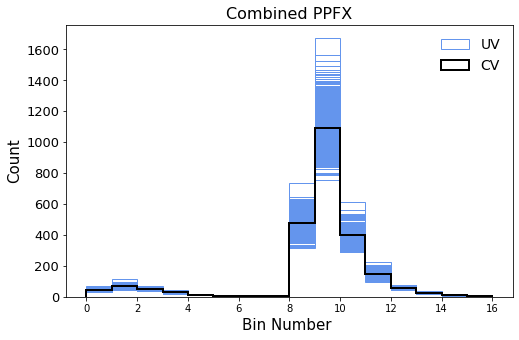

In [67]:
################
####ppfx########
################


import matplotlib.pyplot as plt
import matplotlib

fullvar_dict = {}

n=0
bin_centers = np.arange(0.125, 2.125, 0.25)
bins = np.arange(0, 2.25, 0.25)
print(bin_centers)
print(bins)
bins_full = np.arange(0, 17, 1)
bin_centers_full = np.arange(0.25, 16.25, 1)

fig = plt.figure(figsize=(8, 5)) 

#print(nue_mc_ppfx_detvar_dict)
#print(numu_mc_ppfx_detvar_dict)


for variation in nue_ppfx_detvar_dict.keys(): 

    if variation == 'CV':
        continue

    if n==0:
        nue = plt.hist(bin_centers, bins, histtype='step', weights=nue_ppfx_detvar_dict[variation], 
             linewidth=1, color='white', alpha = 0)
        numu = plt.hist(bin_centers, bins, histtype='step', weights=numu_ppfx_detvar_dict[variation], 
             linewidth=1, color='white', alpha = 0)
        nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
        full = plt.hist(bin_centers_full, bins_full, histtype='step', weights=nue_numu, 
             linewidth=1, color='cornflowerblue', label='UV')
        fullvar_dict[variation] = list(full[0])

    else: 
        nue = plt.hist(bin_centers, bins, histtype='step', weights=nue_ppfx_detvar_dict[variation],
             linewidth=1, color='white', alpha = 0)
        numu = plt.hist(bin_centers, bins, histtype='step', weights=numu_ppfx_detvar_dict[variation],
             linewidth=1, color='white', alpha = 0)
        nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
        full = plt.hist(bin_centers_full, bins_full, histtype='step', weights=nue_numu, 
             linewidth=1, color='cornflowerblue')
        fullvar_dict[variation] = list(full[0])

    n+=1   


nue = plt.hist(bin_centers, bins, histtype='step', 
                 weights=nue_ppfx_detvar_dict['CV'], color='white', alpha = 0) 


numu = plt.hist(bin_centers, bins, histtype='step', 
                 weights=numu_ppfx_detvar_dict['CV'], color='white', alpha = 0)

nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
full = plt.hist(bin_centers_full, bins_full, histtype='step', 
                 weights=nue_numu, color='black', label='CV', linewidth=2)
fullvar_dict["CV"] = list(full[0])
print(full[0])
##########################################

plt.title('Combined PPFX', fontsize=16)

plt.ylabel('Count' , fontsize=15)
plt.xlabel("Bin Number ", fontsize=15)

#plt.xticks(x_ticks, fontsize=13)
plt.yticks(fontsize=13)

plt.legend(frameon=False, fontsize=14)
#plt.ylim((0,25))

fig.savefig("batch_ppfx_mc_combSysErr_leptonMom_comb_"+ending+".svg", bbox_inches='tight')

plt.show()

In [68]:

bins = bins_full
print(bins_full)


detsys_fullvars_ppfx = {}
xvar="Energy"

#print(type(fullvar_dict['CV']))
print(fullvar_dict['CV'])

for variation in fullvar_dict.keys(): 
    
    #print(variation)
    
    if variation=='CV': 
        continue
        
        
    
    detsys_fullvars_ppfx[variation] = calcCov(xvar, bins, 
                                        fullvar_dict['CV'], 
                                        fullvar_dict['CV'], 
                                        [fullvar_dict[variation] ], 500)
    

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
[45.75422366198609, 72.48508968749675, 49.59317058059068, 27.89086305367428, 14.679350544012038, 7.199113720738808, 4.205935541236556, 7.068859506830194, 477.2241072058677, 1094.1838064789772, 398.08407880365826, 148.35468110069633, 55.43477313220501, 25.154118537902832, 9.05871045589447, 3.11752469278872]
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
c

contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contributi

In [69]:
cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
frac_cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
cor = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]

for i in range(len(bins)-1): 
    for j in range(len(bins)-1):
            
        cov[i][j] = sum([detsys_fullvars_ppfx[x]['cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
        frac_cov[i][j] = sum([detsys_fullvars_ppfx[x]['frac_cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
        
# compute the corr matrix 
for i in range(len(cov)): 
    for j in range(len(cov[i])): 

        if np.sqrt(cov[i][i])*np.sqrt(cov[j][j]) != 0: 
            cor[i][j] = cov[i][j] / (np.sqrt(cov[i][i])*np.sqrt(cov[j][j]))

detsys_dict_ppfx = {
    'cov' : cov, 
    'frac_cov' : frac_cov,
    'fractional_uncertainty' : np.sqrt(np.diag(frac_cov)),
    'cor' : cor
} 

<>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/tmp/ipykernel_18467/1474398876.py:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  cov[i][j] = sum([detsys_fullvars_ppfx[x]['cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
/tmp/ipykernel_18467/1474398876.py:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  frac_cov[i][j] = sum([detsys_fullvars_ppfx[x]['frac_cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])


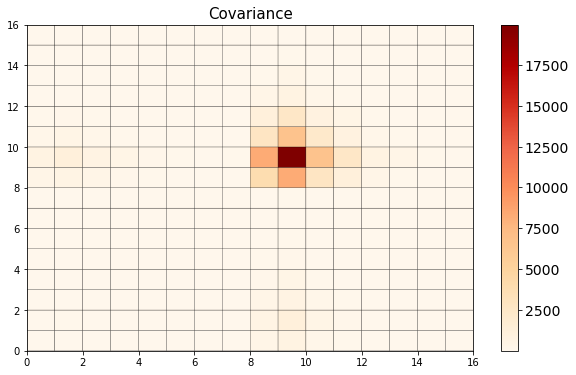

In [70]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, detsys_dict_ppfx['cov'], cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Covariance', fontsize=15)

plt.show()

[0.125 0.375 0.625 0.875 1.125 1.375 1.625 1.875]
[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]
[  45.75422162   72.48508942   49.59316766   27.89086124   14.6793502
    7.19911343    4.20593539    7.0688591   477.22410721 1094.18380648
  398.0840788   148.3546811    55.43477313   25.15411854    9.05871046
    3.11752469]


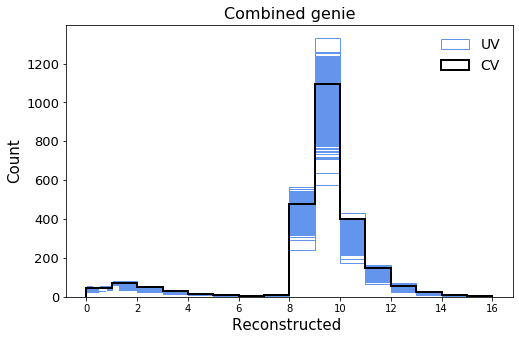

In [71]:
################
####genie########
################


import matplotlib.pyplot as plt
import matplotlib

fullvar_dict = {}

n=0
bin_centers = np.arange(0.125, 2.125, 0.25)
bins = np.arange(0, 2.25, 0.25)
print(bin_centers)
print(bins)
bins_full = np.arange(0, 17, 1)
bin_centers_full = np.arange(0.25, 16.25, 1)

fig = plt.figure(figsize=(8, 5)) 


for variation in nue_genie_detvar_dict.keys(): 

    if variation == 'CV':
        continue

    if n==0: 
        nue = plt.hist(bin_centers, bins, histtype='step', weights=nue_genie_detvar_dict[variation], 
             linewidth=1, color='white')
        numu = plt.hist(bin_centers, bins, histtype='step', weights=numu_genie_detvar_dict[variation], 
             linewidth=1, color='white')
        nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
        full = plt.hist(bin_centers_full, bins_full, histtype='step', weights=nue_numu, 
             linewidth=1, color='cornflowerblue', label='UV')
        fullvar_dict[variation] = list(full[0])

    else: 
        nue = plt.hist(bin_centers, bins, histtype='step', weights=nue_genie_detvar_dict[variation],
             linewidth=1, color='white')
        numu = plt.hist(bin_centers, bins, histtype='step', weights=numu_genie_detvar_dict[variation],
             linewidth=1, color='white')
        nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
        full = plt.hist(bin_centers_full, bins_full, histtype='step', weights=nue_numu, 
             linewidth=1, color='cornflowerblue')
        fullvar_dict[variation] = list(full[0])

    n+=1   


nue = plt.hist(bin_centers, bins, histtype='step', 
                 weights=nue_genie_detvar_dict['CV'], color='white') 


numu = plt.hist(bin_centers, bins, histtype='step', 
                 weights=numu_genie_detvar_dict['CV'], color='white')

nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
full = plt.hist(bin_centers_full, bins_full, histtype='step', 
                 weights=nue_numu, color='black', label='CV', linewidth=2)
fullvar_dict["CV"] = list(full[0])
print(full[0])

##########################################

plt.title('Combined genie', fontsize=16)

plt.ylabel('Count' , fontsize=15)
plt.xlabel("Reconstructed ", fontsize=15)

#plt.xticks(x_ticks, fontsize=13)
plt.yticks(fontsize=13)

plt.legend(frameon=False, fontsize=14)
#plt.ylim((0,25))

plt.show()

In [72]:

bins = bins_full
print(bins_full)


detsys_fullvars_genie = {}
xvar="Energy"

#print(type(fullvar_dict['CV']))
#print(fullvar_dict['CV'])

for variation in fullvar_dict.keys(): 
    
    #print(variation)
    
    if variation=='CV': 
        continue
        
        
    
    detsys_fullvars_genie[variation] = calcCov(xvar, bins, 
                                        fullvar_dict['CV'], 
                                        fullvar_dict['CV'], 
                                        [fullvar_dict[variation]], 500)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
c

In [73]:
cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
frac_cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
cor = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]

for i in range(len(bins)-1): 
    for j in range(len(bins)-1):
            
        cov[i][j] = sum([detsys_fullvars_genie[x]['cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
        frac_cov[i][j] = sum([detsys_fullvars_genie[x]['frac_cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
        
# compute the corr matrix 
for i in range(len(cov)): 
    for j in range(len(cov[i])): 

        if np.sqrt(cov[i][i])*np.sqrt(cov[j][j]) != 0: 
            cor[i][j] = cov[i][j] / (np.sqrt(cov[i][i])*np.sqrt(cov[j][j]))

detsys_dict_genie = {
    'cov' : cov, 
    'frac_cov' : frac_cov,
    'fractional_uncertainty' : np.sqrt(np.diag(frac_cov)),
    'cor' : cor
} 

<>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/tmp/ipykernel_18467/765668181.py:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  cov[i][j] = sum([detsys_fullvars_genie[x]['cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
/tmp/ipykernel_18467/765668181.py:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  frac_cov[i][j] = sum([detsys_fullvars_genie[x]['frac_cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])


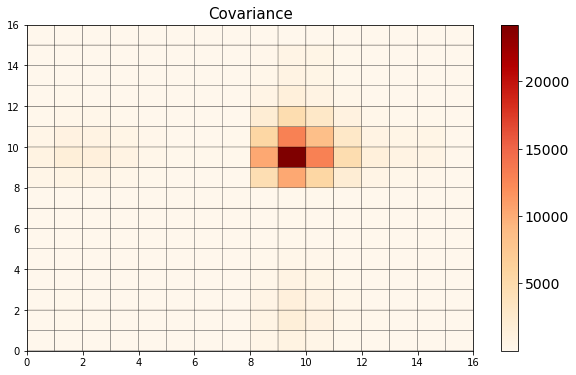

In [74]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, detsys_dict_genie['cov'], cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Covariance', fontsize=15)

plt.show()

[0.125 0.375 0.625 0.875 1.125 1.375 1.625 1.875]
[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]
[  45.75422162   72.48508942   49.59316766   27.89086124   14.6793502
    7.19911343    4.20593539    7.0688591   477.22410721 1094.18380648
  398.0840788   148.3546811    55.43477313   25.15411854    9.05871046
    3.11752469]


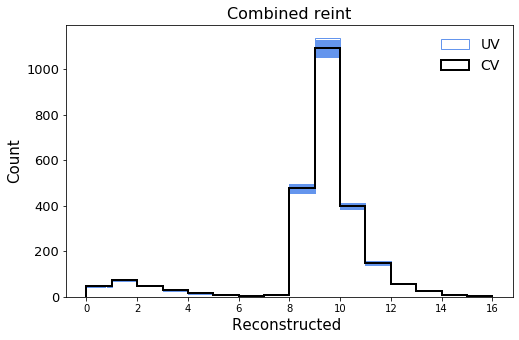

In [75]:
################
####reint########
################


import matplotlib.pyplot as plt
import matplotlib

fullvar_dict = {}

n=0
bin_centers = np.arange(0.125, 2.125, 0.25)
bins = np.arange(0, 2.25, 0.25)
print(bin_centers)
print(bins)
bins_full = np.arange(0, 17, 1)
bin_centers_full = np.arange(0.25, 16.25, 1)

fig = plt.figure(figsize=(8, 5)) 


for variation in nue_reint_detvar_dict.keys(): 

    if variation == 'CV':
        continue

    if n==0: 
        nue = plt.hist(bin_centers, bins, histtype='step', weights=nue_reint_detvar_dict[variation], 
             linewidth=1, color='white')
        numu = plt.hist(bin_centers, bins, histtype='step', weights=numu_reint_detvar_dict[variation], 
             linewidth=1, color='white')
        nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
        full = plt.hist(bin_centers_full, bins_full, histtype='step', weights=nue_numu, 
             linewidth=1, color='cornflowerblue', label='UV')
        fullvar_dict[variation] = list(full[0])

    else: 
        nue = plt.hist(bin_centers, bins, histtype='step', weights=nue_reint_detvar_dict[variation],
             linewidth=1, color='white')
        numu = plt.hist(bin_centers, bins, histtype='step', weights=numu_reint_detvar_dict[variation],
             linewidth=1, color='white')
        nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
        full = plt.hist(bin_centers_full, bins_full, histtype='step', weights=nue_numu, 
             linewidth=1, color='cornflowerblue')
        fullvar_dict[variation] = list(full[0])

    n+=1   


nue = plt.hist(bin_centers, bins, histtype='step', 
                 weights=nue_reint_detvar_dict['CV'], color='white') 


numu = plt.hist(bin_centers, bins, histtype='step', 
                 weights=numu_reint_detvar_dict['CV'], color='white')

nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
full = plt.hist(bin_centers_full, bins_full, histtype='step', 
                 weights=nue_numu, color='black', label='CV', linewidth=2)
fullvar_dict["CV"] = list(full[0])
print(full[0])

##########################################

plt.title('Combined reint', fontsize=16)

plt.ylabel('Count' , fontsize=15)
plt.xlabel("Reconstructed ", fontsize=15)

#plt.xticks(x_ticks, fontsize=13)
plt.yticks(fontsize=13)

plt.legend(frameon=False, fontsize=14)
#plt.ylim((0,25))

plt.show()

In [76]:

bins = bins_full
print(bins_full)


detsys_fullvars_reint = {}
xvar="Energy"

#print(type(fullvar_dict['CV']))
#print(fullvar_dict['CV'])

for variation in fullvar_dict.keys(): 
    
    #print(variation)
    
    if variation=='CV': 
        continue
        
        
    
    detsys_fullvars_reint[variation] = calcCov(xvar, bins, 
                                        fullvar_dict['CV'], 
                                        fullvar_dict['CV'], 
                                        [fullvar_dict[variation] ], 500)
    

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
c

In [77]:
cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
frac_cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
cor = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]

for i in range(len(bins)-1): 
    for j in range(len(bins)-1):
            
        cov[i][j] = sum([detsys_fullvars_reint[x]['cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
        frac_cov[i][j] = sum([detsys_fullvars_reint[x]['frac_cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
        
# compute the corr matrix 
for i in range(len(cov)): 
    for j in range(len(cov[i])): 

        if np.sqrt(cov[i][i])*np.sqrt(cov[j][j]) != 0: 
            cor[i][j] = cov[i][j] / (np.sqrt(cov[i][i])*np.sqrt(cov[j][j]))

detsys_dict_reint = {
    'cov' : cov, 
    'frac_cov' : frac_cov,
    'fractional_uncertainty' : np.sqrt(np.diag(frac_cov)),
    'cor' : cor
} 

<>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/tmp/ipykernel_18467/2904819719.py:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  cov[i][j] = sum([detsys_fullvars_reint[x]['cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
/tmp/ipykernel_18467/2904819719.py:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  frac_cov[i][j] = sum([detsys_fullvars_reint[x]['frac_cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])


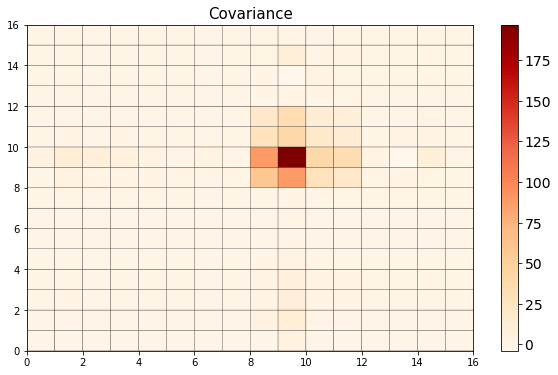

In [78]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, detsys_dict_reint['cov'], cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Covariance', fontsize=15)

plt.show()

[0.125 0.375 0.625 0.875 1.125 1.375 1.625 1.875]
[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]
[  45.75422162   72.48508942   49.59316766   27.89086124   14.6793502
    7.19911343    4.20593539    7.0688591   477.22410721 1094.18380648
  398.0840788   148.3546811    55.43477313   25.15411854    9.05871046
    3.11752469]


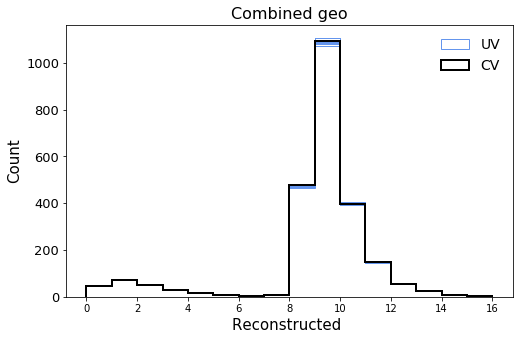

In [79]:
################
####geo########
################


import matplotlib.pyplot as plt
import matplotlib

fullvar_dict = {}

n=0
bin_centers = np.arange(0.125, 2.125, 0.25)
bins = np.arange(0, 2.25, 0.25)
print(bin_centers)
print(bins)
bins_full = np.arange(0, 17, 1)
bin_centers_full = np.arange(0.25, 16.25, 1)

fig = plt.figure(figsize=(8, 5)) 



for variation in nue_geo_detvar_dict.keys(): 

    if variation == 'CV':
        continue

    if n==0: 
        nue = plt.hist(bin_centers, bins, histtype='step', weights=nue_geo_detvar_dict[variation], 
             linewidth=1, color='white')
        numu = plt.hist(bin_centers, bins, histtype='step', weights=numu_geo_detvar_dict[variation], 
             linewidth=1, color='white')
        nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
        full = plt.hist(bin_centers_full, bins_full, histtype='step', weights=nue_numu, 
             linewidth=1, color='cornflowerblue', label='UV')
        fullvar_dict[variation] = list(full[0])

    else: 
        nue = plt.hist(bin_centers, bins, histtype='step', weights=nue_geo_detvar_dict[variation],
             linewidth=1, color='white')
        numu = plt.hist(bin_centers, bins, histtype='step', weights=numu_geo_detvar_dict[variation],
             linewidth=1, color='white')
        nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
        full = plt.hist(bin_centers_full, bins_full, histtype='step', weights=nue_numu, 
             linewidth=1, color='cornflowerblue')
        fullvar_dict[variation] = list(full[0])

    n+=1   


nue = plt.hist(bin_centers, bins, histtype='step', 
                 weights=nue_geo_detvar_dict['CV'], color='white') 


numu = plt.hist(bin_centers, bins, histtype='step', 
                 weights=numu_geo_detvar_dict['CV'], color='white')

nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
full = plt.hist(bin_centers_full, bins_full, histtype='step', 
                 weights=nue_numu, color='black', label='CV', linewidth=2)
fullvar_dict["CV"] = list(full[0])
print(full[0])


##########################################

plt.title('Combined geo', fontsize=16)

plt.ylabel('Count' , fontsize=15)
plt.xlabel("Reconstructed ", fontsize=15)

#plt.xticks(x_ticks, fontsize=13)
plt.yticks(fontsize=13)

plt.legend(frameon=False, fontsize=14)
#plt.ylim((0,25))

plt.show()

In [80]:

bins = bins_full
print(bins_full)


detsys_fullvars_geo = {}
xvar="Energy"

#print(type(fullvar_dict['CV']))
#print(fullvar_dict['CV'])

for variation in fullvar_dict.keys(): 
    
    #print(variation)
    
    if variation=='CV': 
        continue
        
        
    
    detsys_fullvars_geo[variation] = calcCov(xvar, bins, 
                                        fullvar_dict['CV'], 
                                        fullvar_dict['CV'], 
                                        [fullvar_dict[variation] ], 2)
    

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2


In [81]:
cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
frac_cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
cor = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]

for i in range(len(bins)-1): 
    for j in range(len(bins)-1):
            
        cov[i][j] = sum([detsys_fullvars_geo[x]['cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
        frac_cov[i][j] = sum([detsys_fullvars_geo[x]['frac_cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
        
# compute the corr matrix 
for i in range(len(cov)): 
    for j in range(len(cov[i])): 

        if np.sqrt(cov[i][i])*np.sqrt(cov[j][j]) != 0: 
            cor[i][j] = cov[i][j] / (np.sqrt(cov[i][i])*np.sqrt(cov[j][j]))

detsys_dict_geo = {
    'cov' : cov, 
    'frac_cov' : frac_cov,
    'fractional_uncertainty' : np.sqrt(np.diag(frac_cov)),
    'cor' : cor
} 

<>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/tmp/ipykernel_18467/9538487.py:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  cov[i][j] = sum([detsys_fullvars_geo[x]['cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
/tmp/ipykernel_18467/9538487.py:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  frac_cov[i][j] = sum([detsys_fullvars_geo[x]['frac_cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])


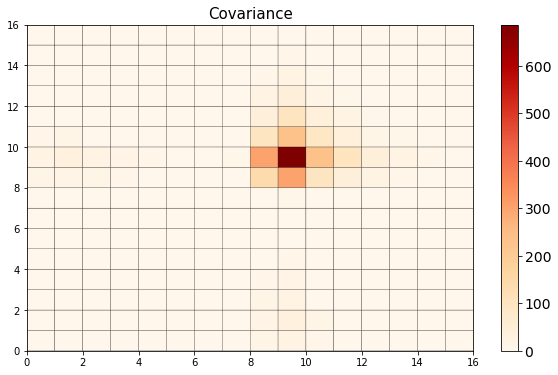

In [82]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, detsys_dict_geo['cov'], cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Covariance', fontsize=15)

plt.show()

##geo will need different CV values for each one

Dirt Dataframe

Nue Dataframe

Now add it all together

In [83]:
blockwise_cov_genie_only = np.array(detsys_dict_genie['cov'])
print(blockwise_cov_genie_only)
#GENIE NOT GEO

#print(detsys_dict_dirt_genie['cov'])

[[3.64878519e+01 5.93711506e+01 4.44128736e+01 2.64639001e+01
  1.20843139e+01 5.76037630e+00 3.87916865e+00 6.13289723e+00
  3.87686977e+02 8.62933209e+02 4.08509391e+02 1.50249311e+02
  4.85751844e+01 2.53417558e+01 1.70989532e+01 2.83590647e+00]
 [5.93711506e+01 1.24910192e+02 1.00211716e+02 6.03679030e+01
  2.49530533e+01 1.09492335e+01 8.66491016e+00 1.28282014e+01
  7.24639837e+02 1.67421803e+03 9.67037537e+02 3.47772615e+02
  1.01546907e+02 6.08779301e+01 4.97378738e+01 4.17252721e+00]
 [4.44128736e+01 1.00211716e+02 8.35260009e+01 5.05295710e+01
  2.02357135e+01 8.55346482e+00 7.18849126e+00 1.04494830e+01
  5.76218700e+02 1.33630618e+03 8.28981476e+02 2.96421002e+02
  8.29405734e+01 5.16500417e+01 4.48816823e+01 3.05046000e+00]
 [2.64639001e+01 6.03679030e+01 5.05295710e+01 3.10570238e+01
  1.22903726e+01 5.21171441e+00 4.38647008e+00 6.34384894e+00
  3.48815046e+02 8.13378554e+02 5.08172536e+02 1.81825840e+02
  5.08107668e+01 3.15249997e+01 2.76336730e+01 1.90574257e+00]
 [1.

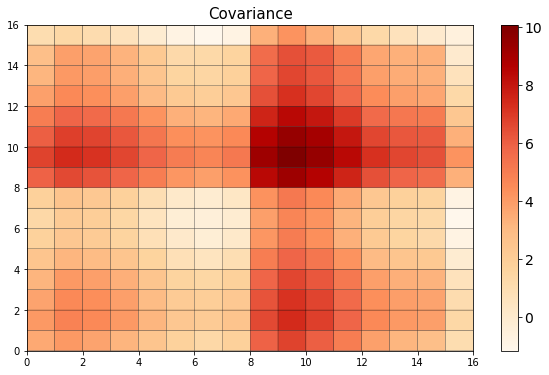

In [84]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, np.log(blockwise_cov_genie_only), cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Covariance', fontsize=15)

plt.show()

In [85]:
if isCombined == False and isRun3 == False:
    np.savetxt("blockwise_cov_genie_only_lepton_"+ending+".csv", 
           blockwise_cov_genie_only,
           delimiter =", ", 
           fmt ='% s')  
elif isCombined == True:
    np.savetxt("blockwise_cov_genie_only_lepton_comb_"+ending+".csv", 
           blockwise_cov_genie_only,
           delimiter =", ", 
           fmt ='% s')  

In [86]:
sys_total_cov = np.array(detsys_dict_ppfx['cov']) + np.array(detsys_dict_genie['cov']) + np.array(detsys_dict_reint['cov']) + np.array(detsys_dict_geo['cov'])

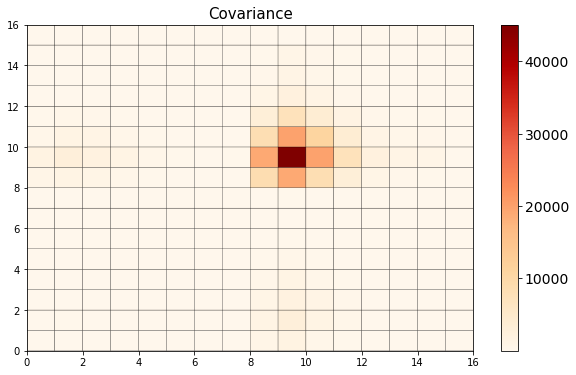

In [87]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, sys_total_cov, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Covariance', fontsize=15)

plt.show()



In [88]:
#nue_cov_mc_stat and numu_cov_mc_stat

nue_stats = np.diag(nue_cov_mc_stat)
numu_stats = np.diag(numu_cov_mc_stat)

nue_numu_stats = np.concatenate((nue_stats, numu_stats), axis=0)

print(nue_numu_stats)

[9.50452406e+00 4.77173538e+00 2.76608518e+00 1.65933837e+00
 8.15680156e-01 3.08068780e-01 1.82276821e-01 4.17816305e-01
 1.90269453e+02 4.44738733e+02 1.98262593e+02 8.44344220e+01
 1.86301925e+01 1.09040880e+01 1.55992210e+01 7.44936188e-01]


In [89]:
nue_numu_cov_stats   = np.zeros([(len(bins)-1), (len(bins)-1)])
print(nue_numu_cov_stats)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [90]:
nue_numu_cov_stats[np.diag_indices_from(nue_numu_cov_stats)]    = nue_numu_stats

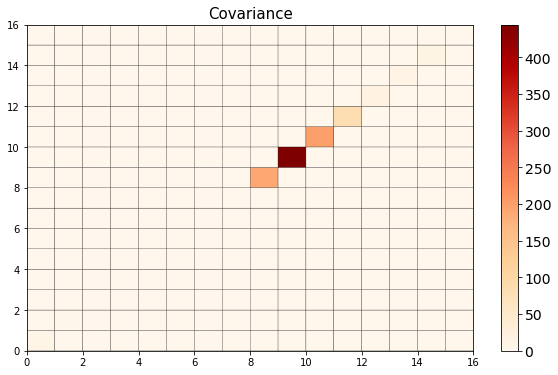

In [91]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, nue_numu_cov_stats, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Covariance', fontsize=15)

plt.show()



In [92]:
#make sure these are the flat detsys
nue_detsys = np.diag(nue_cov_mc_detsys)
numu_detsys = np.diag(numu_cov_mc_detsys)

nue_numu_detsys = np.concatenate((np.array(nue_detsys), np.array(numu_detsys)), axis=0)

print(nue_numu_detsys)

[2.48282528e+01 5.27390515e+01 2.41053890e+01 7.62420038e+00
 2.11195216e+00 5.07958767e-01 1.73378650e-01 4.89743966e-01
 1.48771285e+04 7.27686744e+04 9.23530337e+03 1.26135096e+03
 1.76013216e+02 3.58403439e+01 4.64822013e+00 5.50520789e-01]


In [93]:
nue_numu_cov_detsys   = np.zeros([(len(bins)-1), (len(bins)-1)])

In [94]:
nue_numu_cov_detsys[np.diag_indices_from(nue_numu_cov_detsys)]   = nue_numu_detsys

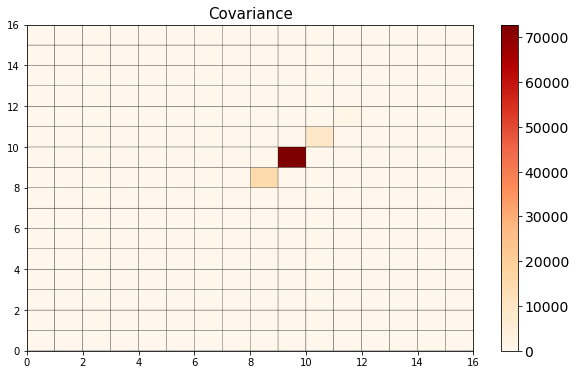

In [95]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, nue_numu_cov_detsys, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Covariance', fontsize=15)

plt.show()


In [96]:
#combined only

addNuWro = True

if addNuWro == True:
    ending = "Jan19"
    
    cov_nuwro = pd.read_csv("nuWro_extra_unisim_uncertainties_lepton_comb_"+ending+".csv", header=None)
    cov_nuwro = cov_nuwro.values
    
    ending = "Jan19_AddnuWro"

In [97]:
if addNuWro == False:
    total_cov = sys_total_cov + nue_numu_cov_stats + nue_numu_cov_detsys
elif addNuWro == True:
    total_cov = sys_total_cov + nue_numu_cov_stats + nue_numu_cov_detsys + cov_nuwro


print(total_cov)

[[ 1.20874348e+02  1.18213372e+02  4.87414182e+01  3.87279776e+01
   1.21927412e+01  8.28304180e+00  6.07402410e+00  1.57407649e+00
   1.03558647e+03  1.59242094e+03  5.80966176e+02  3.30168961e+02
   8.15429483e+01  3.27660627e+01  1.50528557e+01  7.79367210e-01]
 [ 1.18213372e+02  2.82347408e+02  1.56318865e+02  9.32065391e+01
   3.94552460e+01  1.75941950e+01  1.12278019e+01  1.88720790e+01
   1.34491775e+03  2.93247435e+03  1.39248386e+03  5.38200720e+02
   1.52412579e+02  8.28573682e+01  5.48028711e+01  7.11375789e+00]
 [ 4.87414182e+01  1.56318865e+02  2.03374732e+02  8.55022895e+01
   4.60675910e+01  1.53228425e+01  7.52291052e+00  3.19522757e+01
   3.41391433e+02  2.14599429e+03  1.25762892e+03  2.66903950e+02
   1.09539609e+02  7.68195267e+01  5.91088772e+01  1.29047930e+01]
 [ 3.87279776e+01  9.32065391e+01  8.55022895e+01  5.69103993e+01
   2.19457624e+01  8.20575858e+00  4.95344396e+00  1.32469845e+01
   4.03286200e+02  1.27062945e+03  7.02519876e+02  2.08560500e+02
   6.78

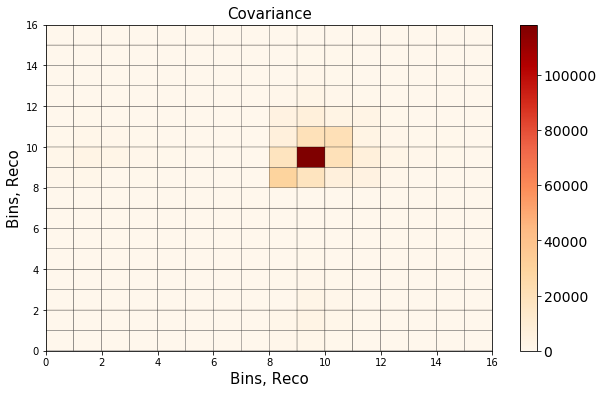

In [98]:
fig = plt.figure(figsize=(10, 6))

bins = np.arange(0, 17, 1)
        
plt.pcolor(bins, bins, total_cov, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




plt.xlabel('Bins, Reco', fontsize=15)
plt.ylabel('Bins, Reco', fontsize=15)

plt.title('Covariance', fontsize=15)

plt.show()

fig.savefig("cov_input_leptonMom_comb_"+ending+".svg", bbox_inches='tight')


In [99]:
if isRun3 == False and isCombined == False:
    np.savetxt("full_500_catsel_nopions_leptonMom_usingSelection_data_covmat_blockwise_recoCut_"+ending+".csv", 
               total_cov,
               delimiter =", ", 
               fmt ='% s')
elif isRun3 == True and isCombined == False:
    np.savetxt("full_500_catsel_nopions_leptonMom_usingSelection_data_covmat_blockwise_recoCut_run3_"+ending+".csv", 
               total_cov,
               delimiter =", ", 
               fmt ='% s') 
elif isCombined == True:
    print("Combined")
    np.savetxt("full_500_catsel_nopions_leptonMom_usingSelection_data_covmat_blockwise_recoCut_comb_"+ending+".csv", 
               total_cov,
               delimiter =", ", 
               fmt ='% s') 

Combined


In [100]:
# compute the corr matrix 

bins = np.arange(0, 17, 1)

total_cor = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]

for i in range(len(total_cov)): 
    for j in range(len(total_cov[i])): 
        
        if np.sqrt(total_cov[i][i])*np.sqrt(total_cov[j][j]) != 0: 
            total_cor[i][j] = total_cov[i][j] / (np.sqrt(total_cov[i][i])*np.sqrt(total_cov[j][j]))

16


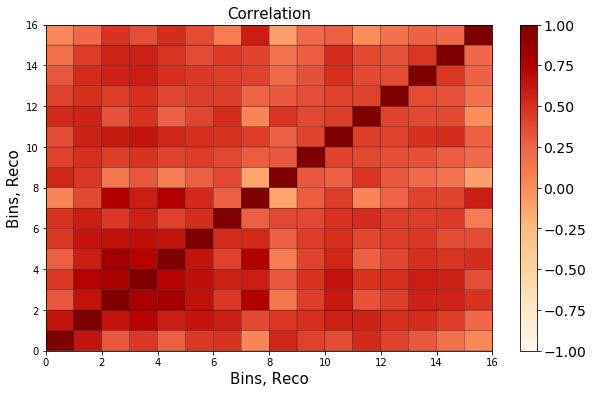

In [101]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, total_cor, cmap='OrRd', edgecolors='k', vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)


print(len(total_cor))

plt.xlabel('Bins, Reco', fontsize=15)
plt.ylabel('Bins, Reco', fontsize=15)

plt.title('Correlation', fontsize=15)

plt.show()
fig.savefig("cor_input_leptonMom_comb_"+ending+".svg", bbox_inches='tight')


In [102]:
#Get the fractional covariance

#print(total_cov)
top_left_dummy = [ [0]*(8) for x in range(8) ]
top_right_dummy = [ [0]*(8) for x in range(8) ]
bot_left_dummy = [ [0]*(8) for x in range(8) ]
bot_right_dummy = [ [0]*(8) for x in range(8) ]
bot_dummy = np.zeros([8, 16])
top_dummy = np.zeros([8, 16])


#NUE ONLY
bot_left = total_cov[:8]
for i in range(len(bot_left)):
    bot_left_dummy[i] = bot_left[i][:8]
    
nue_errs_bot = np.array(bot_left_dummy)/((n_nue_tot_allsel*n_nue_tot_allsel))
    
#MIX   
bot_right = total_cov[:8]
for i in range(len(bot_right)):
    bot_right_dummy[i] = bot_right[i][8:]
    
mix_errs_bot = np.array(bot_right_dummy)/((n_nue_tot_allsel*n_numu_tot_allsel))

    
#MIX
top_left = total_cov[8:]
for i in range(len(top_left)):
    top_left_dummy[i] = top_left[i][:8]
    
mix_errs_top = np.array(top_left_dummy)/((n_nue_tot_allsel*n_numu_tot_allsel))

#NUMU ONLY
top_right = total_cov[8:]
for i in range(len(top_right)):
    top_right_dummy[i] = top_right[i][8:]
    
numu_errs_top = np.array(top_right_dummy)/((n_numu_tot_allsel*n_numu_tot_allsel))

print((n_nue_tot_allsel*n_numu_tot_allsel))
print(bot_right_dummy[1])
print(mix_errs_bot[1])
print(mix_errs_top[1])

##########################################

for a in range(len(nue_errs_bot)):
    bot_dummy[a] = list(np.concatenate(((nue_errs_bot[a]), mix_errs_bot[a]), axis=0))

    
for a in range(len(numu_errs_top)):
    top_dummy[a] = list(np.concatenate((mix_errs_top[a], ((numu_errs_top[a]))), axis=0))  
    

total_frac_cov = list(bot_dummy) + list(top_dummy)

[2.57941063e+04 8.31431047e+04 2.00249068e+04 4.16200858e+03
 8.18281109e+02 1.81087370e+02 3.81003531e+01 2.20373443e+01]
[1344.91774996 2932.4743468  1392.48386028  538.20071962  152.41257862
   82.85736821   54.80287115    7.11375789]
[0.05214051 0.03527021 0.0695376  0.12931274 0.18625944 0.45755465
 1.43838224 0.32280468]
[ 0.06173584  0.03527021  0.10716626  0.30529237  0.68715764  1.38370332
  3.92761524 13.65396784]


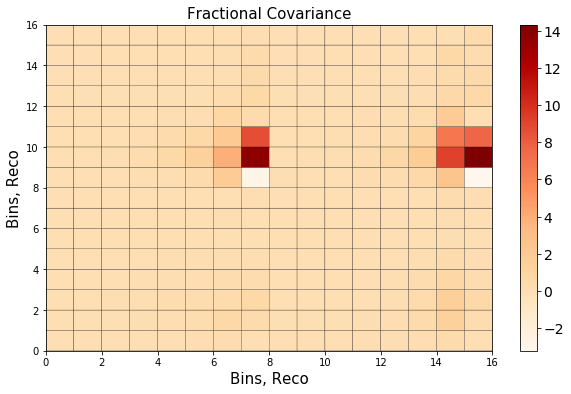

In [103]:
fig = plt.figure(figsize=(10, 6))  
    
plt.pcolor(bins, bins, (total_frac_cov), cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)
#cbar.set_label(r"Log (Power)", size=15)

plt.xlabel('Bins, Reco', fontsize=15)
plt.ylabel('Bins, Reco', fontsize=15)

plt.title('Fractional Covariance', fontsize=15)

plt.show()

fig.savefig("fraccov_input_leptonMom_comb_"+ending+".svg", bbox_inches='tight')


## Smearing

In [3]:
import csv

ending = "Jan19"

if isRun3 == False and isCombined == False:
    with open('nue_full_500_catsel_nopions_leptonMom_usingSelection_smearcept_weighted_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_smearing = list(csv_reader)
elif isCombined == True:
    with open('nue_full_500_catsel_nopions_leptonMom_usingSelection_smearcept_weighted_recoCut_comb_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_smearing = list(csv_reader)

for a in range(len(nue_smearing)):
    nue_smearing[a] = list(nue_smearing[a])
    for b in range(len(nue_smearing[a])):
        nue_smearing[a][b] = float(nue_smearing[a][b])
    
print("nue_smearing = ", nue_smearing)

nue_smearing =  [[0.04351414938972591, 0.037417433704936054, 0.00969972353858275, 0.004419245190137429, 0.0020920362200988383, 0.0012084127771143092, 0.0032731545824856412, 0.00015993362399083216], [0.000660848018535135, 0.07668773620803979, 0.07740481227159052, 0.023909938448913804, 0.011143321493993419, 0.009049688187581966, 0.004210804871969357, 0.003691203255380042], [0.0, 0.0005382862034295796, 0.055865519928352994, 0.08504949499864616, 0.02728129823530162, 0.01161680665471325, 0.012230704246873976, 0.0052284327640897904], [0.0, 0.0, 0.0002391755781618703, 0.04483723602026386, 0.0674933004651241, 0.032634498769847135, 0.01734685218951309, 0.007332452099307958], [0.0, 0.0, 0.0, 0.0, 0.017520339451989626, 0.055066856309302824, 0.03536211666708657, 0.012142469533416944], [0.0, 0.0, 0.0, 0.0, 0.0, 0.00848680681931439, 0.03719848148918894, 0.016222863018569882], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00882717714626923, 0.0191683190139025], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03236485685234

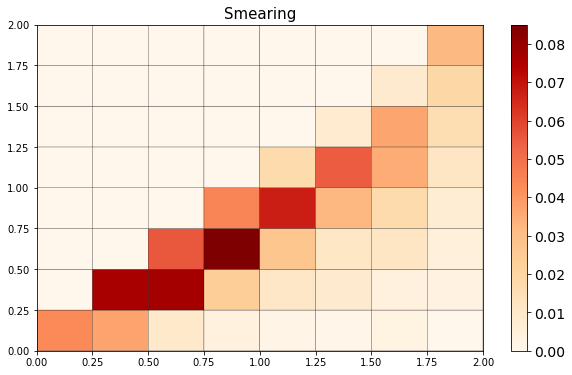

In [4]:
fig = plt.figure(figsize=(10, 6))

bins = np.arange(0.0, 2.25, 0.25)
        
plt.pcolor(bins, bins, nue_smearing, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Smearing', fontsize=15)

plt.show()

In [5]:
if isRun3 == False and isCombined == False:
    with open('numu_full_500_catsel_nopions_leptonMom_usingSelection_smearcept_weighted_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_smearing = list(csv_reader)
elif isCombined == True:
    with open('numu_full_500_catsel_nopions_leptonMom_usingSelection_smearcept_weighted_recoCut_comb_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_smearing = list(csv_reader)

for a in range(len(numu_smearing)):
    numu_smearing[a] = list(numu_smearing[a])
    for b in range(len(numu_smearing[a])):
        numu_smearing[a][b] = float(numu_smearing[a][b])
    
print("numu_smearing = ", numu_smearing)

numu_smearing =  [[0.06310183440992263, 0.003132603820222105, 0.0007250437540377998, 0.00013449388302431113, 0.0002496484700890278, 0.00018176142147128762, 0.00045027359084342047, 0.0], [0.00502911583819117, 0.09984123580125209, 0.0069063208192854456, 0.001846312618365724, 0.0014567856031726923, 0.00025594962339779237, 0.00029461683476762925, 0.00021234932031503483], [0.0001748746245710209, 0.0008059003142386496, 0.05500387861931512, 0.005226953644105842, 0.0008804933306750824, 0.00030429040758384626, 0.0003026492110089677, 4.3094620571009935e-05], [3.8649554338246816e-05, 1.7544962302377994e-05, 0.0008935639358718245, 0.02866888914482578, 0.0025234596449555217, 0.0006140790560636042, 0.0008721175458298856, 7.131099275426006e-05], [7.898321813366879e-05, 0.0, 0.0, 0.0010188106450301933, 0.015286633593670466, 0.0020087105132576433, 0.0001479803355077609, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0011529803564634818, 0.009621099241349148, 0.00020052075718076919, 2.8608297164131506e-05], [0.0, 0.0, 0.

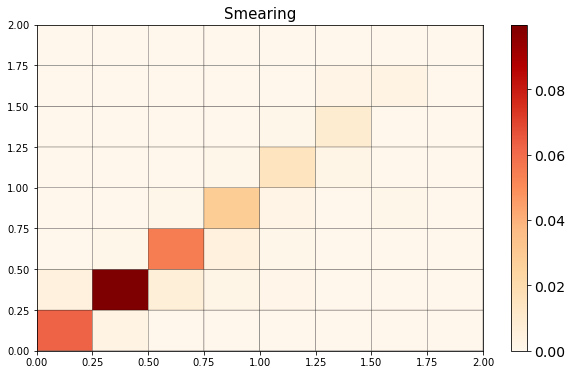

In [6]:
fig = plt.figure(figsize=(10, 6))

bins = np.arange(0.0, 2.25, 0.25)
        
plt.pcolor(bins, bins, numu_smearing, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Smearing', fontsize=15)

plt.show()

In [7]:
#nue_smearing#

zeros = [0]*8

for a in range(len(nue_smearing)):
    nue_smearing[a] = list(np.concatenate(((nue_smearing[a]), zeros), axis=0))

    
for a in range(len(numu_smearing)):
    numu_smearing[a] = list(np.concatenate((zeros, ((numu_smearing[a]))), axis=0))

In [8]:
full_smear = nue_smearing + numu_smearing
print(nue_smearing)

[[0.04351414938972591, 0.037417433704936054, 0.00969972353858275, 0.004419245190137429, 0.0020920362200988383, 0.0012084127771143092, 0.0032731545824856412, 0.00015993362399083216, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.000660848018535135, 0.07668773620803979, 0.07740481227159052, 0.023909938448913804, 0.011143321493993419, 0.009049688187581966, 0.004210804871969357, 0.003691203255380042, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0005382862034295796, 0.055865519928352994, 0.08504949499864616, 0.02728129823530162, 0.01161680665471325, 0.012230704246873976, 0.0052284327640897904, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0002391755781618703, 0.04483723602026386, 0.0674933004651241, 0.032634498769847135, 0.01734685218951309, 0.007332452099307958, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.017520339451989626, 0.055066856309302824, 0.03536211666708657, 0.012142469533416944, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0084

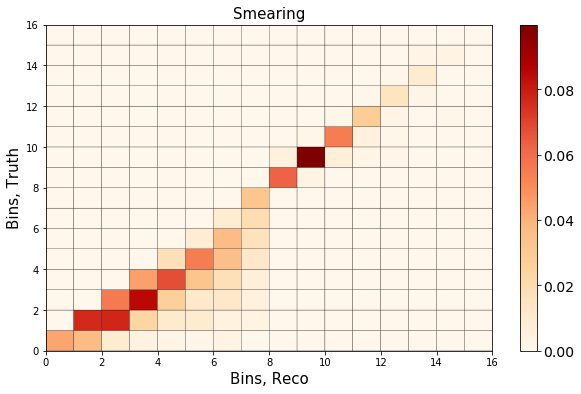

In [9]:
fig = plt.figure(figsize=(10, 6))

bins_full = np.arange(0, 17, 1)
bin_centers_full = np.arange(0.25, 16.25, 1)
        
plt.pcolor(bins_full, bins_full, full_smear, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




plt.xlabel('Bins, Reco', fontsize=15)
plt.ylabel('Bins, Truth', fontsize=15)

plt.title('Smearing', fontsize=15)

fig.savefig("full_blockwise_smearing_input_leptonMom_"+ending+".svg",bbox_inches='tight' )

plt.show()

/tmp/ipykernel_8656/1748254363.py:6: RuntimeWarning: divide by zero encountered in log
  plt.pcolor(bins_full, bins_full, np.log(full_smear), cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)


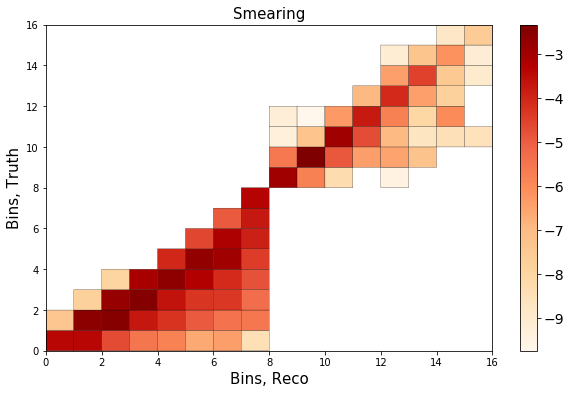

In [10]:
fig = plt.figure(figsize=(10, 6))

bins_full = np.arange(0, 17, 1)
bin_centers_full = np.arange(0.25, 16.25, 1)
        
plt.pcolor(bins_full, bins_full, np.log(full_smear), cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




plt.xlabel('Bins, Reco', fontsize=15)
plt.ylabel('Bins, Truth', fontsize=15)

plt.title('Smearing', fontsize=15)

#fig.savefig("full_blockwise_smearing_input_leptonMom_"+ending+".svg",bbox_inches='tight' )

plt.show()

In [55]:
if isRun3 == False and isCombined == False:
    print("Run1")
    np.savetxt("full_500_catsel_nopions_leptonMom_usingSelection_smearcept_weighted_blockwise_recoCut_run1_"+ending+".csv", 
               full_smear,
               delimiter =", ", 
               fmt ='% s')
elif isCombined == True:
    print("Combined")
    np.savetxt("full_500_catsel_nopions_leptonMom_usingSelection_smearcept_weighted_blockwise_recoCut_"+ending+".csv", 
               full_smear,
               delimiter =", ", 
               fmt ='% s')

Run1


In [228]:
with open("nue_full_500_catsel_nopions_leptonMom_usingSelection_data_signal_MCONLY_blockwise_recoCut_comb_"+ending+".csv") as file:
            content = file.readlines()
            mcsig = content[0:]

            for i in range(16):
                mcsig[i]=mcsig[i].rstrip().rstrip(',')
                mcsig[i] = float(mcsig[i])
                
            print("MC Signal: ")
            print(mcsig)
                
with open('nue_full_500_catsel_nopions_leptonMom_usingSelection_prior_true_signal_blockwise_recoCut_comb_'+ending+'.csv') as file:
        content = file.readlines()
        prior_true = content[0:]

        for i in range(16):
            prior_true[i]=prior_true[i].rstrip().rstrip(',')
            prior_true[i] = float(prior_true[i])

        print("Prior Truth: ")
        print(prior_true)
        
print("------------------------------------------")
print("SMEAR x PRIOR_TRUE")
made_data_sig = np.dot(full_smear, prior_true)
print(made_data_sig)
print(sum(made_data_sig))
print("")
print("MC DATA SIGNAL")
print(mcsig)
print(sum(mcsig))
print("")
print("-------------------------------------------")
print("DIFFERENCES")
diffs = made_data_sig - mcsig

for i in range(16):
    print(diffs[i])

MC Signal: 
[22.19439672716188, 53.74003918050166, 36.18860506405631, 20.553508324321967, 9.67411008836907, 4.757230723200746, 3.0415721892334613, 4.363183481821895, 288.93520782756127, 748.267755227596, 288.72548835479665, 106.55908935156233, 43.18713403698661, 18.452645387799784, 7.531844478138993, 1.1134513442794878]
Prior Truth: 
[129.3466034622265, 337.729637175373, 266.63605758392475, 184.8684388288003, 116.20225571858606, 75.70418196950621, 51.82313326490032, 134.8144813984538, 4155.977046343568, 6845.533904004922, 4769.213605845558, 3275.9537876006407, 2364.8551123615457, 1602.5948085619827, 1023.6659798427113, 3566.2310849888077]
------------------------------------------
SMEAR x PRIOR_TRUE
[ 22.19442646  53.74012984  36.18881566  20.55369341   9.67425069
   4.7573055    3.04161896   4.36325139 288.93520746 748.26775511
 288.72548818 106.55908945  43.18713411  18.45264526   7.53184454
   1.11345133]
1657.286107363906

MC DATA SIGNAL
[22.19439672716188, 53.74003918050166, 36.18

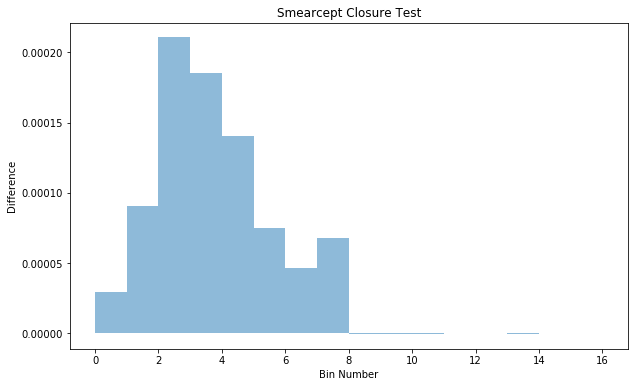

In [229]:
import random
import numpy
from matplotlib import pyplot

fig = plt.figure(figsize=(10, 6))

bins = np.arange(0, 17, 1)
count = [0.1, 1.1, 2.1, 3.1, 4.1, 5.1, 6.1, 7.1, 8.1, 9.1, 10.1, 11.1, 12.1, 13.1, \
        14.1, 15.1]

pyplot.hist(count, bins, weights=diffs, alpha=0.5)
#pyplot.legend(loc='upper right')
pyplot.xlabel("Bin Number")
pyplot.ylabel("Difference")
pyplot.title("Smearcept Closure Test")
pyplot.show()

fig.savefig("smearcept_closure_test_leptonMom_"+ending+".svg",bbox_inches='tight' )